In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

pi = m.pi
sin = m.sin
cos = m.cos
atan2 = m.atan2
acos = m.acos

In [ ]:
# ÇOK NOKTALI ROTA İNVERSE KİNEMATİK

def inv_kin(S):
    results = []

    for i in range(len(S)):
        xi = S[i][0]
        yi = S[i][1]

        for beta in range(0, 721):
            beta_rad = beta * 0.5 * pi / 180  # Dereceyi radyana çevirme

            delta_y = 5.7 * sin(beta_rad)
            delta_x = 5.7 * cos(beta_rad)

            yw = yi + delta_y
            xw = xi + delta_x

            f = (xw**2 + yw**2 - 181) / 180

            if -1 <= f <= 1:
                try:
                    theta21 = acos(f)
                    k2 = 9 * sin(theta21)
                    k1 = 10 + 9 * cos(theta21)

                    if k1 != 0:
                        theta1 = atan2(yw, xw) - atan2(k2, k1)
                        q = (xi - 10 * cos(theta1) - 9 * cos(theta1 + theta21)) / 5.7

                        if -1 <= q <= 1:
                            l11 = acos(q)
                            l12 = -acos(q)

                            theta31 = atan2(sin(l11 - theta21 - theta1), cos(l11 - theta21 - theta1))
                            theta32 = atan2(sin(l12 - theta21 - theta1), cos(l12 - theta21 - theta1))

                            theta1_deg = theta1 * 180 / pi
                            theta21_deg = theta21 * 180 / pi
                            theta31_deg = theta31 * 180 / pi
                            theta32_deg = theta32 * 180 / pi

                            x_test_1 = 10 * cos(theta1) + 9 * cos(theta1 + theta21) + 5.7 * cos(theta1 + theta21 + theta31)
                            y_test_1 = 10 * sin(theta1) + 9 * sin(theta1 + theta21) + 5.7 * sin(theta1 + theta21 + theta31)

                            x_test_2 = 10 * cos(theta1) + 9 * cos(theta1 + theta21) + 5.7 * cos(theta1 + theta21 + theta32)
                            y_test_2 = 10 * sin(theta1) + 9 * sin(theta1 + theta21) + 5.7 * sin(theta1 + theta21 + theta32)

                            if len(results) == 0:
                                c1 = c2 = c3 = c4 = True
                            else:
                                c1 = results[-1][0] - 30 <= theta1_deg <= results[-1][0] + 30
                                c2 = results[-1][1] - 30 <= theta21_deg <= results[-1][1] + 30
                                c3 = results[-1][2] - 30 <= theta31_deg <= results[-1][2] + 30
                                c4 = results[-1][2] - 30 <= theta32_deg <= results[-1][2] + 30

                            if abs(x_test_1 - xi) < 0.1 and abs(y_test_1 - yi) < 0.1 and c1 and c2 and c3:
                                results.append([theta1_deg, theta21_deg, theta31_deg])
                                break

                            if abs(x_test_2 - xi) < 0.1 and abs(y_test_2 - yi) < 0.1 and c1 and c2 and c4:
                                results.append([theta1_deg, theta21_deg, theta32_deg])
                                break

                    theta22 = -acos(f)
                    k2 = 9 * sin(theta22)
                    k1 = 10 + 9 * cos(theta22)

                    if k1 != 0:
                        theta1 = atan2(yw, xw) - atan2(k2, k1)
                        q = (xi - 10 * cos(theta1) - 9 * cos(theta1 + theta22)) / 5.7

                        if -1 <= q <= 1:
                            l13 = acos(q)
                            l14 = -acos(q)

                            theta33 = atan2(sin(-l13 - theta22 - theta1), cos(-l13 - theta22 - theta1))
                            theta34 = atan2(sin(l14 - theta22 - theta1), cos(l14 - theta22 - theta1))

                            theta1_deg = theta1 * 180 / pi
                            theta22_deg = theta22 * 180 / pi
                            theta33_deg = theta33 * 180 / pi
                            theta34_deg = theta34 * 180 / pi

                            x_test_3 = 10 * cos(theta1) + 9 * cos(theta1 + theta22) + 5.7 * cos(theta1 + theta22 + theta33)
                            y_test_3 = 10 * sin(theta1) + 9 * sin(theta1 + theta22) + 5.7 * sin(theta1 + theta22 + theta33)

                            x_test_4 = 10 * cos(theta1) + 9 * cos(theta1 + theta22) + 5.7 * cos(theta1 + theta22 + theta34)
                            y_test_4 = 10 * sin(theta1) + 9 * sin(theta1 + theta22) + 5.7 * sin(theta1 + theta22 + theta34)

                            if len(results) == 0:
                                c5 = c6 = c7 = c8 = True
                            else:
                                c5 = results[-1][0] - 30 <= theta1_deg <= results[-1][0] + 30
                                c6 = results[-1][1] - 30 <= theta22_deg <= results[-1][1] + 30
                                c7 = results[-1][2] - 30 <= theta33_deg <= results[-1][2] + 30
                                c8 = results[-1][2] - 30 <= theta34_deg <= results[-1][2] + 30

                            if abs(x_test_3 - xi) < 0.1 and abs(y_test_3 - yi) < 0.1 and c5 and c6 and c7:
                                results.append([theta1_deg, theta22_deg, theta33_deg])
                                break

                            if abs(x_test_4 - xi) < 0.1 and abs(y_test_4 - yi) < 0.1 and c5 and c6 and c8:
                                results.append([theta1_deg, theta22_deg, theta34_deg])
                                break
                except Exception as e:
                    print(f"Hata: {e}")  # Hata türünü de ekrana yazdır

    return results


In [ ]:
# ROTA PLANLAMASI 1
# BİR BAŞLANGIÇ NOKTASINDAN BİTİŞ NOKTASINA

workspace = []
ws_x = []
ws_y = []
for i in range(0,91):
    theta_1 = i*pi/180
    for j in range(-90,1):
        theta_2 = j*pi/180
        for k in range(-90,1):
            theta_3 = k*pi/180

            x = 5*cos(theta_1) + 4*cos(theta_1+theta_2) + 3*cos(theta_1+theta_2+theta_3)
            y = 5*sin(theta_1) + 4*sin(theta_1+theta_2) + 3*sin(theta_1+theta_2+theta_3)

            ws_x.append(x)
            ws_y.append(y)
            workspace.append([x, y])

In [ ]:
# ROTA PLANLAMASI 2

from scipy.spatial import KDTree
from collections import deque

def find_path(ws_x, ws_y, start, goal):
    """
    Workspace noktaları ve başlangıç/bitiş bilgilerine göre,
    en kısa geçerli yolu bulur ve [ [x1, y1], [x2, y2], ... ] formatında döndürür.
    """
    points = np.array(list(zip(ws_x, ws_y)))

    # KD-Tree ile en yakın workspace noktalarını bul
    tree = KDTree(points)
    _, start_idx = tree.query(start)
    _, goal_idx = tree.query(goal)

    # Komşuluk yapısı oluştur (her nokta için en yakın 10 komşu)
    neighbors = [tree.query(point, k=10)[1] for point in points]

    def bfs(start_idx, goal_idx, neighbors):
        visited = set()
        queue = deque([(start_idx, [start_idx])])

        while queue:
            current, path = queue.popleft()
            if current == goal_idx:
                return path
            for n in neighbors[current]:
                if n not in visited:
                    visited.add(n)
                    queue.append((n, path + [n]))
        return None

    path_idx = bfs(start_idx, goal_idx, neighbors)

    if path_idx is not None:
        path = points[path_idx].tolist()  # [[x1, y1], [x2, y2], ...] formatına çevir
        return path
    else:
        return None


In [ ]:
# Başlangıç ve bitiş konumları
start = [5.5, 20.5]
goal = [20.5, 5.5]

route = []

# Yol bul
path = find_path(ws_x, ws_y, start, goal)

print(path)

[[5.5057772098476905, 20.47526855708437], [5.553909369275842, 20.28222100976003], [5.595274945651686, 20.087611273646306], [5.629823541392287, 19.891676450729317], [5.657513064355537, 19.69465525740934], [5.678309779122951, 19.49678773366165], [5.692188348101072, 19.298314950584782], [5.6991318623914315, 19.099478716692516], [5.856203520326984, 18.899150539715006], [6.010623184331357, 18.795590311967604], [6.163211954287568, 18.689350862206382], [6.313923350178128, 18.5804645519969], [6.462711463851874, 18.46896454916406], [6.60953097300804, 18.354884817688838], [6.754337155001863, 18.238260107362557], [6.897085900467541, 18.11912594320176], [7.0377337267543645, 17.997518614626923], [7.17623779117196, 17.87347516440837], [7.31255590404059, 17.747033377382667], [7.446646541542528, 17.618231768943023], [7.578468858370628, 17.487109573307084], [7.70798270017019, 17.35370673156586], [7.835148615770377, 17.218063879517246], [7.95992786920141, 17.080222335287974], [8.082282451493935, 16.9402

In [ ]:
results = inv_kin(route)

print(results)
print(len(route))
print(len(results))

[[86.09686823812882, 8.157205864668184, -78.75407410279696], [90.0, 0.0, -76.99999999999994], [90.0, 0.0, -78.99999999999997], [86.06790539752984, 8.250846660231995, -84.81875205776205], [90.0, 0.0, -82.99999999999993], [90.0, 0.0, -84.99999999999993], [86.06099365145549, 8.29848574341372, -90.85947939486927], [86.06353477877173, 8.304196360334739, -92.86773113910715], [89.05263291132837, 0.9999999999995356, -91.05263291132817], [88.1052738179107, 2.000000000001041, -92.10527381791114], [87.1579307198557, 3.000000000000774, -93.15793071985652], [86.21061162698012, 4.000000000000132, -94.21061162698011], [85.2633245636826, 4.999999999999335, -95.263324563682], [84.31607757383226, 5.999999999999417, -96.31607757383154], [83.3688787256847, 7.000000000000025, -97.36887872568478], [82.42173611682786, 8.000000000000117, -98.42173611682796], [84.06481788967001, 3.5033748547366748, -97.06819274440682], [82.59879488710017, 5.595960330396731, -98.69475521749678], [81.34721301746325, 7.2360183968

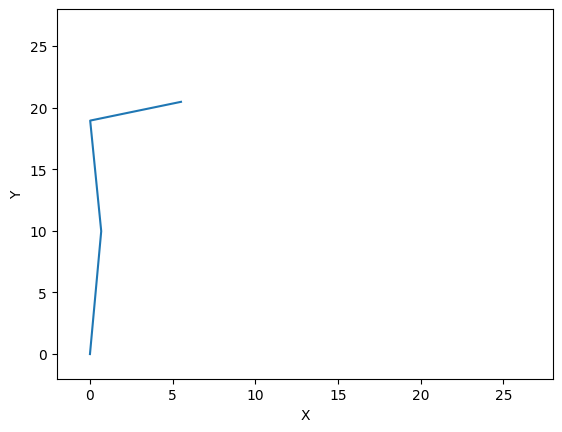

5.5057772098476905
20.475268557084373


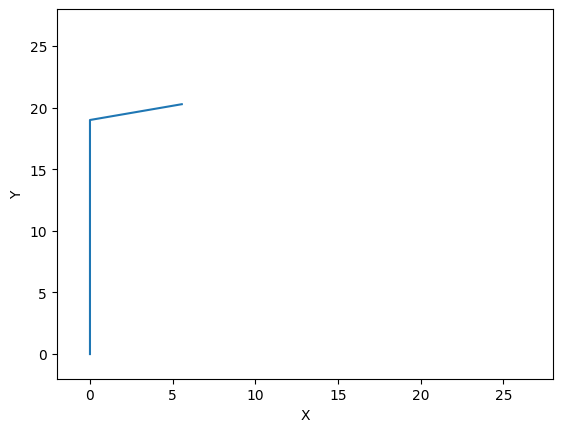

5.553909369275841
20.282221009760036


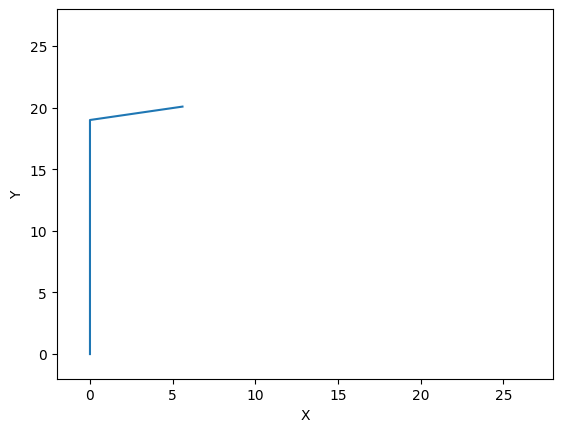

5.595274945651685
20.08761127364631


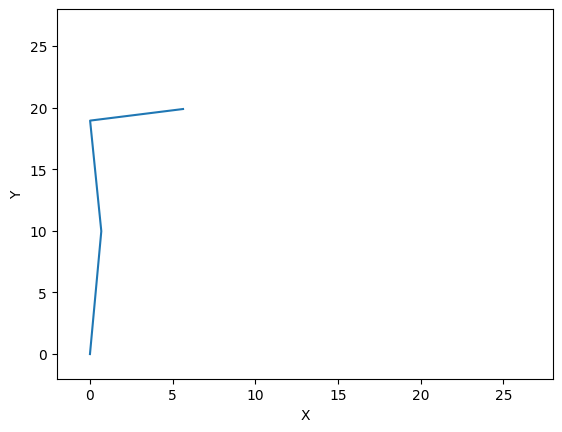

5.629823541392292
19.891676450729296


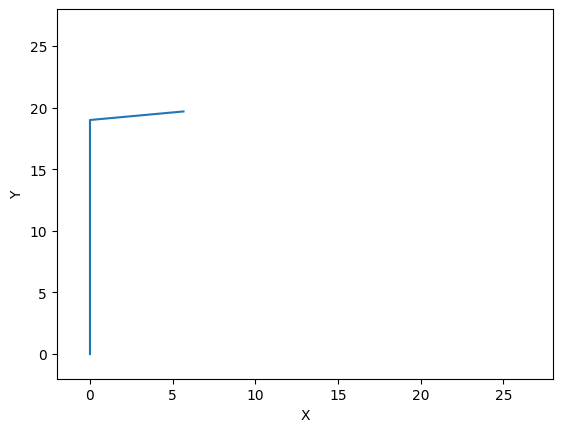

5.657513064355536
19.694655257409348


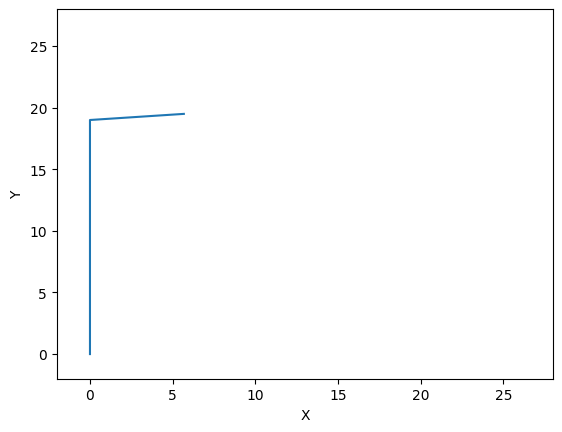

5.67830977912295
19.49678773366166


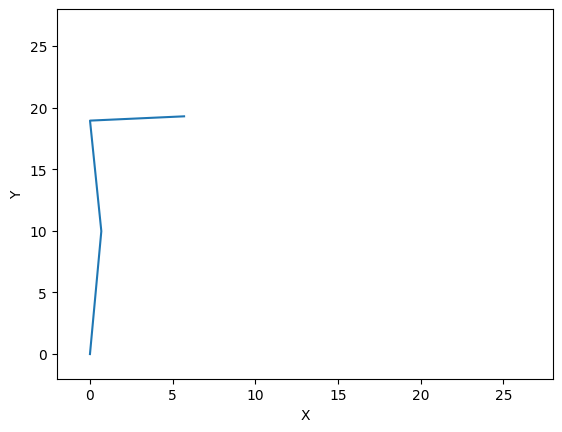

5.692188348101069
19.29831495058478


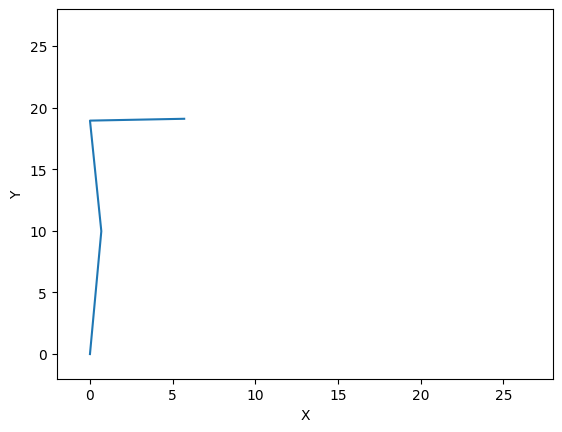

5.6991318623914315
19.099478716692445


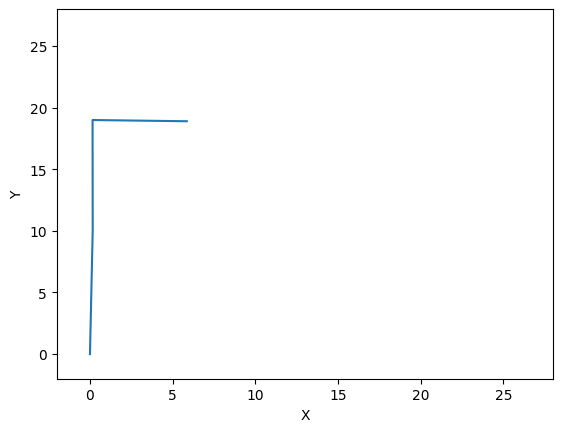

5.856203520326984
18.89915053971498


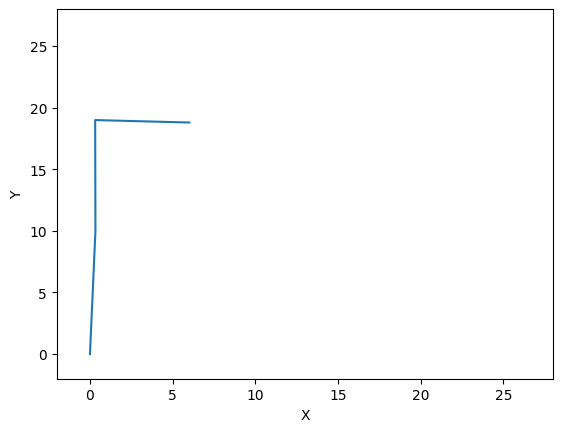

6.010623184331358
18.79559031196766


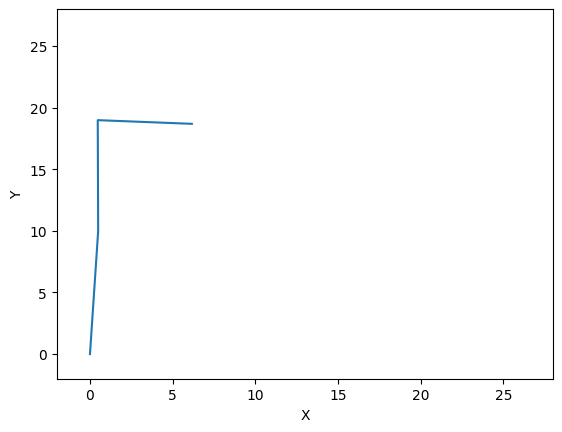

6.163211954287568
18.689350862206375


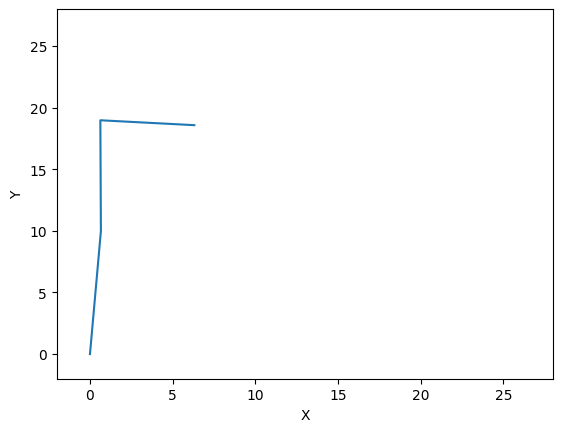

6.313923350178133
18.580464551996915


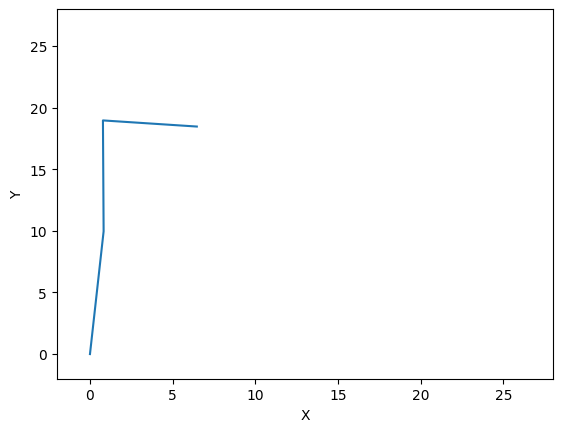

6.462711463851874
18.468964549164056


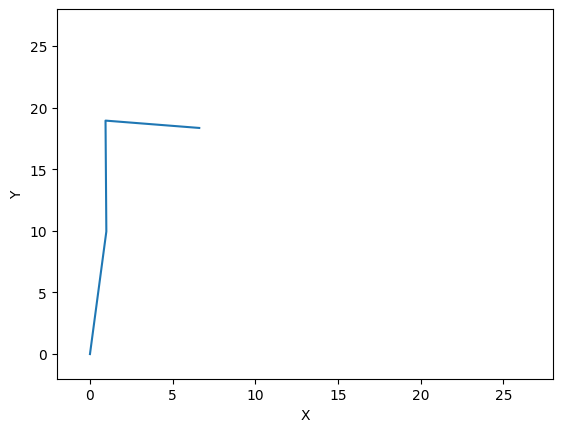

6.609530973008041
18.354884817688855


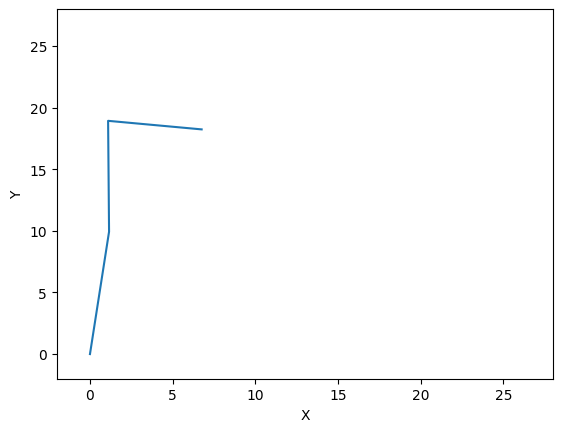

6.75433715500186
18.238260107362553


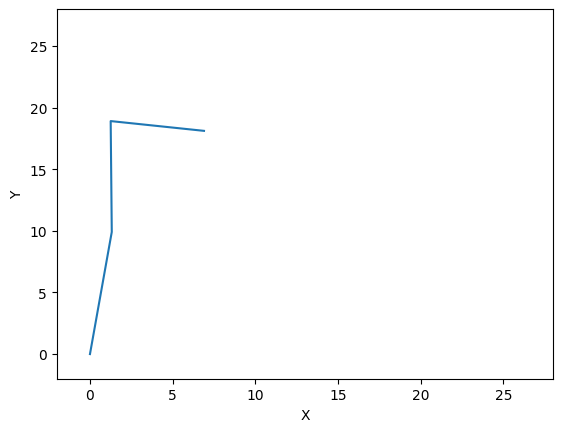

6.8970859004675455
18.11912594320176


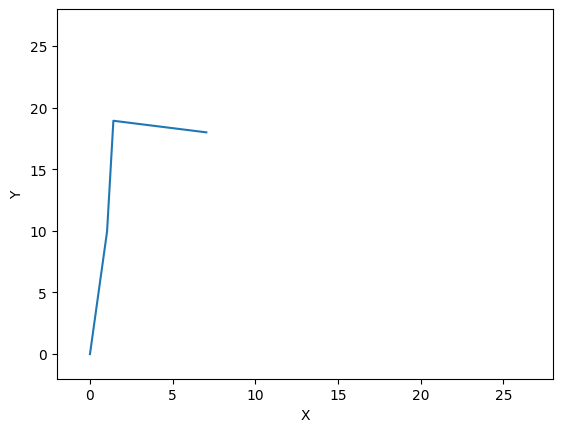

7.037733726754361
17.997518614626912


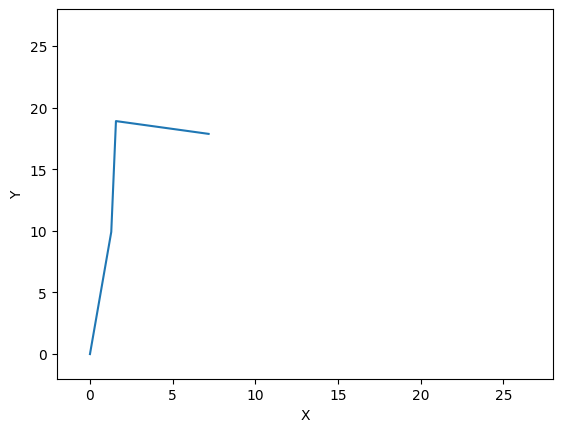

7.176237791171956
17.873475164408386


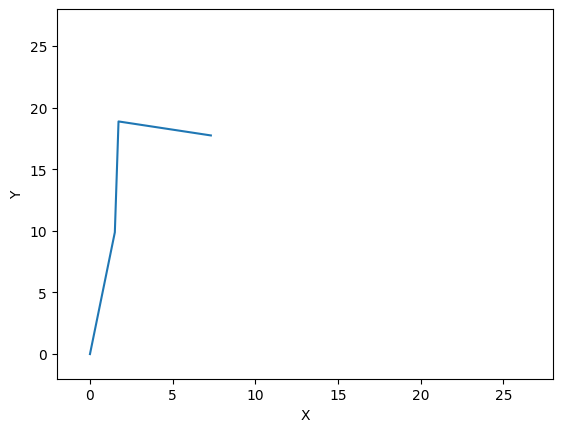

7.312555904040593
17.747033377382646


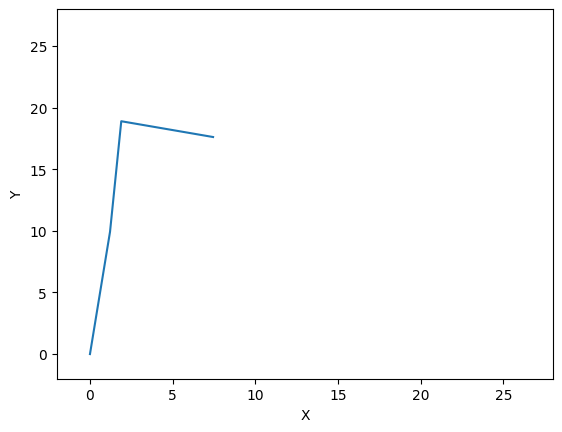

7.446646541542524
17.618231768943023


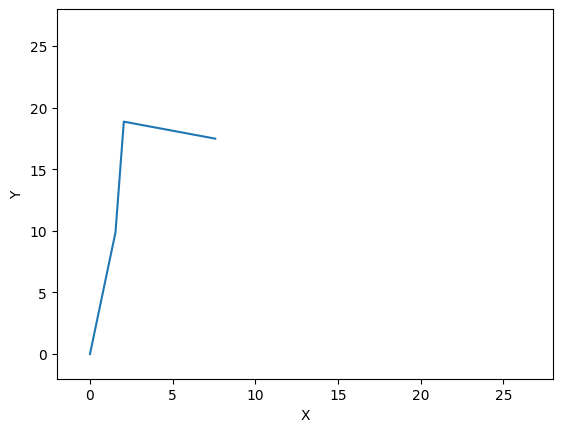

7.578468858370628
17.487109573307084


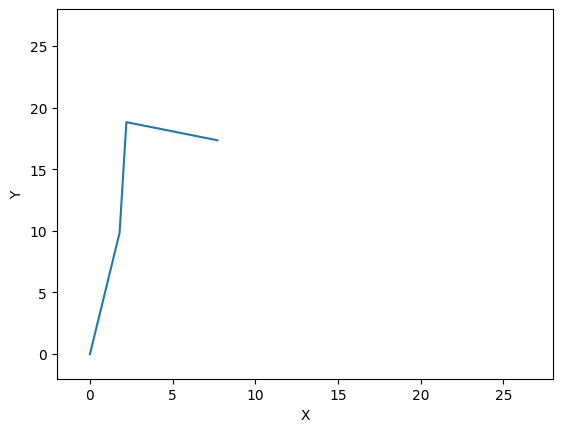

7.70798270017019
17.35370673156587


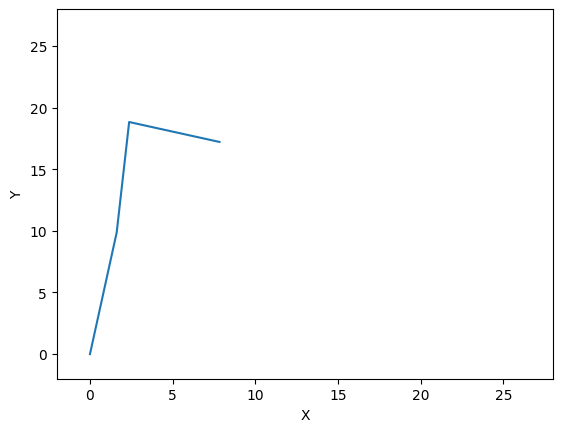

7.835148615770377
17.218063879517246


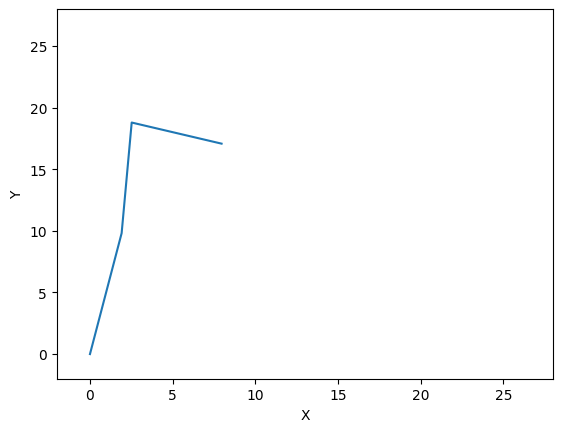

7.95992786920141
17.080222335287985


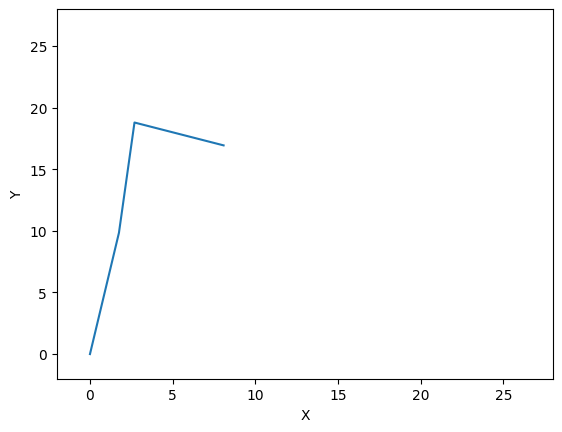

8.082282451493931
16.940224086747712


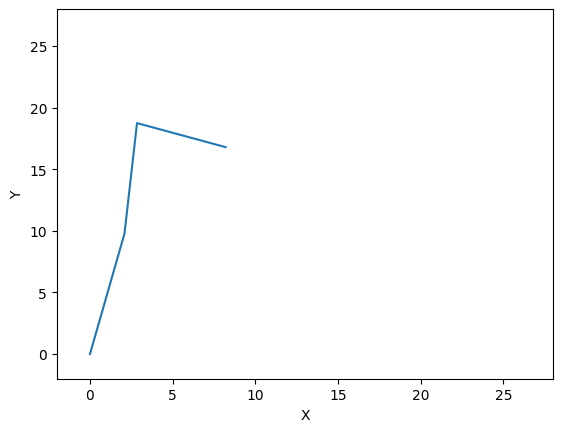

8.202175092256905
16.798111778719193


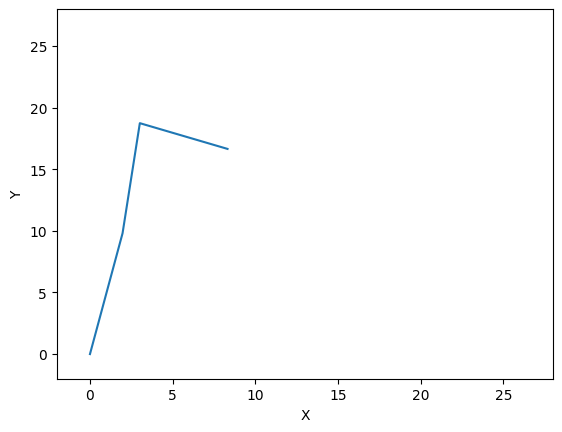

8.31956927103052
16.653928699988054


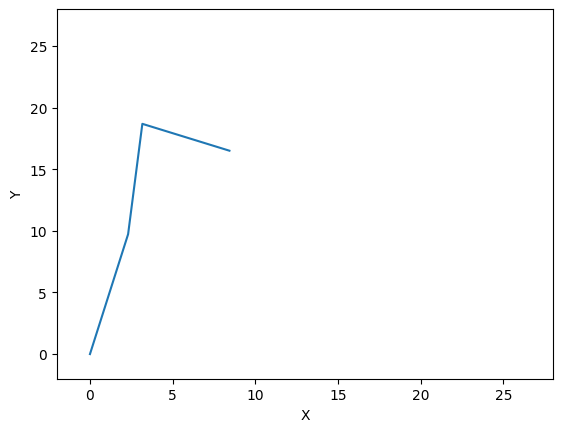

8.434429228410698
16.507718770116867


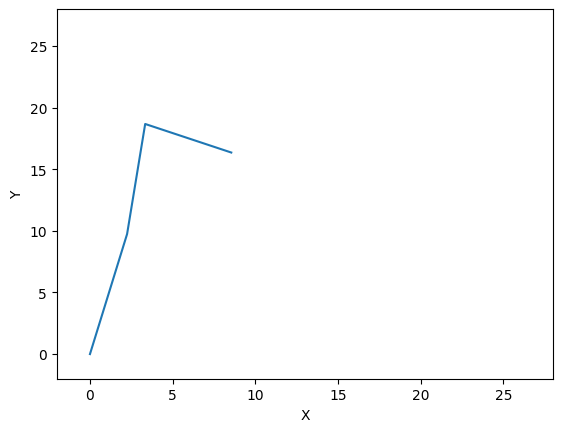

8.54671997694175
16.359526526066606


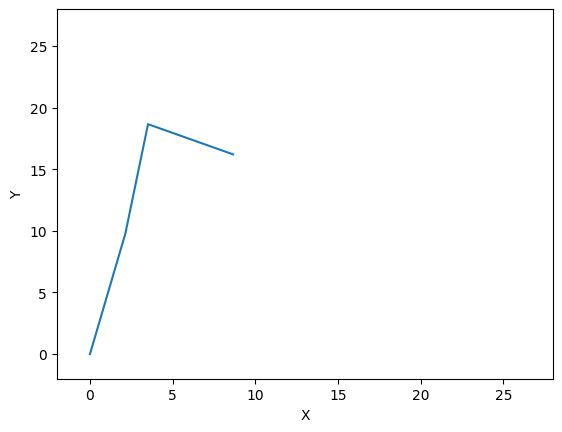

8.656407311773899
16.209397108630387


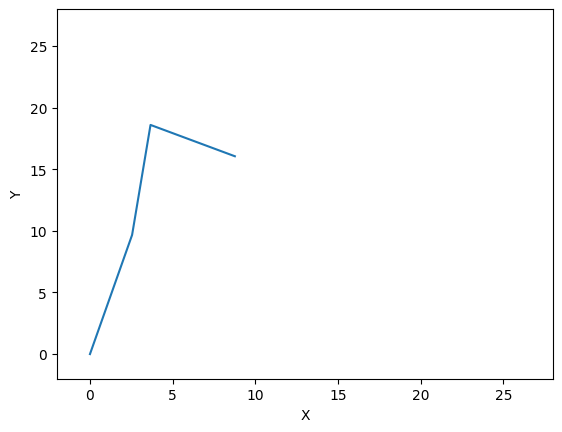

8.763457821082374
16.057376248683106


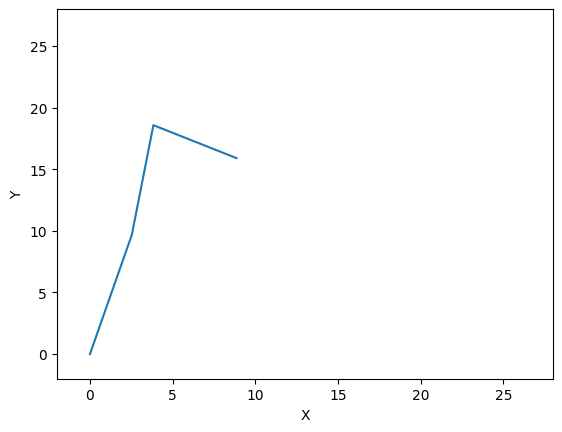

8.867838896245033
15.90351025325134


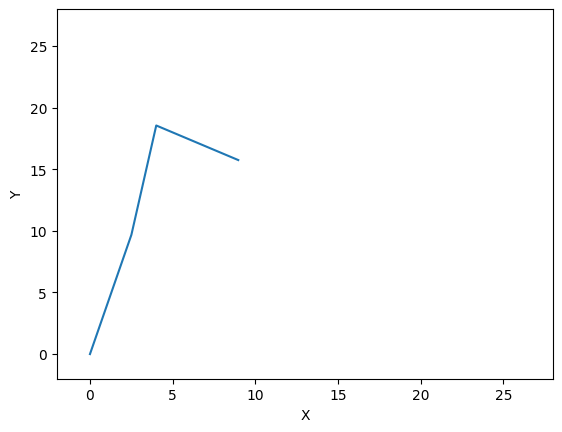

8.9695187417752
15.747845991407853


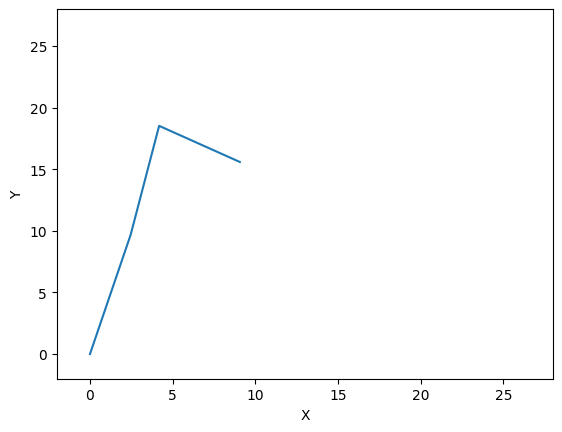

9.06846638500695
15.590430879994765


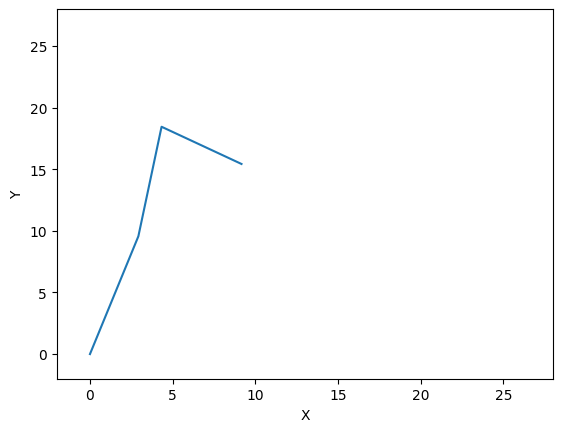

9.164651685529616
15.431312869179894


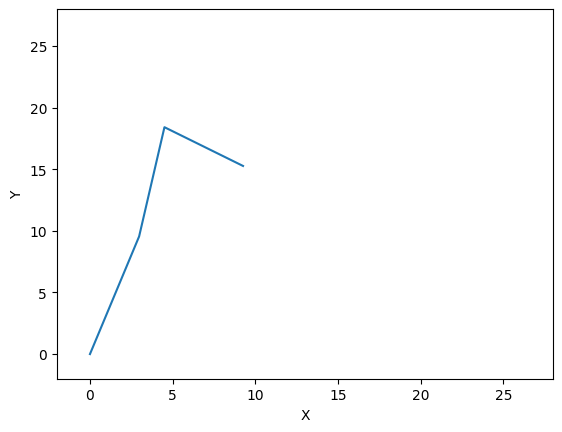

9.258045344368906
15.270540427850763


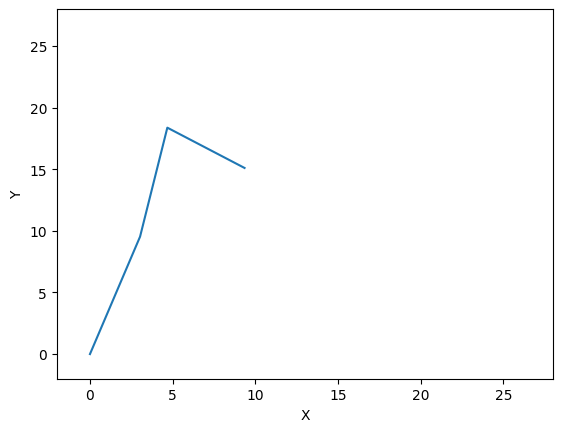

9.34861891291159
15.108162528850439


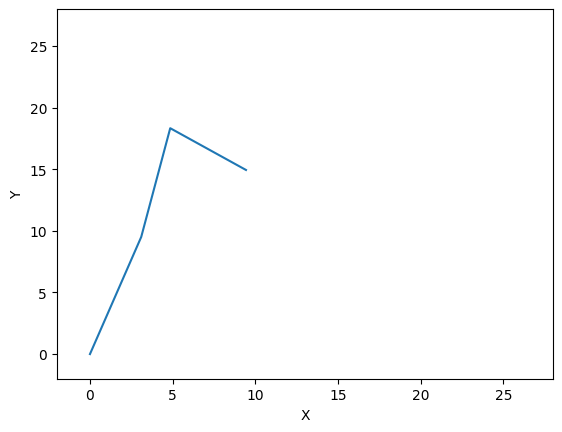

9.436344801571298
14.944228634059952


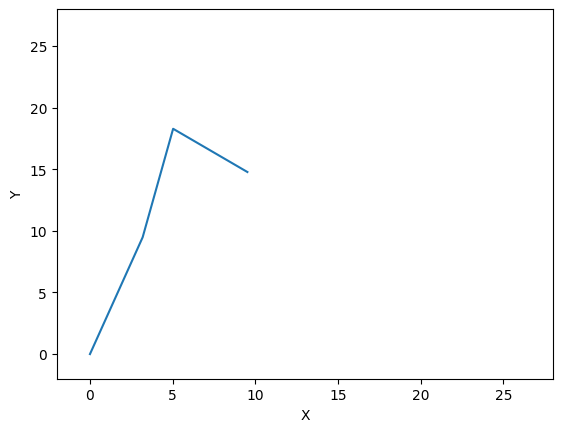

9.521196288192531
14.778788679331697


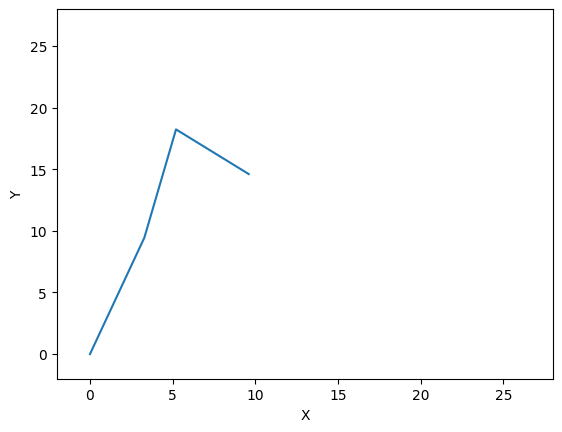

9.603147526190469
14.611893059278565


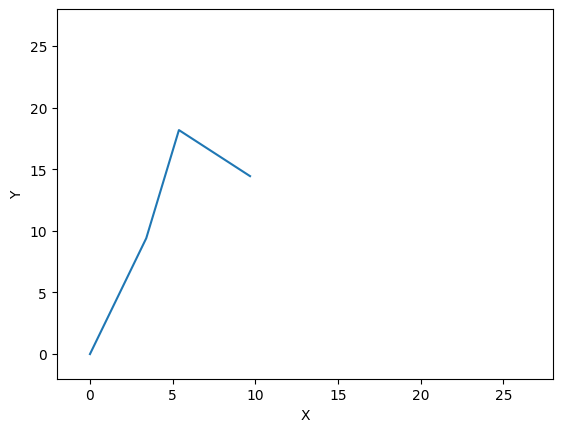

9.682173552424164
14.443592611923156


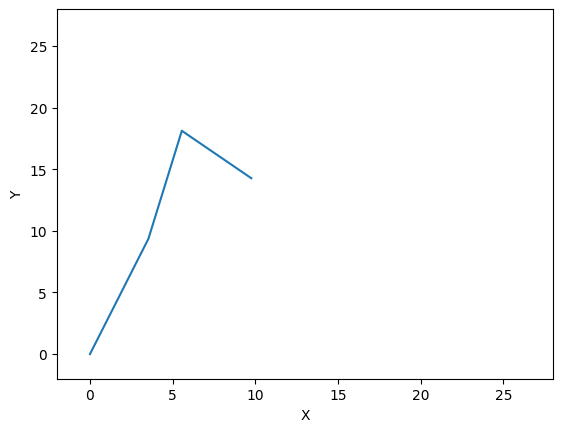

9.75825029480046
14.27393860321212


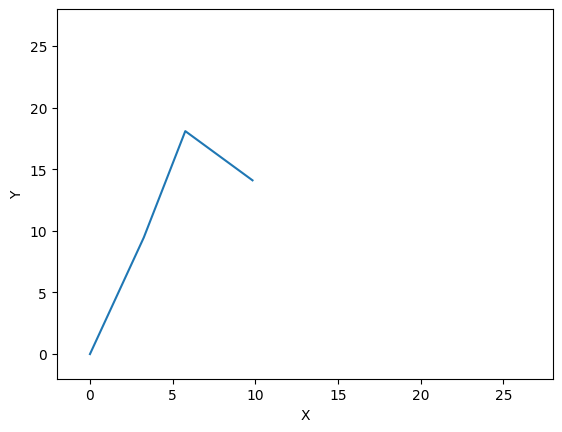

9.831354579606668
14.102982711399964


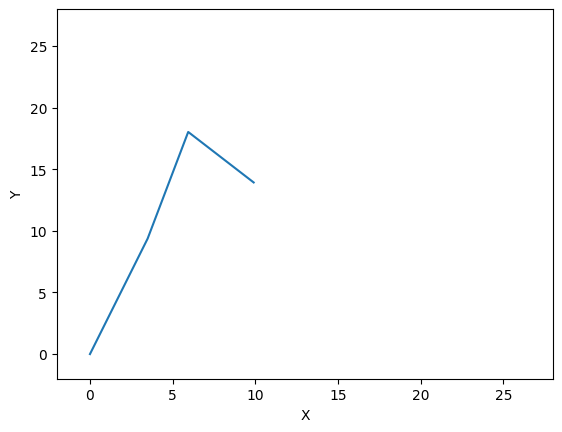

9.901464138569459
13.930777011307436


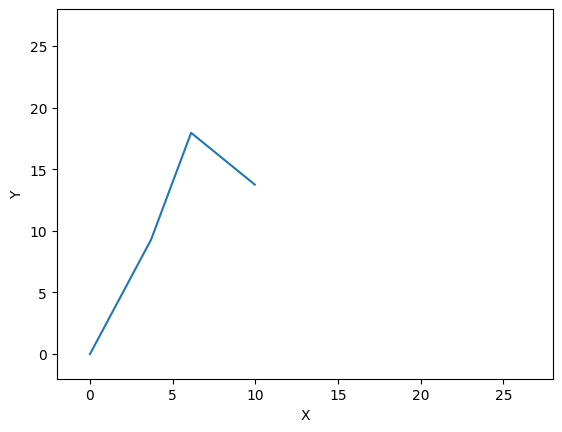

9.968557615638005
13.757373958458956


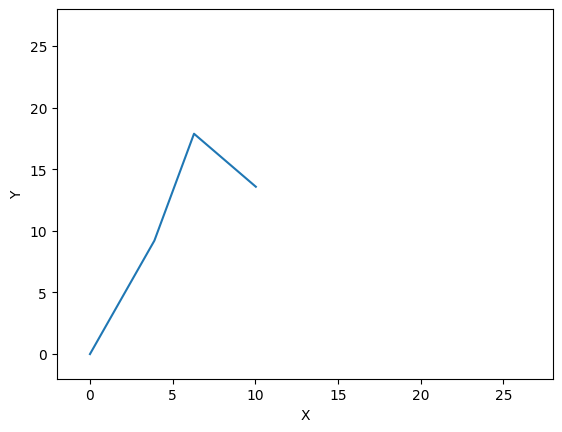

10.032614573489246
13.58282637310424


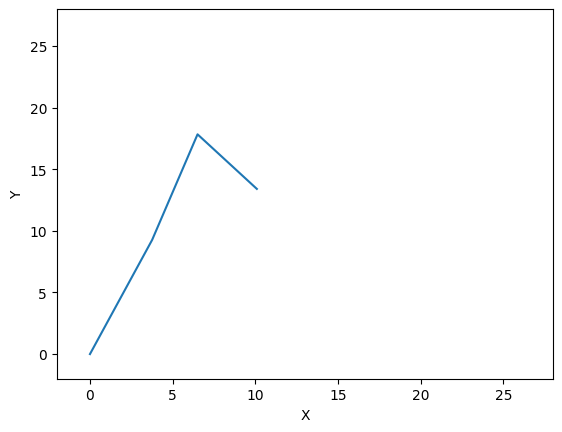

10.093615499753275
13.407187424128658


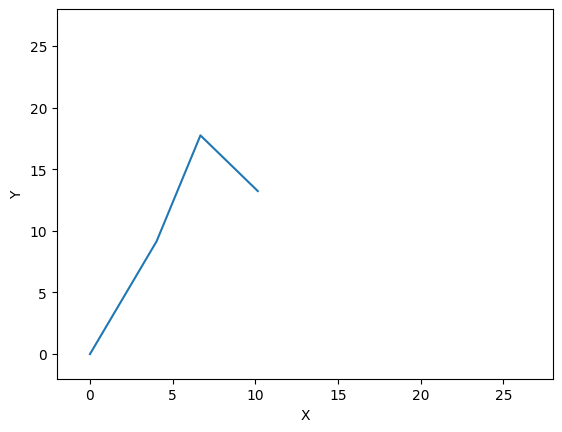

10.151541812957031
13.230510612857527


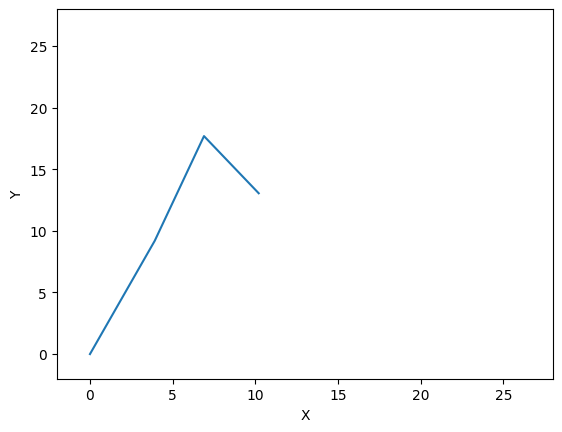

10.206375868184367
13.052849756759057


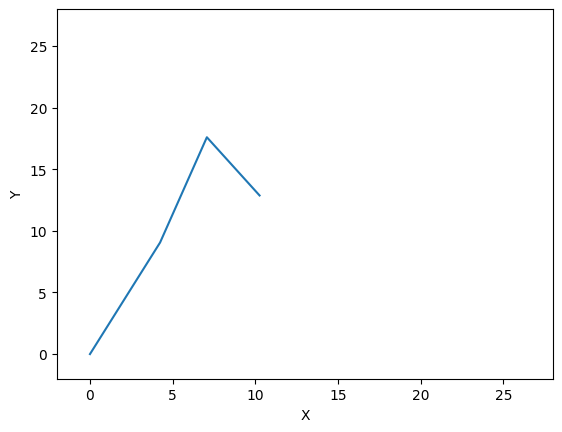

10.258100962450872
12.874258973051054


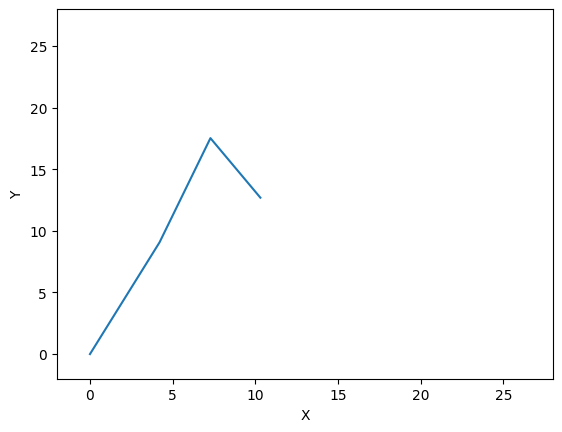

10.306701339791761
12.69479266221629


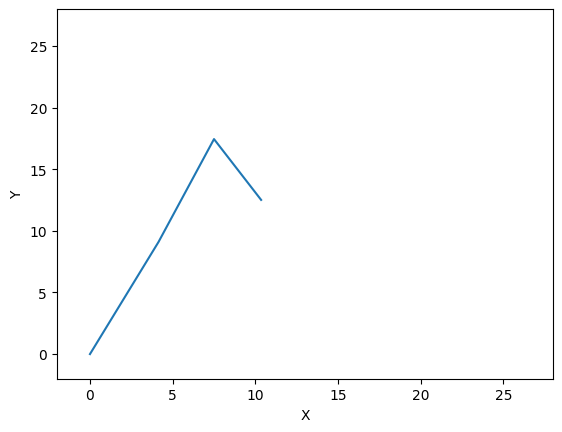

10.35216219606129
12.514505491431581


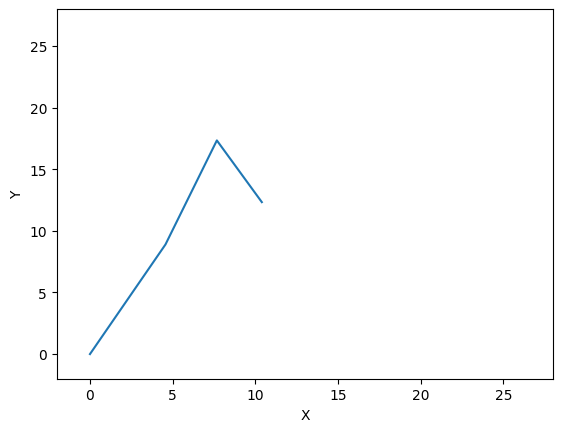

10.394469683442253
12.333452377915606


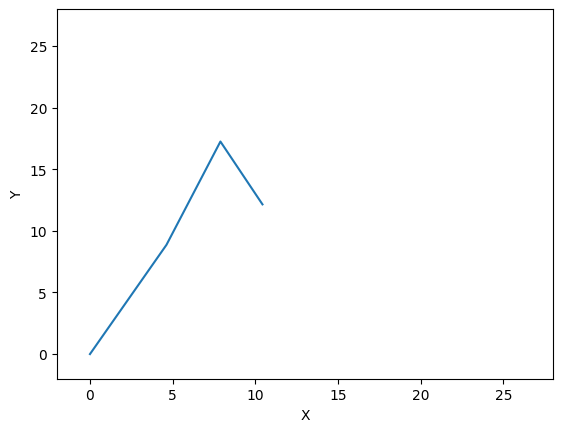

10.433610914664145
12.151688472200666


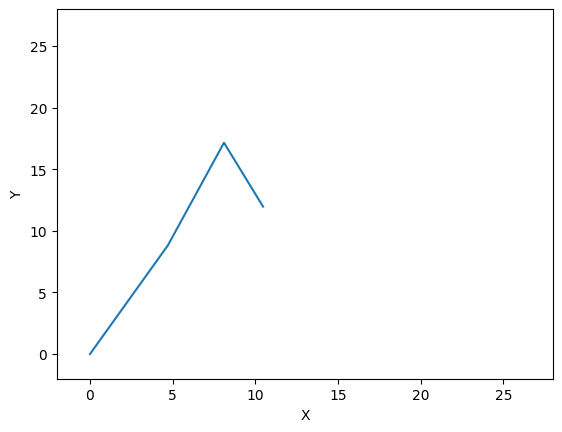

10.46957396692878
11.969269141333214


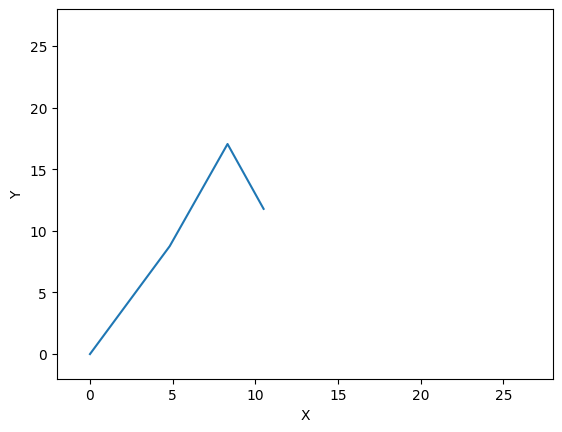

10.502347885542042
11.786249952008578


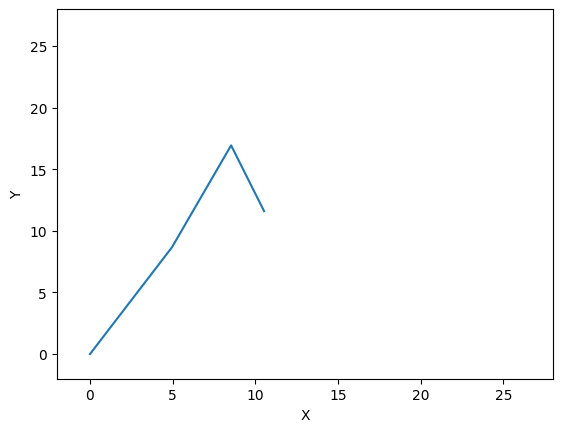

10.531922687250844
11.602686653644762


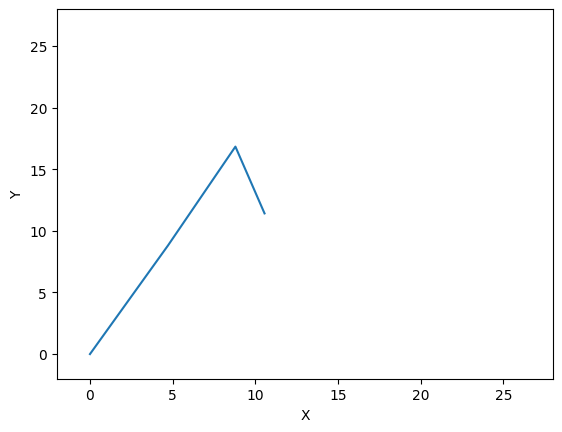

10.558289363284077
11.418635161400676


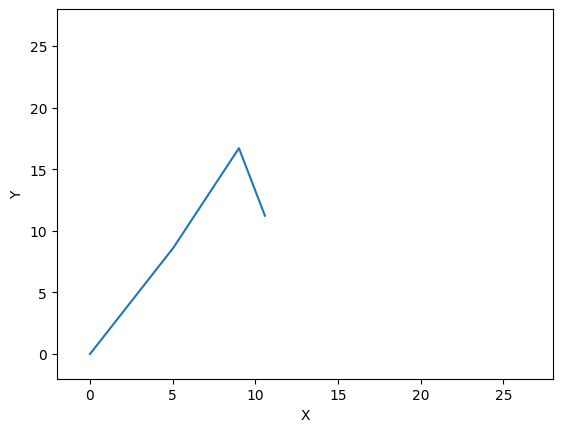

10.581439882096811
11.234151539143802


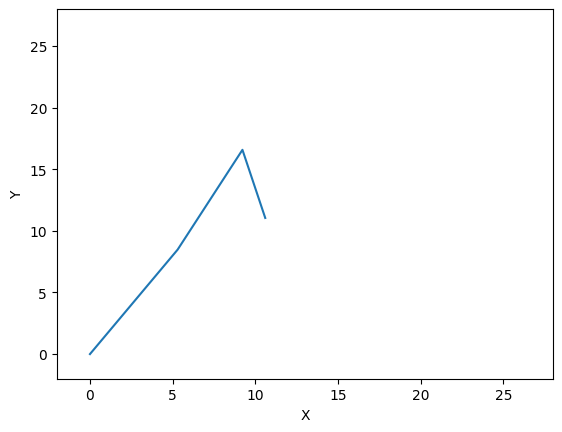

10.601367191816749
11.049291982372614


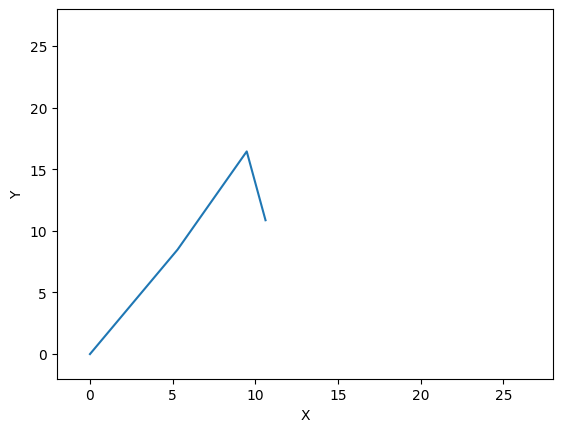

10.618065222392312
10.864112801098862


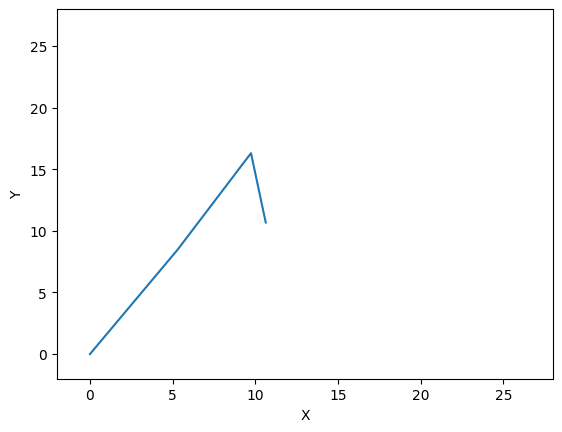

10.631528887441625
10.678670402695053


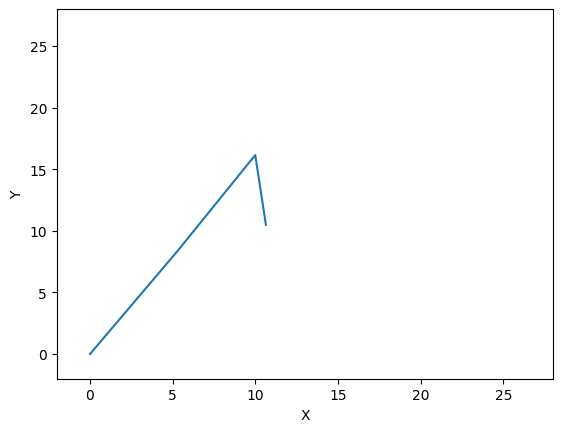

10.641754085801894
10.49302127471216


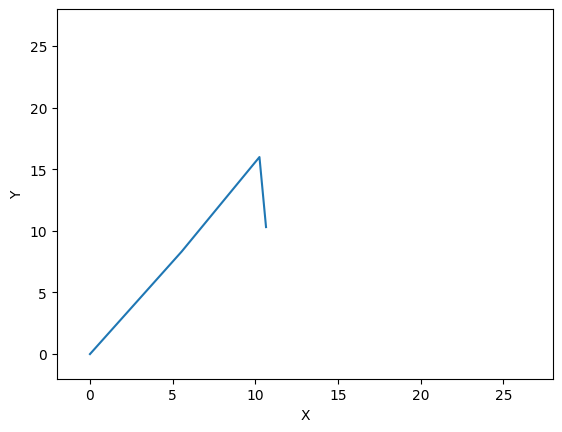

10.648737702778636
10.307221967672984


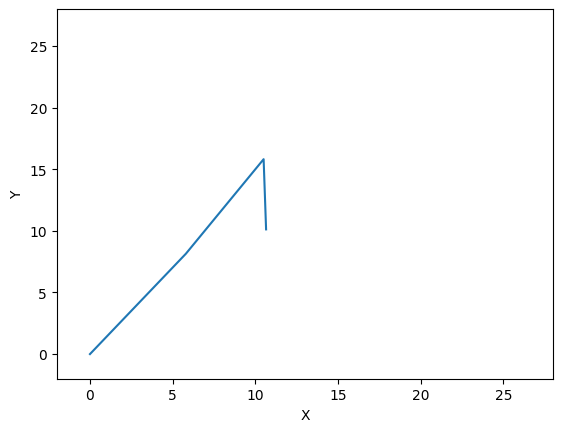

10.65247761109447
10.121329077846324


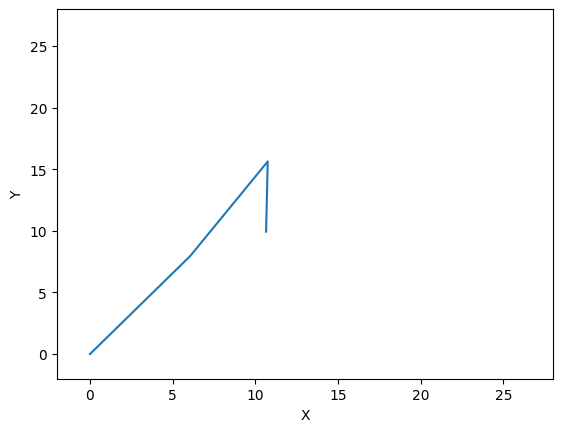

10.652972671537105
9.935399230007217


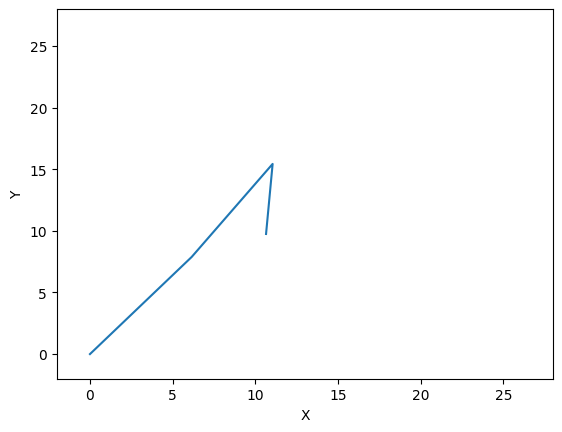

10.650222733306322
9.749489060188449


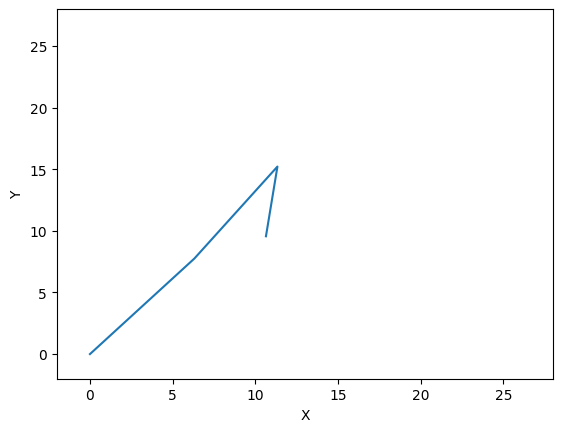

10.644228634059948
9.5636551984287


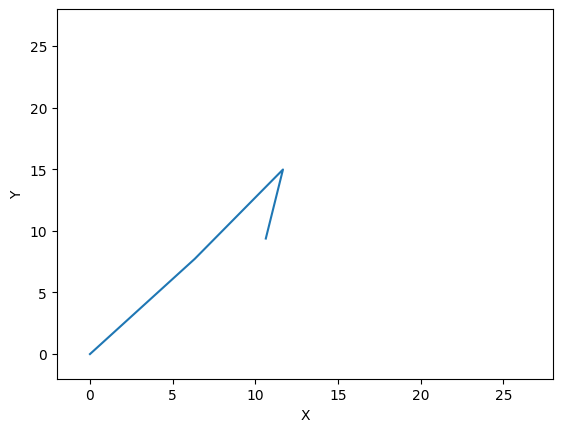

10.634992199658685
9.377954251522478


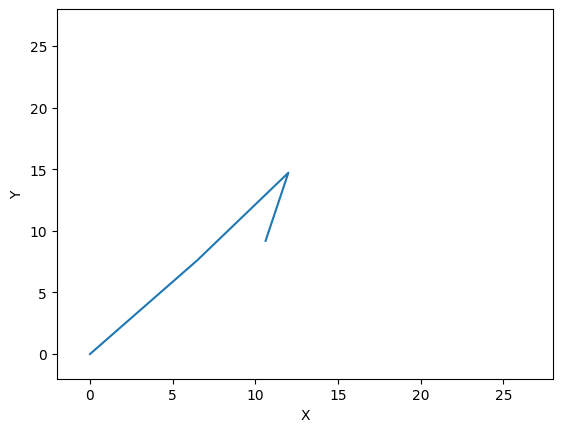

10.622516243609923
9.192442785777136


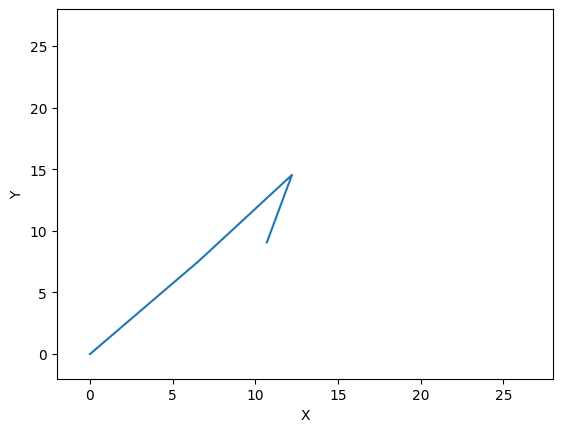

10.695046625574886
9.053113218360037


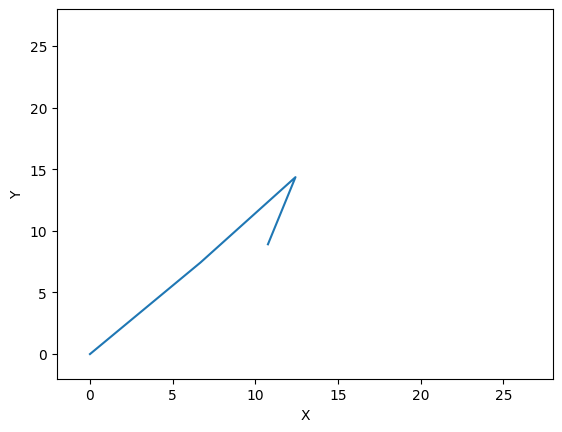

10.765134324572083
8.912539041805813


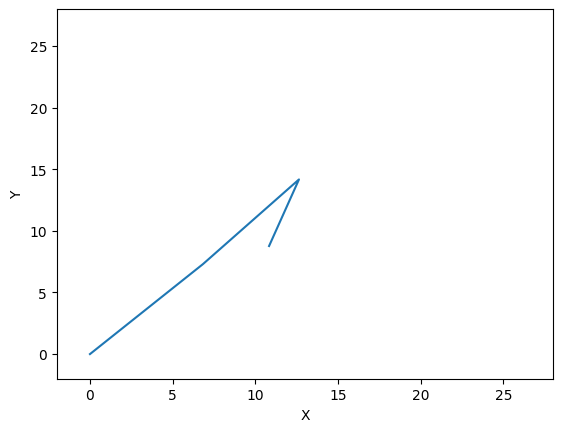

10.832757991209427
8.770763076370407


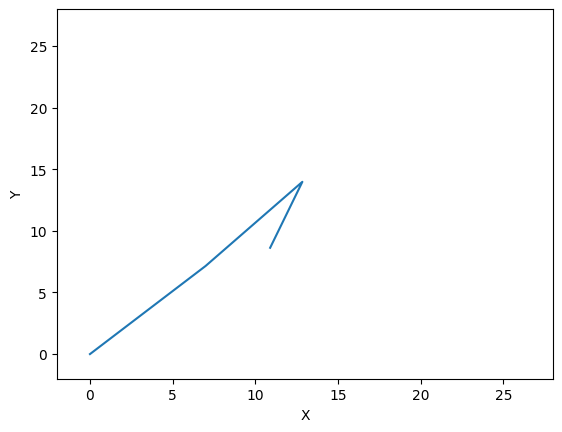

10.897897026662983
8.627828508386319


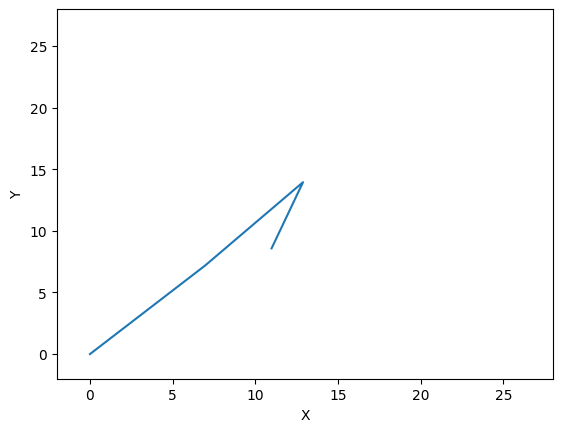

10.984179031671658
8.580369551372417


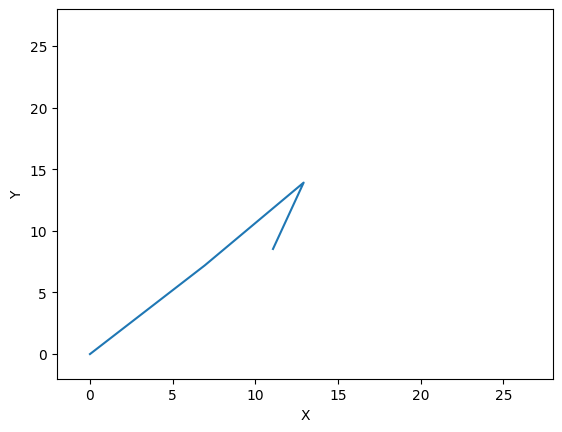

11.069619622506158
8.531411993967904


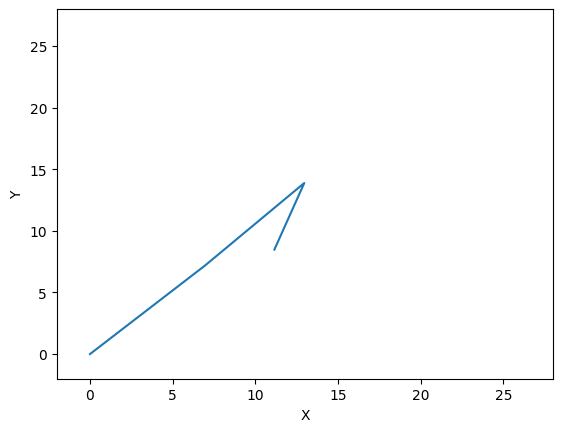

11.154192773134833
8.480970749119034


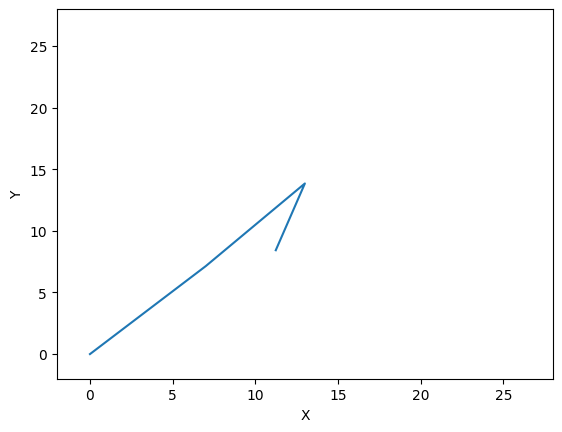

11.237872721756725
8.429061181717618


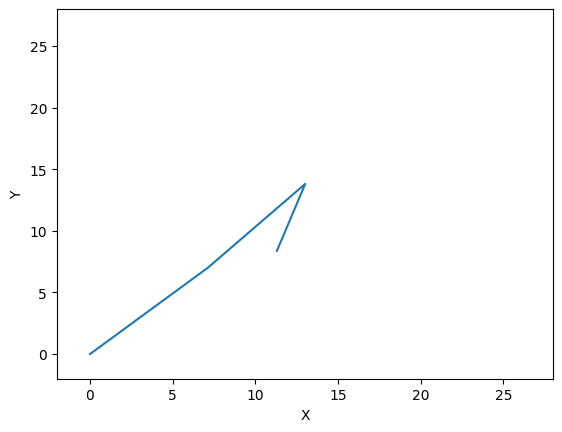

11.306618780199143
8.379749440043948


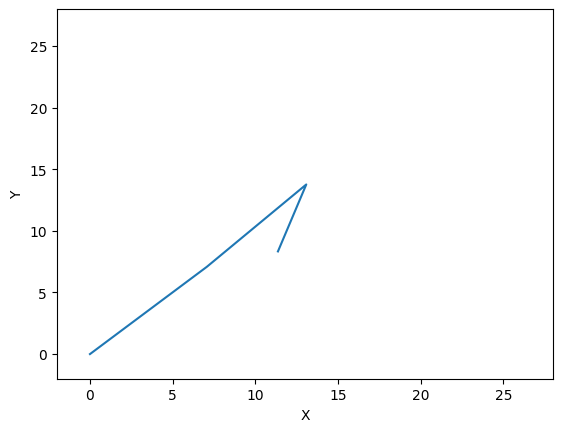

11.369637566005675
8.332566331638278


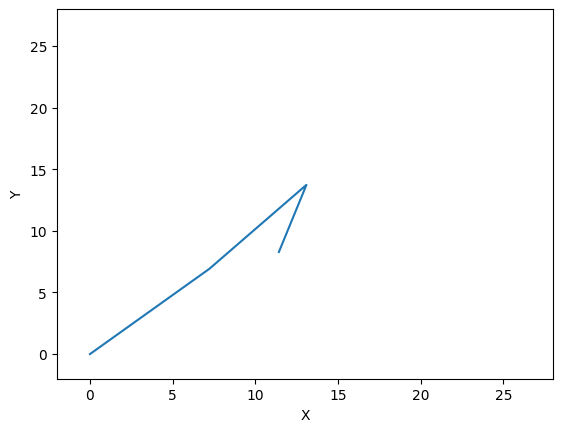

11.426747902847652
8.287443695900313


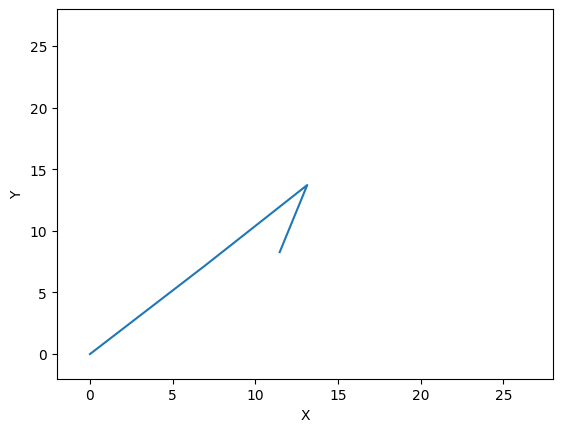

11.474499974080606
8.271318028758094


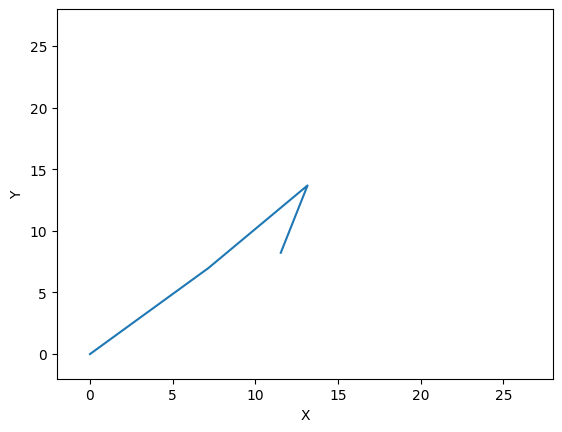

11.540934965240082
8.223973779436198


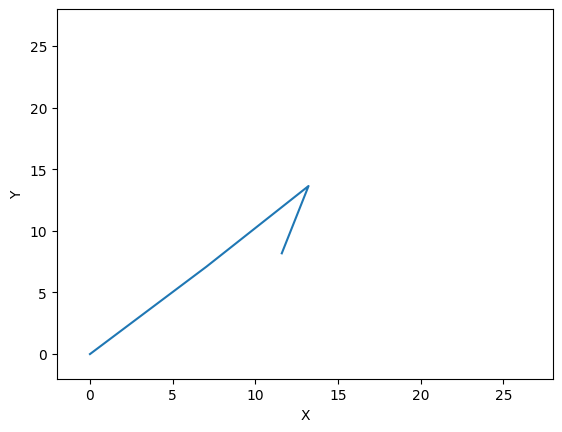

11.601571308783834
8.17880561415755


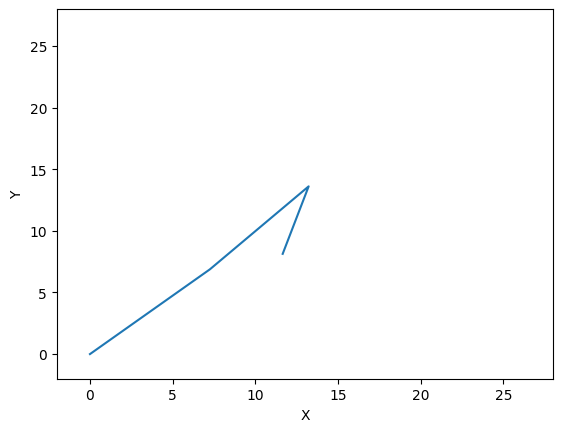

11.656228554098188
8.135744758550672


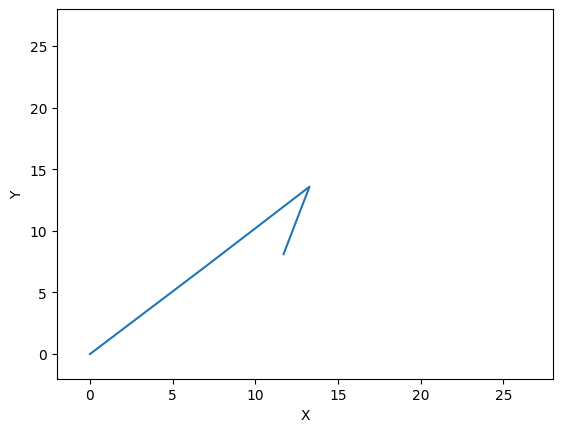

11.708338189309682
8.109469185863116


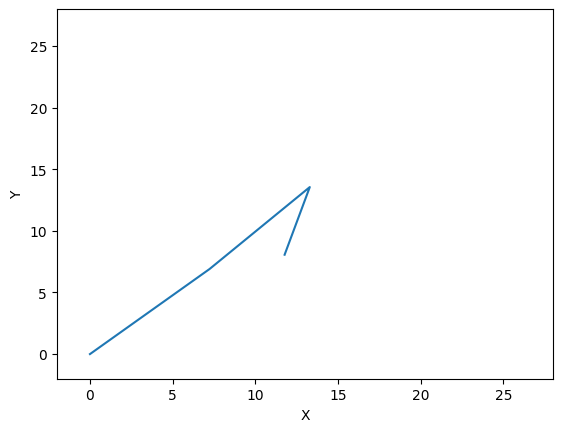

11.772496802649135
8.064132462919908


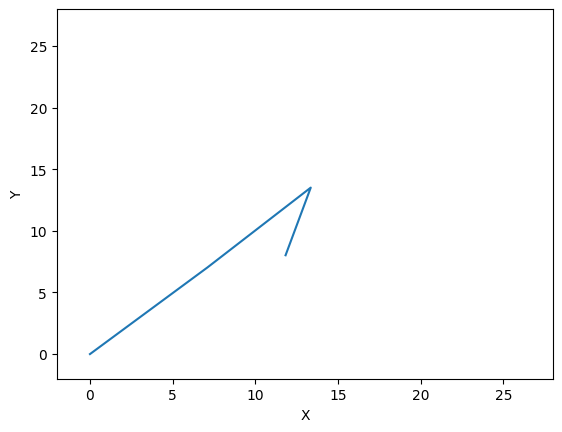

11.830786232394008
8.021020513233376


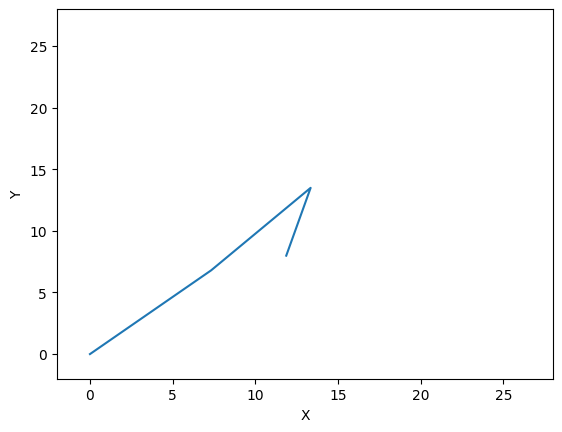

11.87164328317244
7.989192057128222


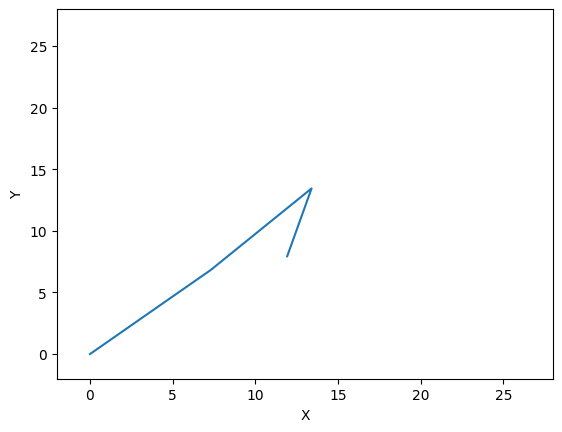

11.929043419810657
7.941187071473857


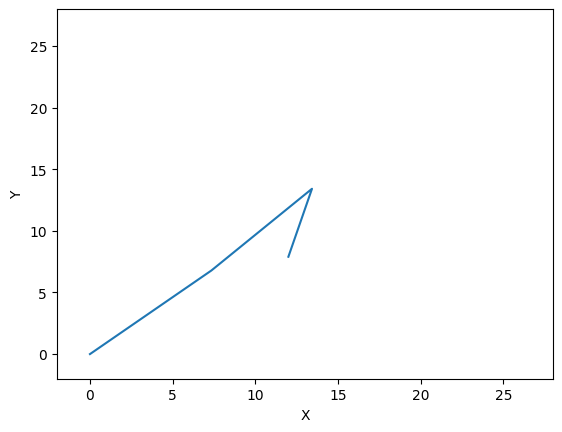

12.001233756447451
7.9002741797084965


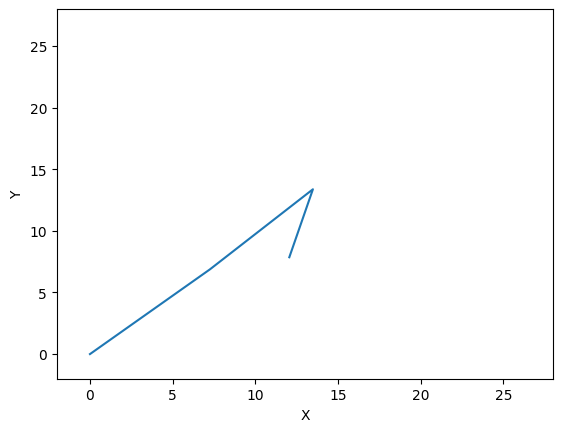

12.057212515750013
7.859259091735979


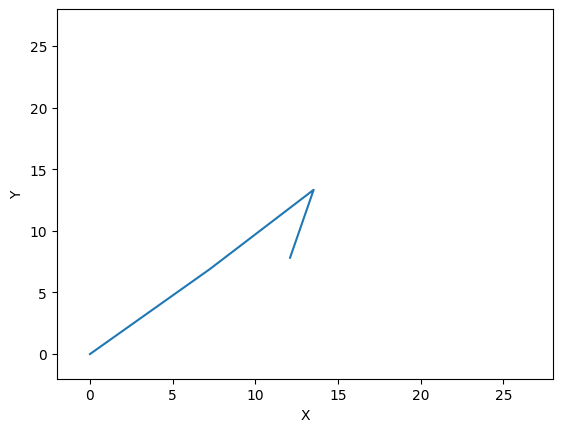

12.101826071347826
7.8172469808283935


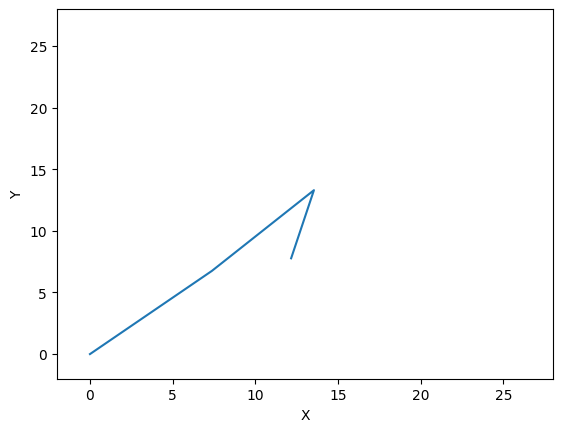

12.167363462205897
7.7736528687838975


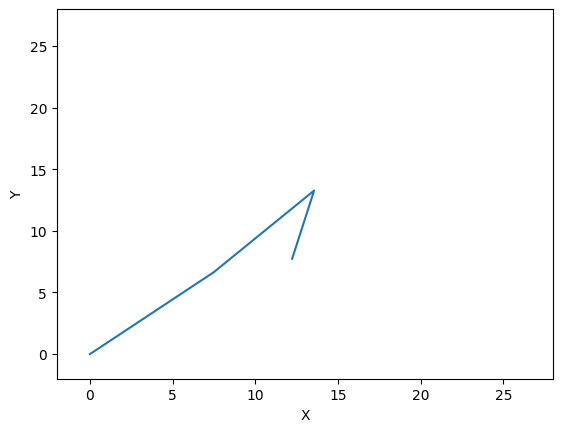

12.227076151143068
7.732448842622378


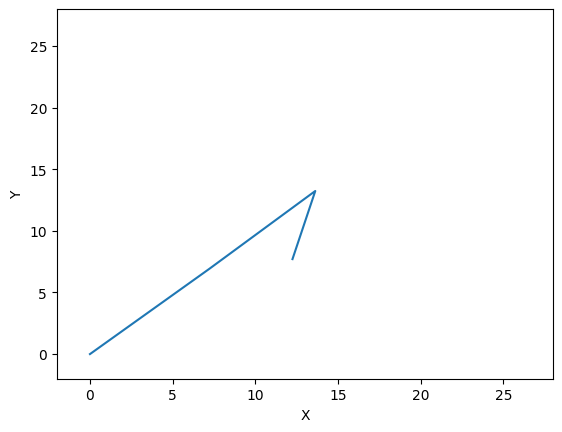

12.248745669864345
7.708187031203492


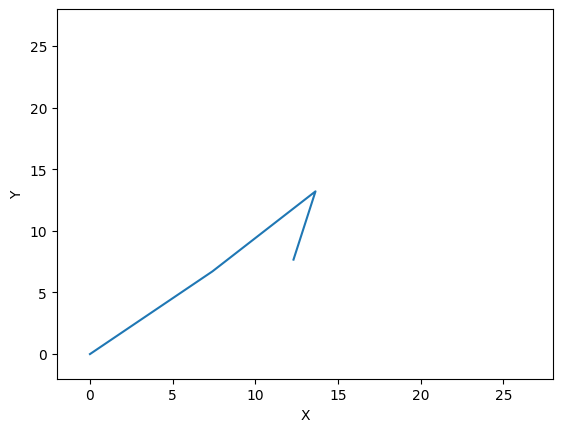

12.310322281916493
7.666839691421209


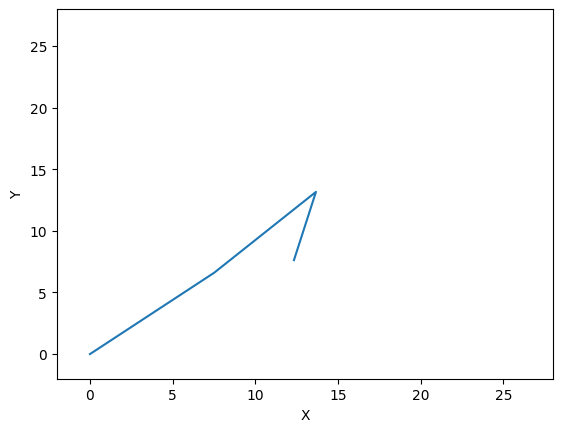

12.337531232823482
7.623551604691356


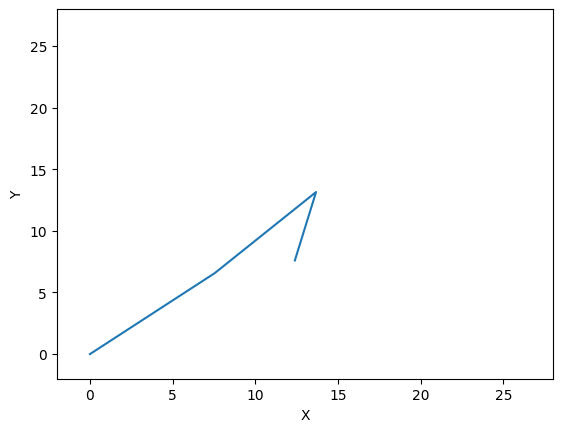

12.392410696328223
7.599787687502965


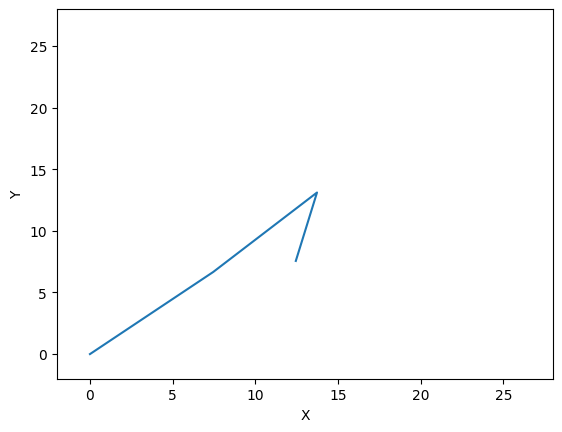

12.449955192954778
7.560707572884973


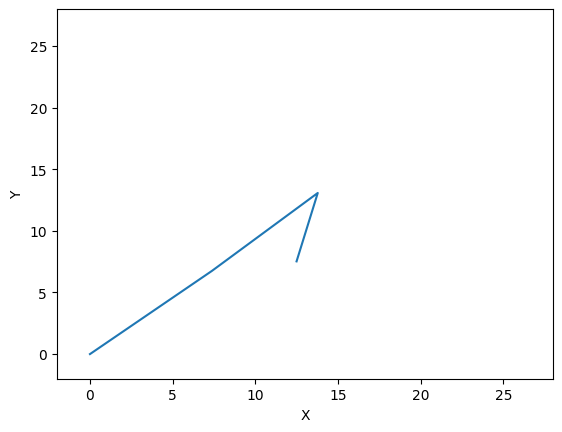

12.495339673628525
7.52458967123201


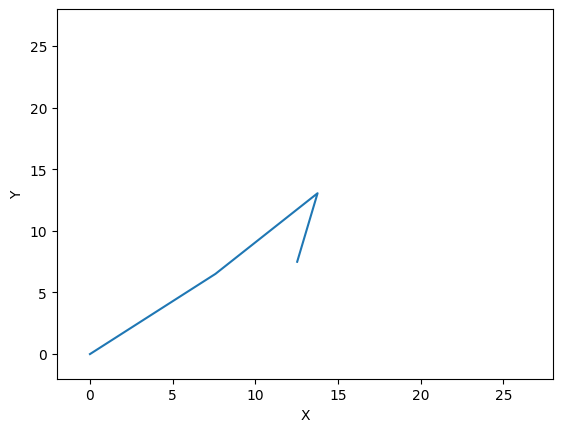

12.53277738898068
7.492081969217


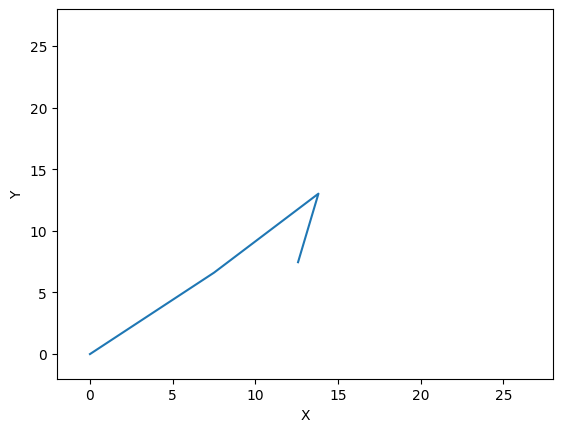

12.585429670207464
7.457444238748516


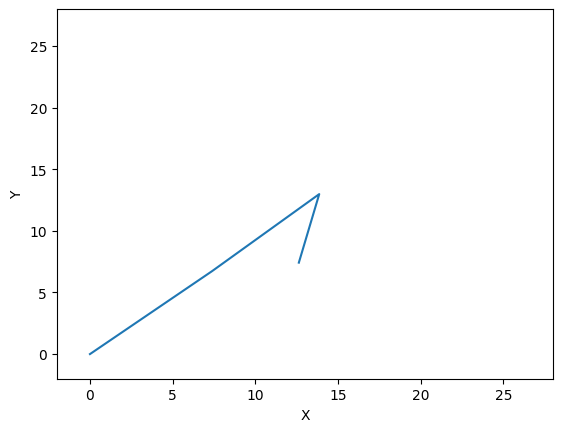

12.633463532900466
7.420865388071659


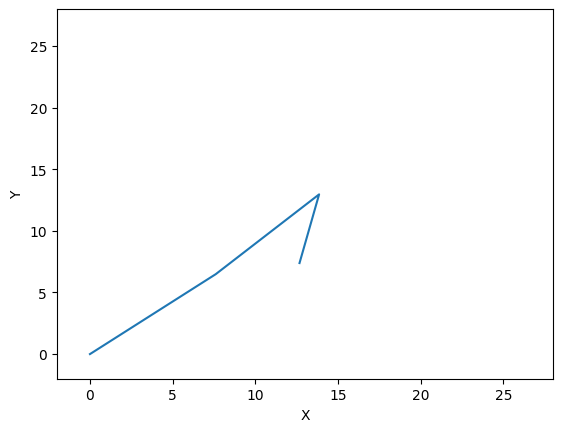

12.674334096265458
7.388736745603379


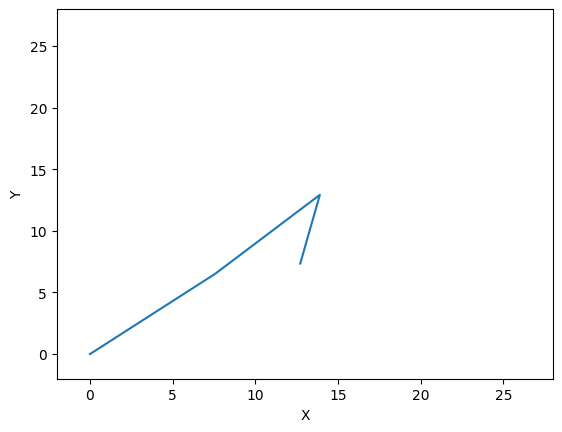

12.719074180925105
7.350615610472806


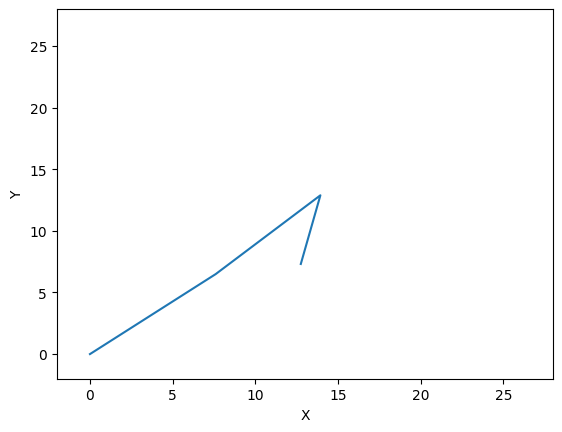

12.752148672258611
7.313468486517806


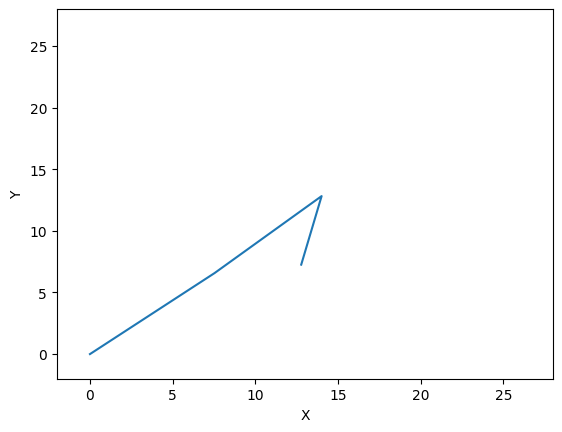

12.777330306728603
7.259465943296485


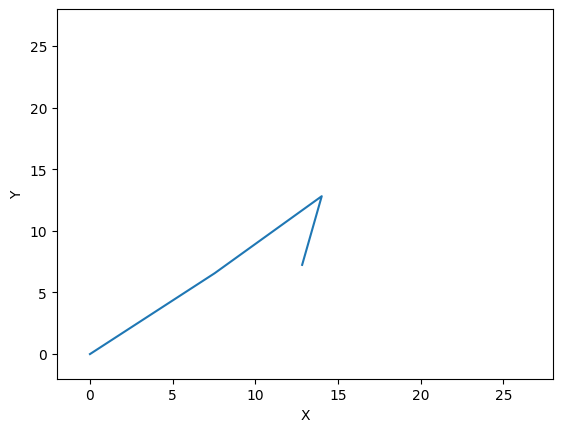

12.833231622964833
7.240408068418445


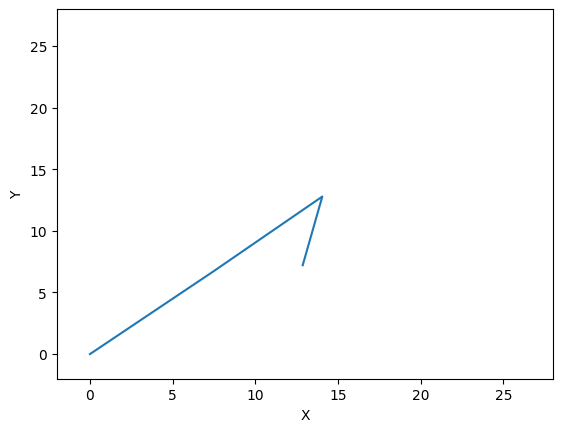

12.867274622814666
7.211915010376325


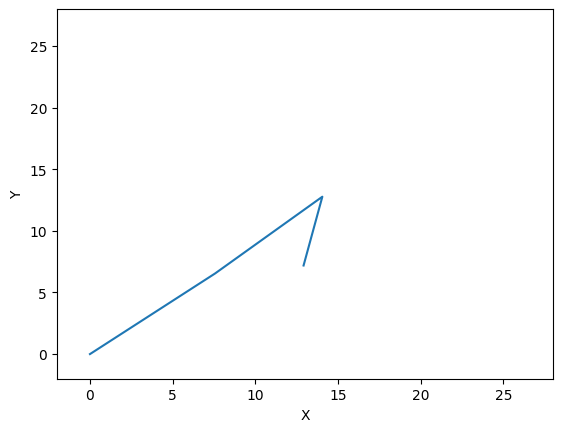

12.919057715329306
7.189356205488603


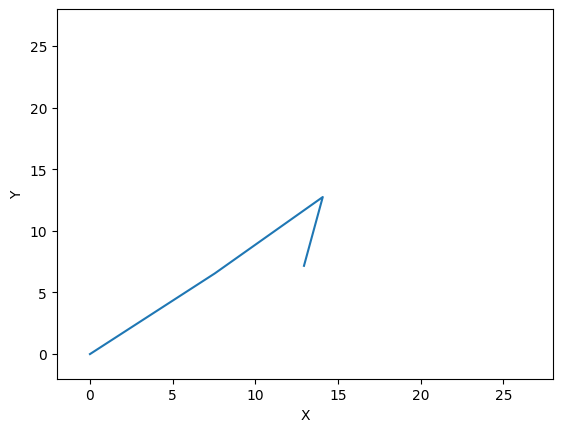

12.944271521281795
7.16398554583004


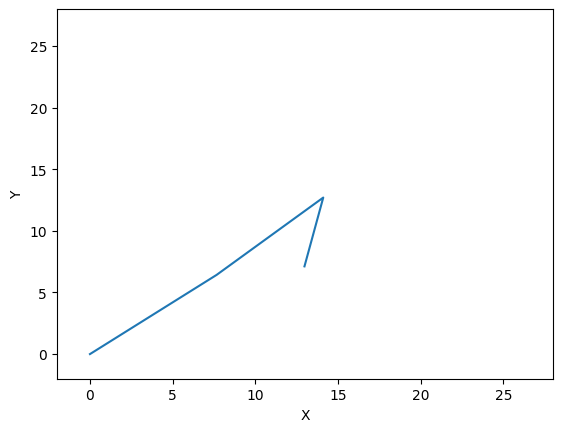

12.97375556852339
7.119396966243377


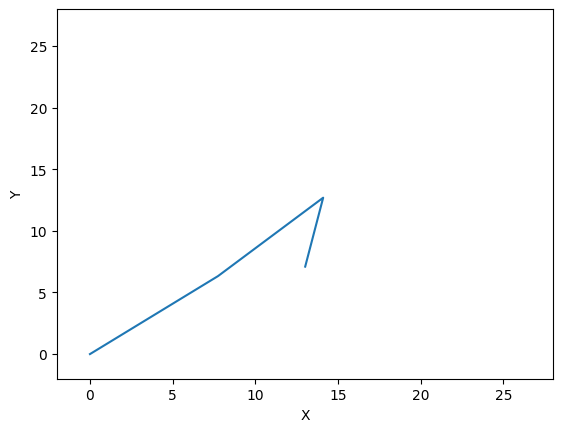

13.01756006178634
7.098711748171068


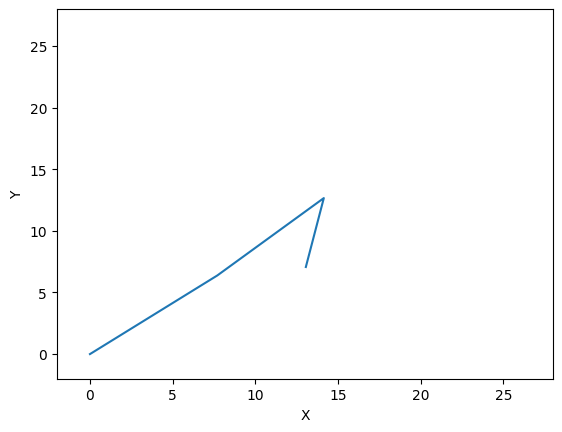

13.056578016572654
7.067831071369158


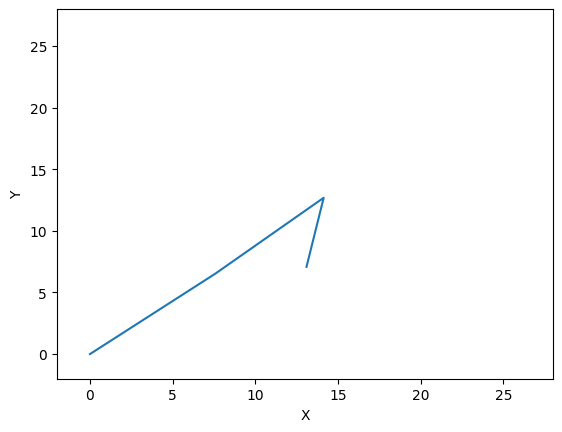

13.097213914637898
7.084163273785535


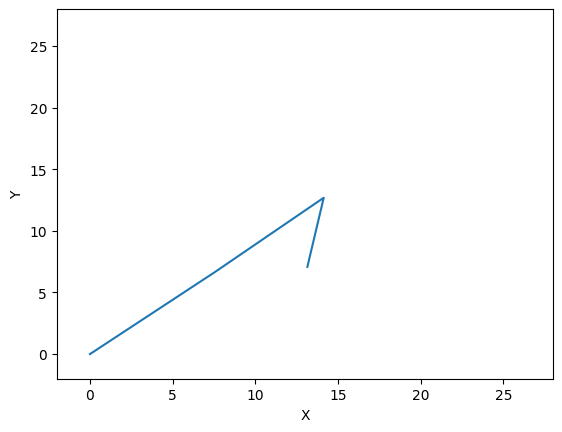

13.148798238055388
7.077750079602271


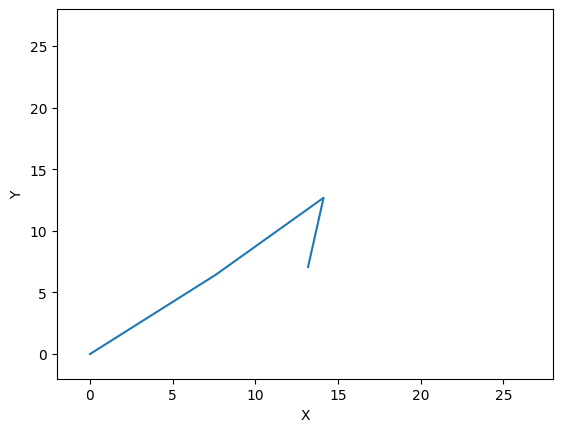

13.18916823888248
7.066906052525629


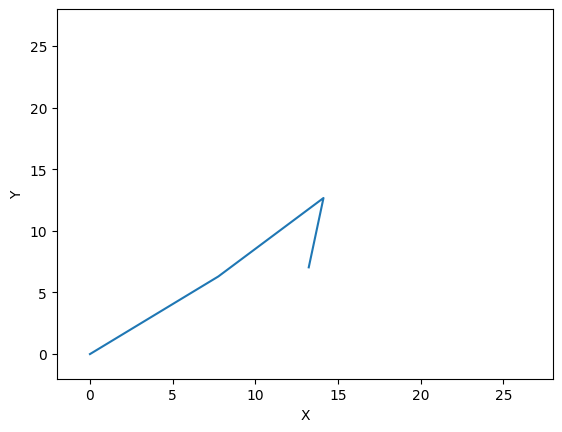

13.232558148557393
7.040042259824533


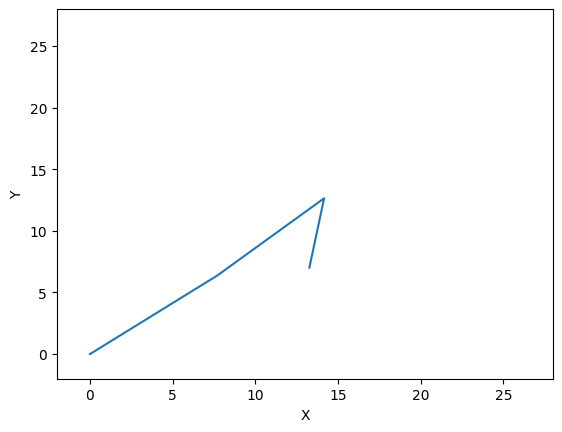

13.269392260456735
7.015589281044123


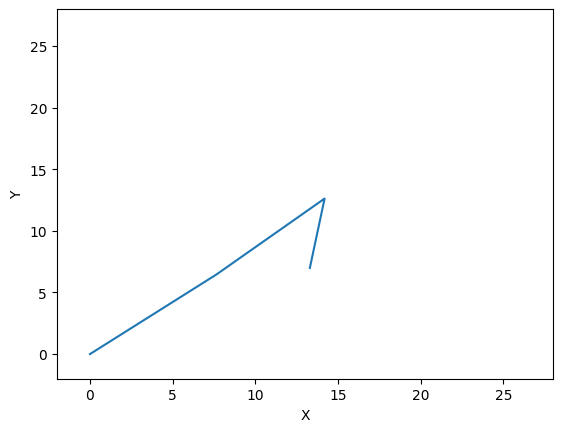

13.299501915790561
6.993463667486618


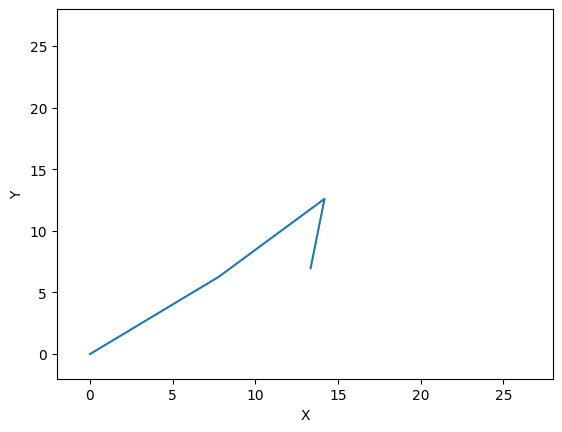

13.344529778116591
6.963918888483856


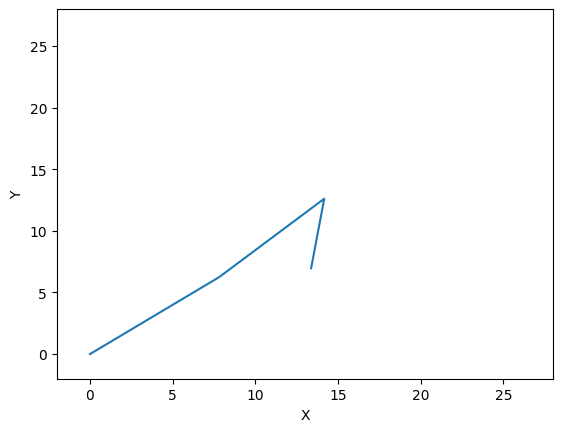

13.376201852419692
6.968834180047345


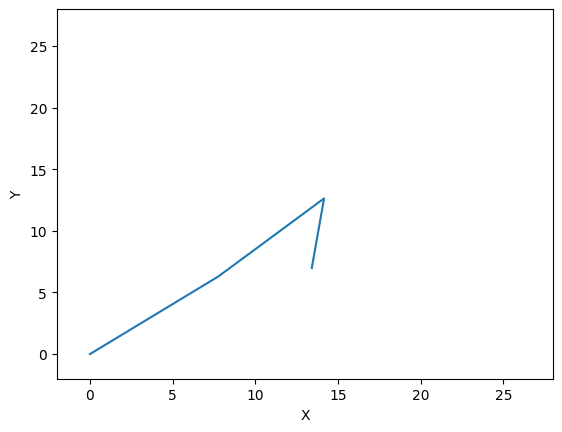

13.41582763881762
6.982882576261754


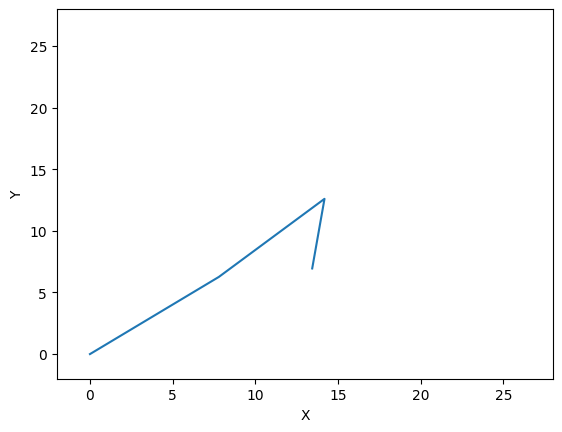

13.441558516738004
6.949945989869788


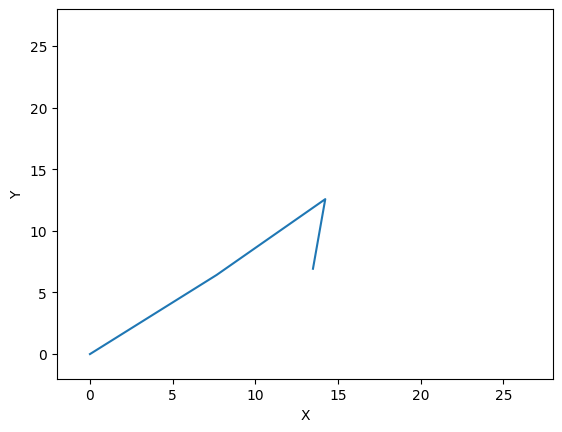

13.487766352541138
6.92597178843918


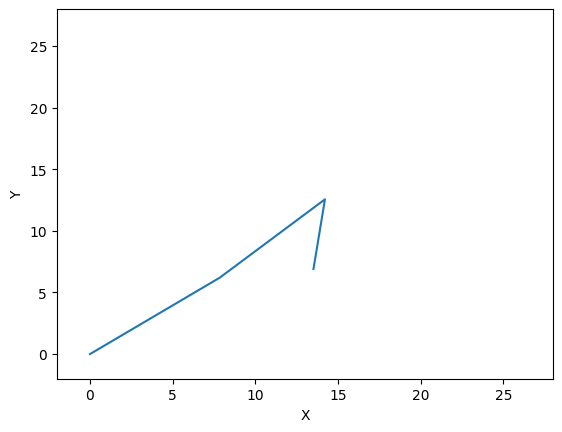

13.517870754569392
6.9037484940152964


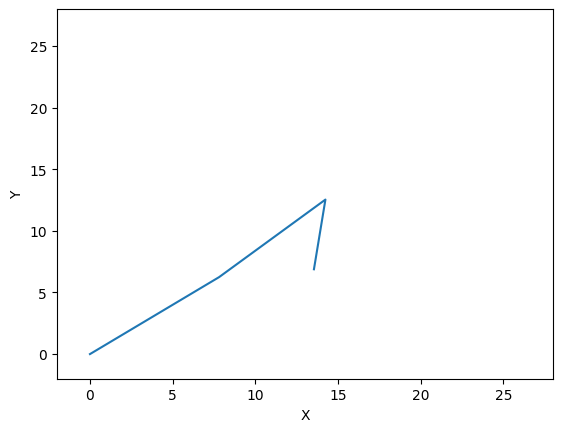

13.54673985044143
6.883749838355834


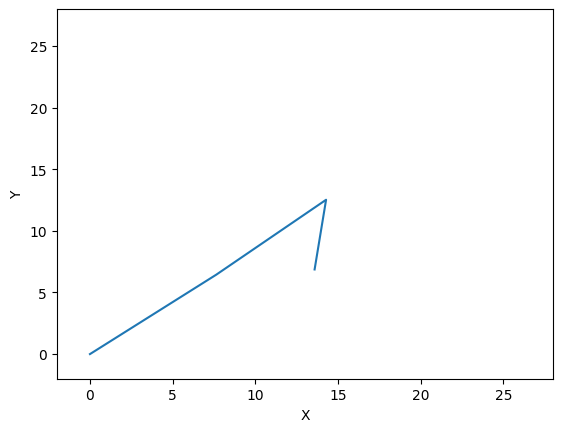

13.586388851214542
6.868650200776543


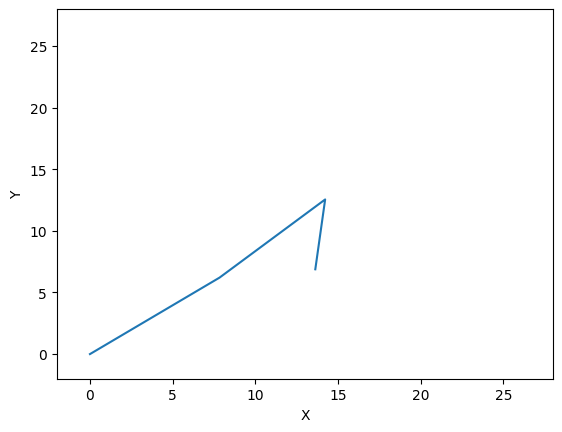

13.628916026633231
6.88218006864219


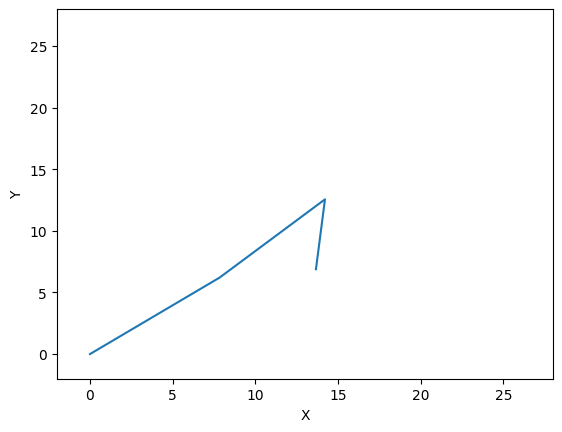

13.667795908854773
6.8876859707345846


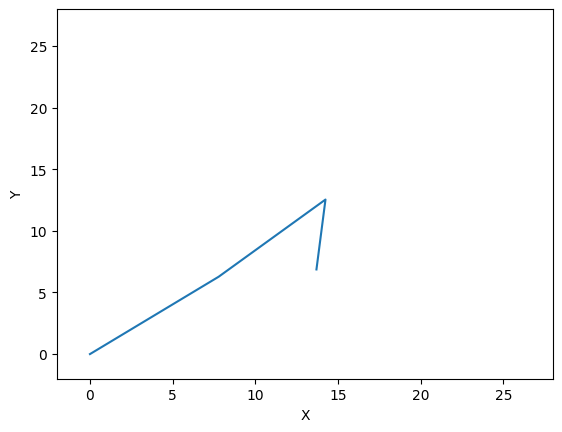

13.698447491244707
6.869690694861538


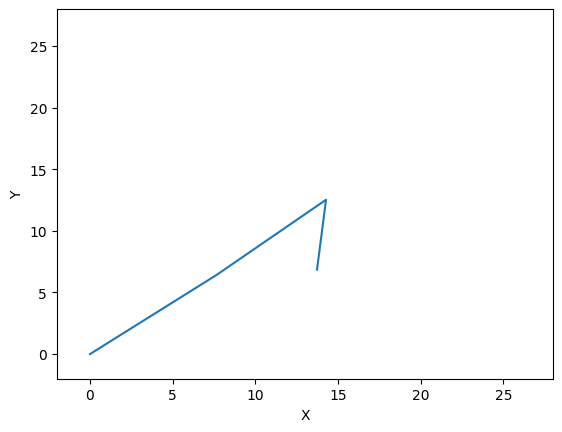

13.731958166498968
6.8536029037448465


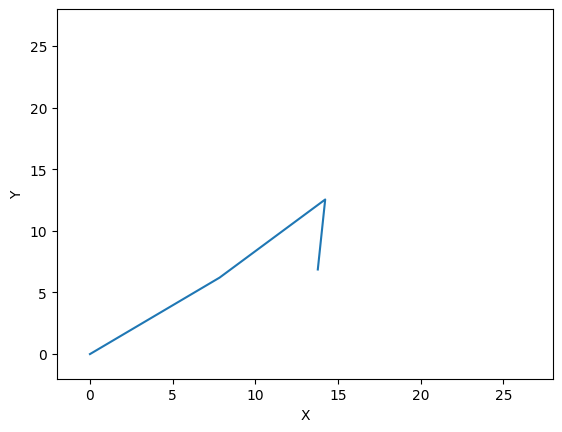

13.780238424324565
6.865503604908119


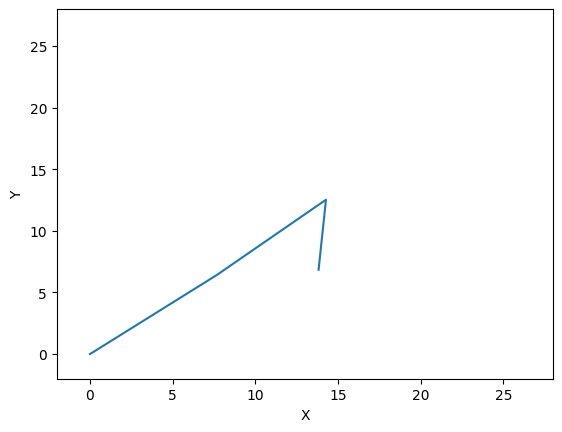

13.827868400360225
6.847453043861089


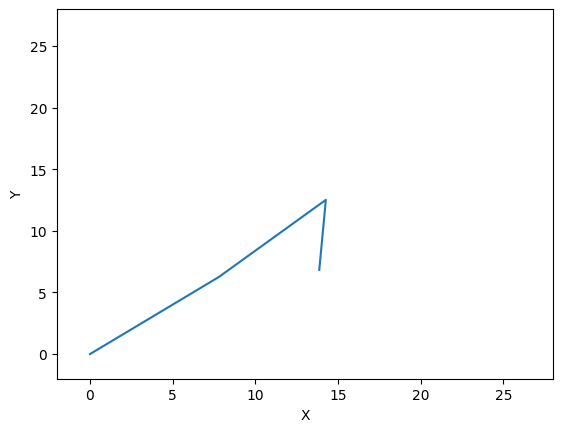

13.868841126505766
6.831915335375837


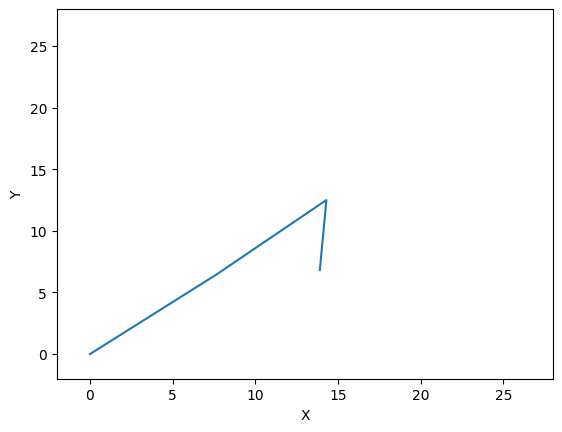

13.902985120911111
6.818807076606261


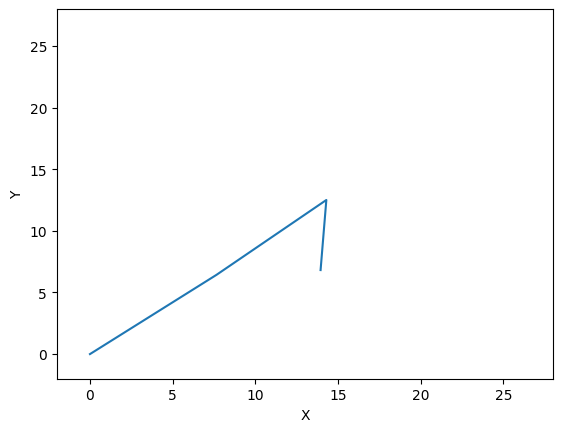

13.948421531469348
6.8188623014006255


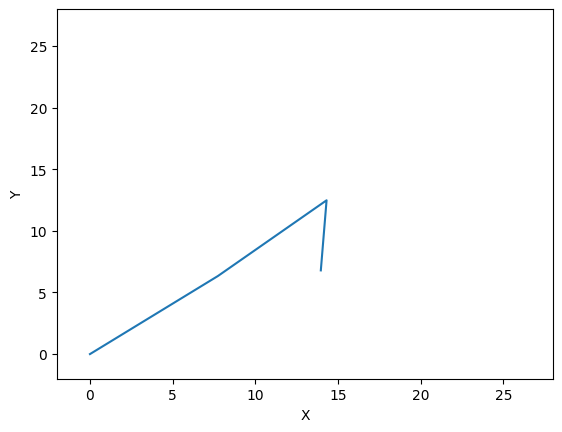

13.962810125114801
6.7931322957551385


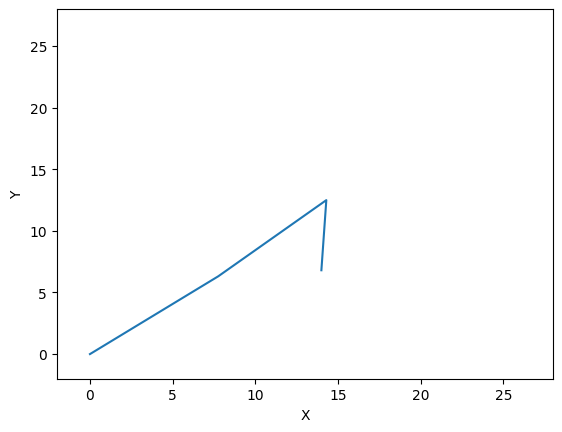

13.996839895388757
6.803754043991809


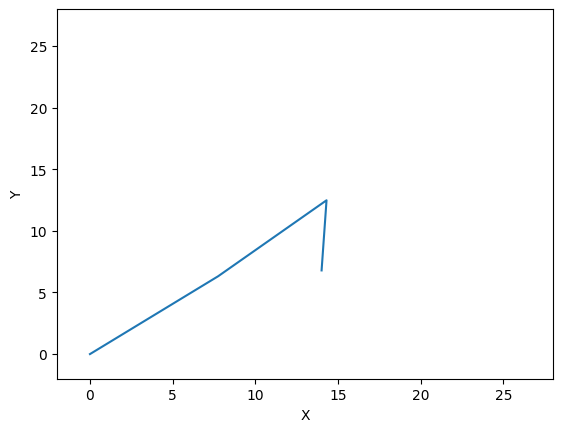

14.009538301159616
6.791120408511993


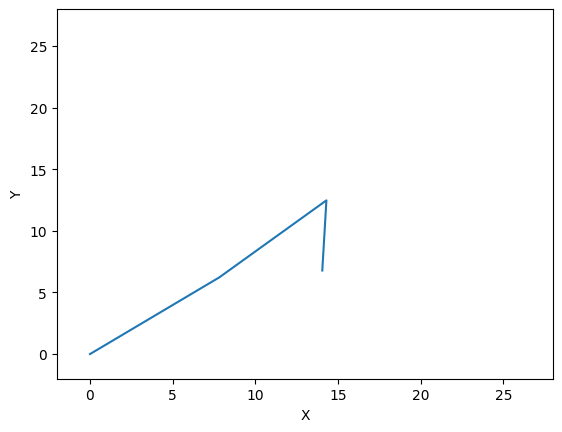

14.05168387601059
6.782774733571462


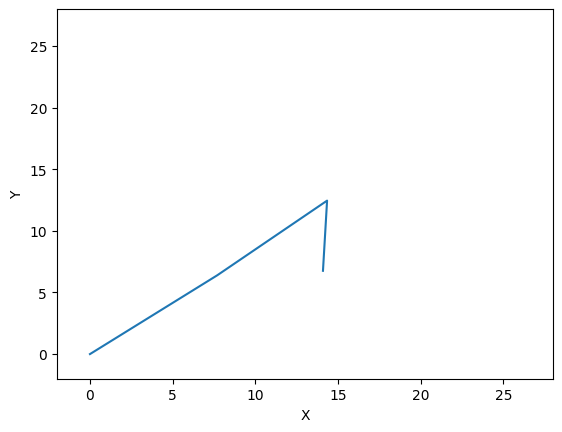

14.0927029590657
6.760709275866865


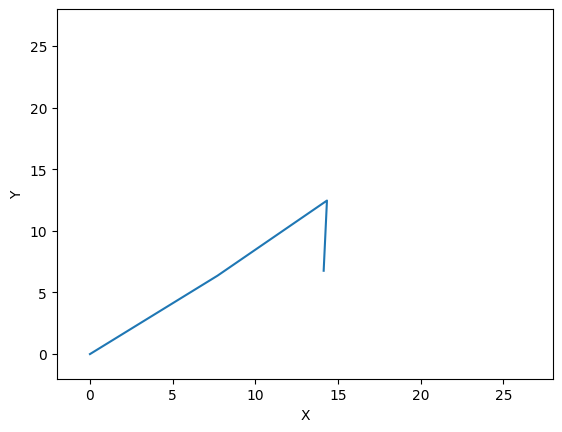

14.134947251381796
6.76432641992584


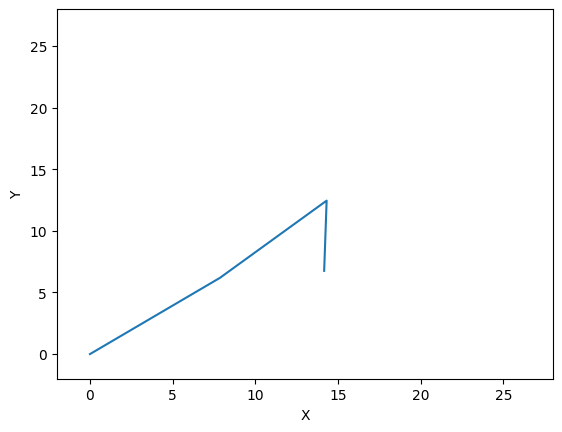

14.165023002533545
6.7571127404843185


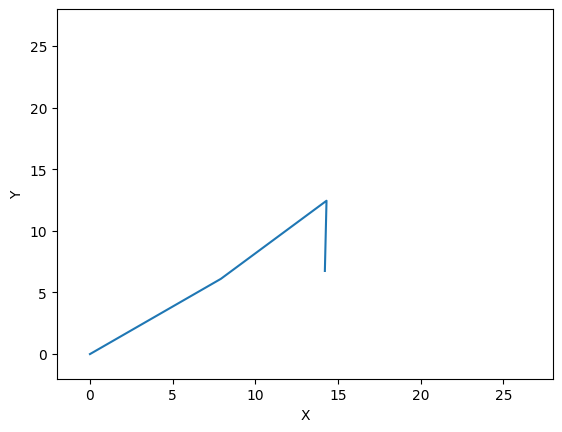

14.207521034092323
6.747472950414165


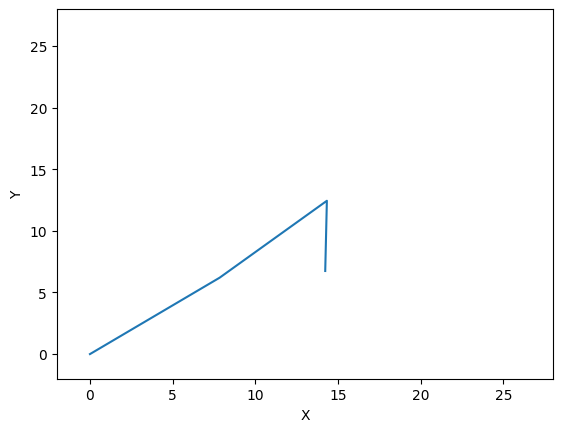

14.22936602419891
6.744095772881137


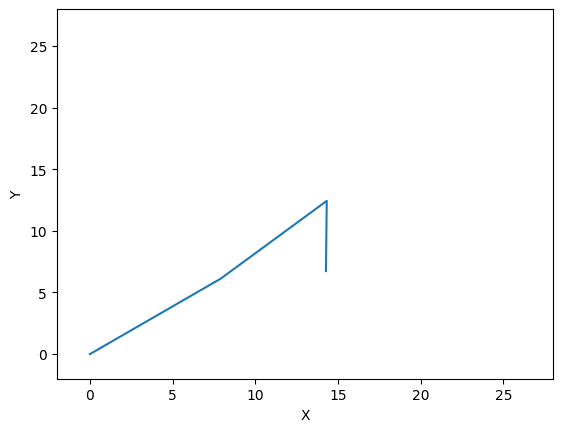

14.271554744250883
6.7354674426775185


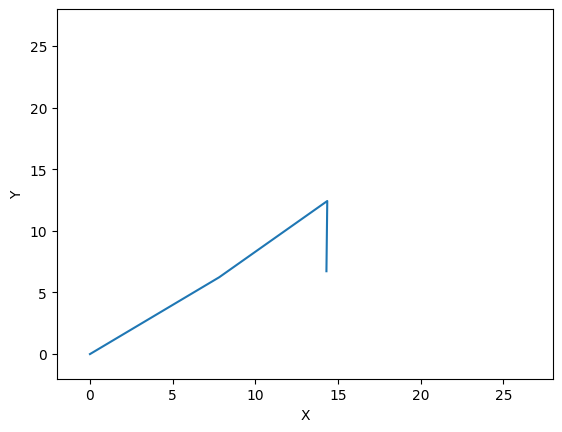

14.302411056125878
6.724781190024532


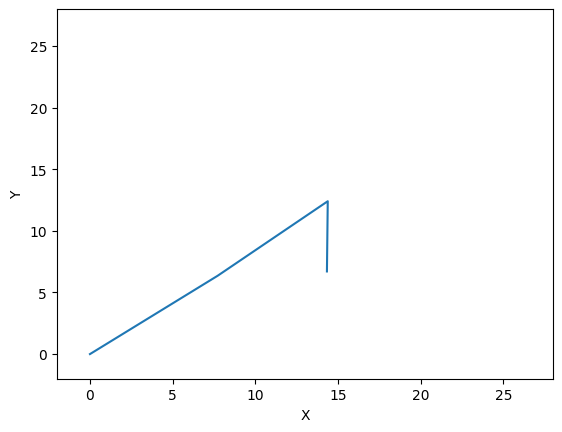

14.332366491590916
6.707543340731482


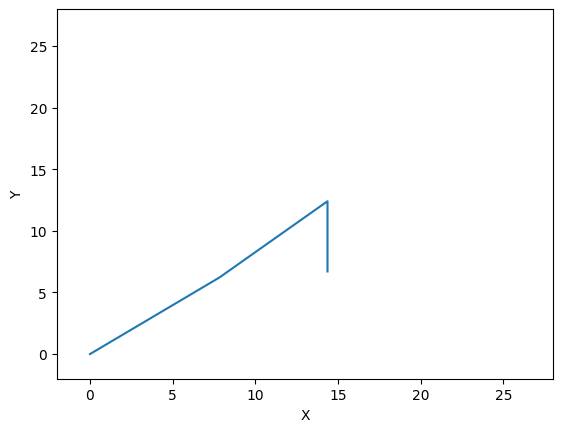

14.366731389888507
6.706254815397279


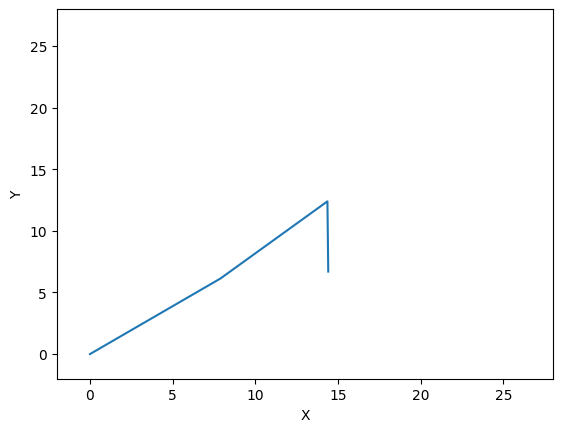

14.412058663758723
6.696589332158889


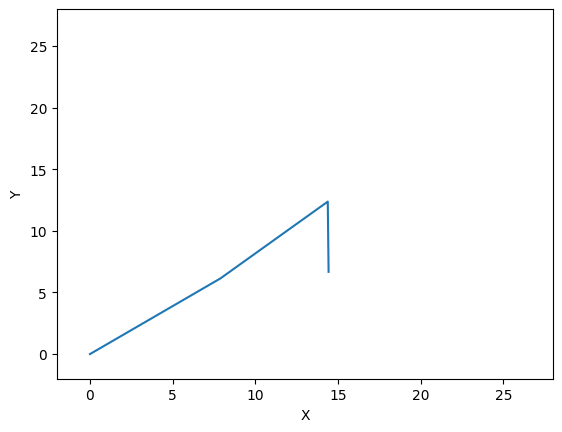

14.432772091557645
6.676112085624312


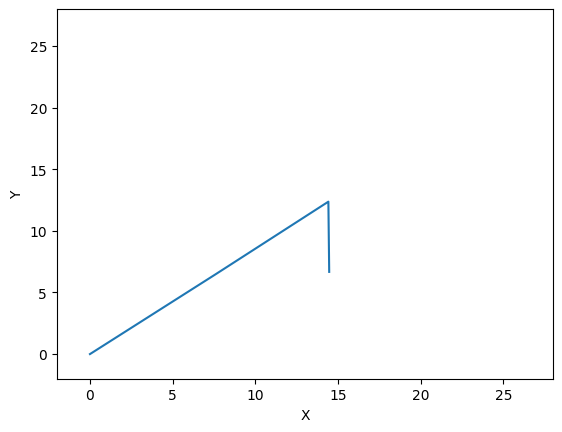

14.469534056153133
6.672188195021174


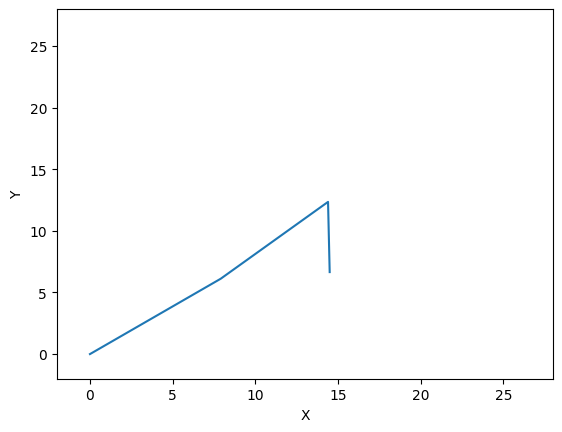

14.498819388113022
6.655060944052659


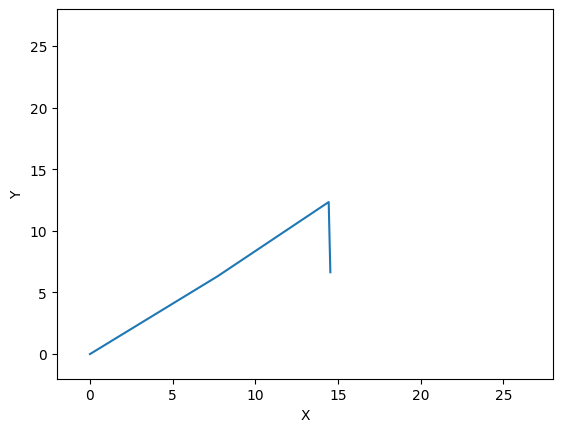

14.538523561168343
6.643098298756589


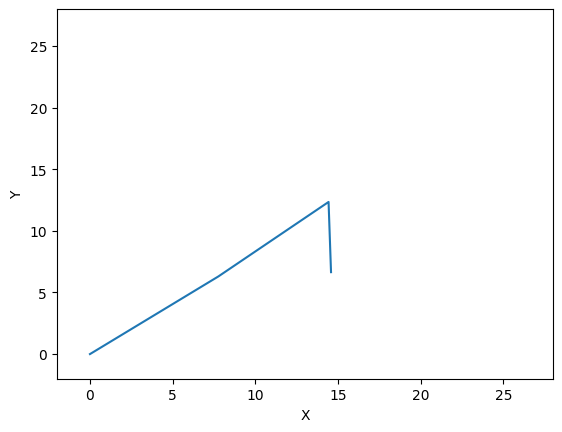

14.580241770903513
6.649948028651394


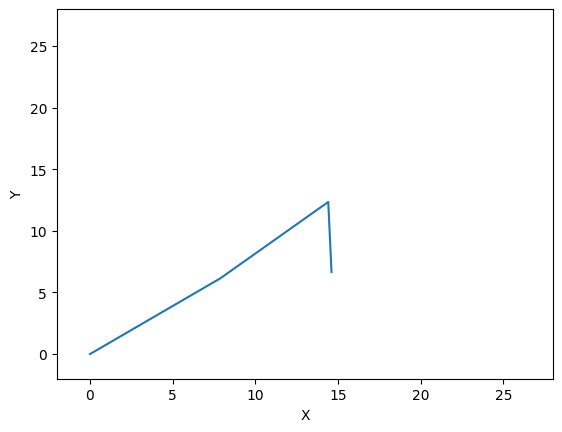

14.61023465183744
6.651025057715847


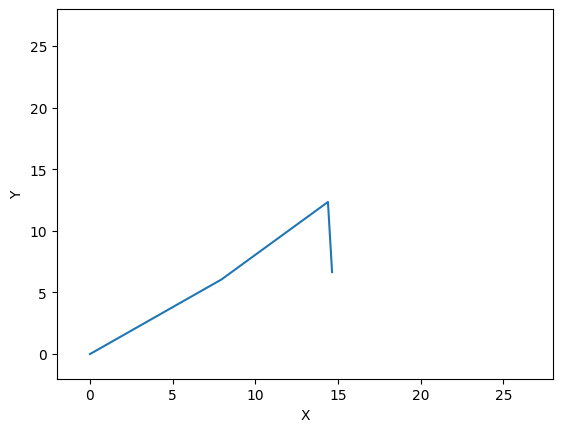

14.642942857528068
6.652430757751657


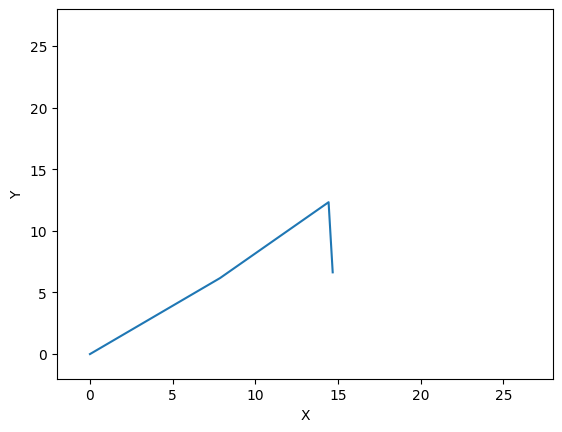

14.68124142966162
6.634167828356305


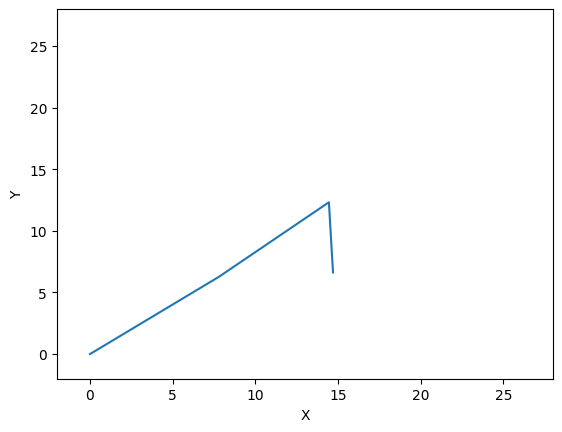

14.699949018740071
6.62731170446568


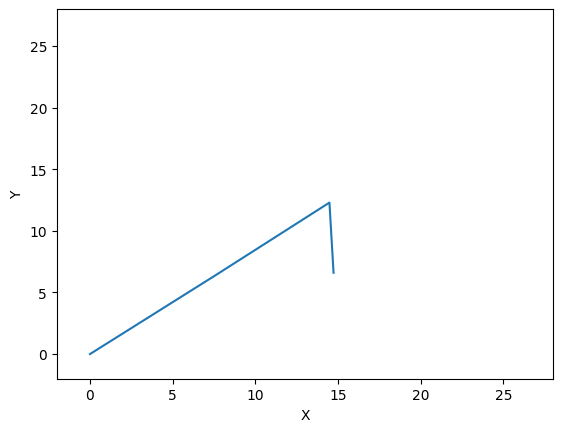

14.732742712258332
6.601970562087682


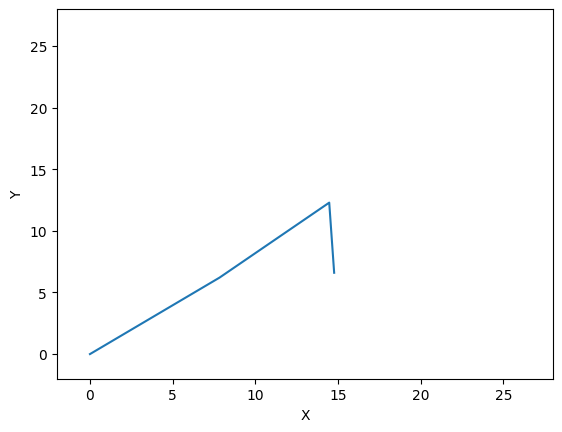

14.769428052647795
6.600747745963924


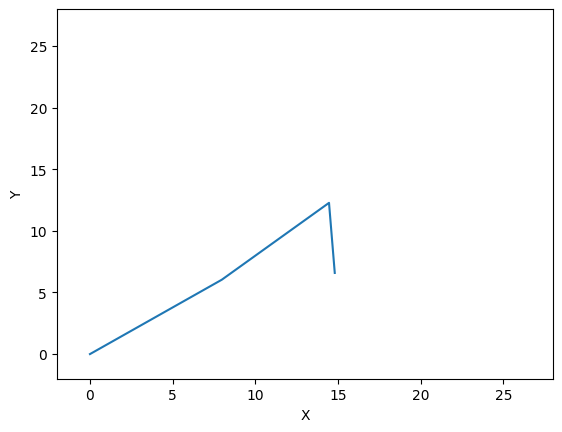

14.806345289525975
6.586620361911962


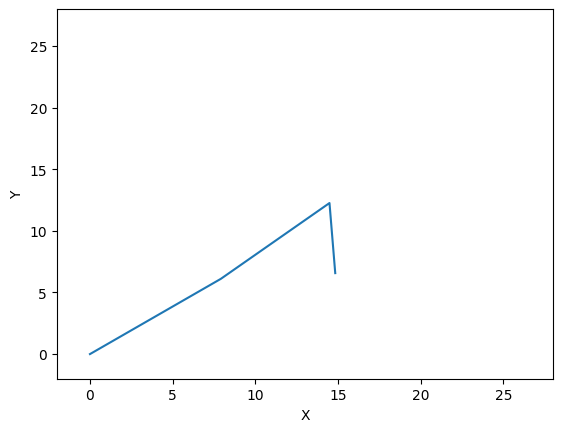

14.834966210509556
6.570723881816204


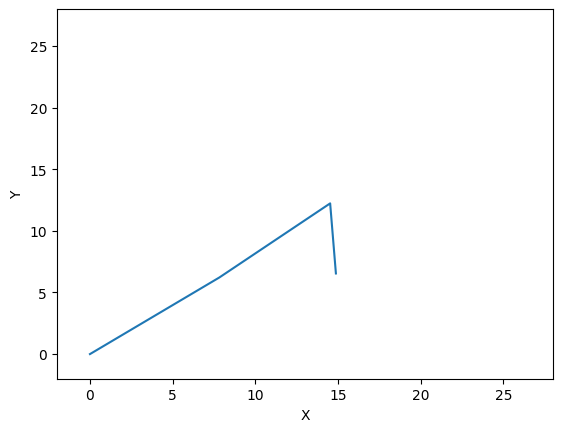

14.87501212763868
6.543400443516651


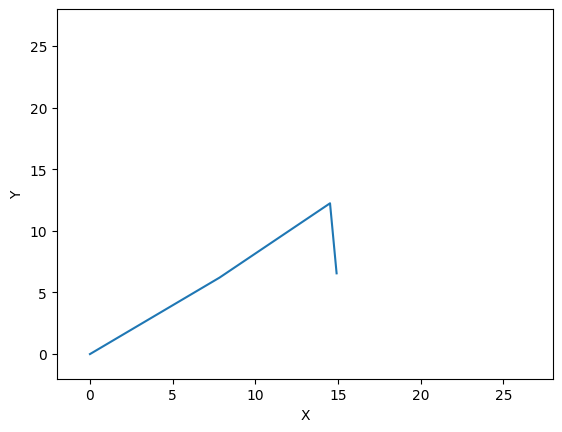

14.917204618848297
6.553516077517664


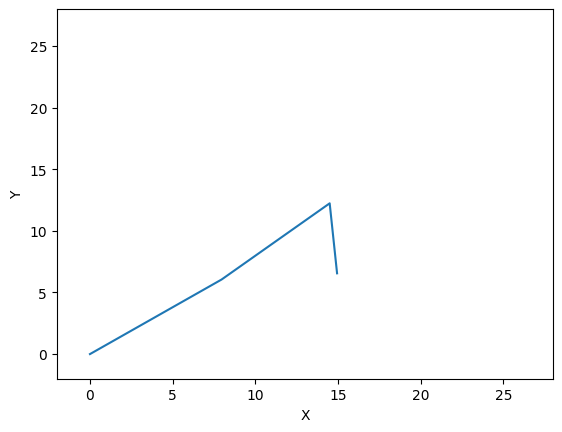

14.945761248039602
6.554814354455518


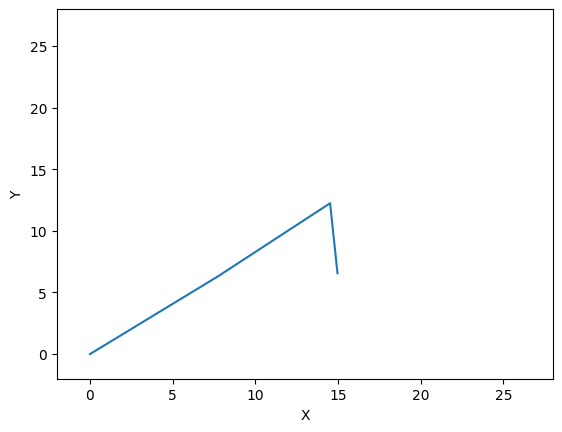

14.970019273346962
6.564053690448363


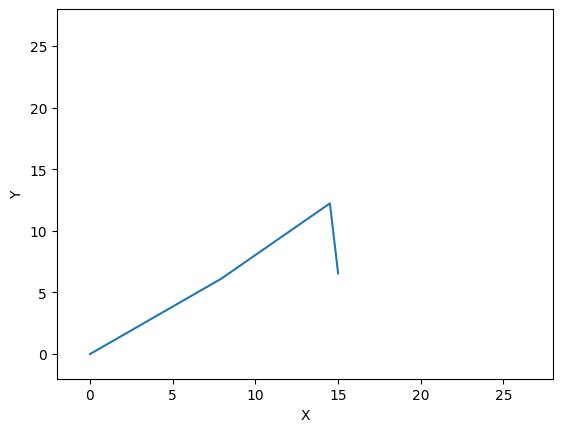

15.008693415709507
6.553995854581485


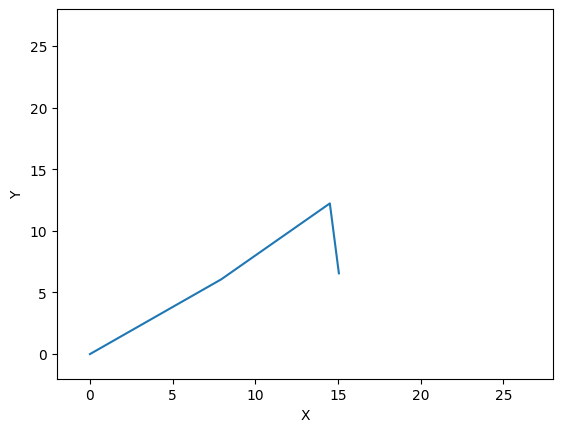

15.054882505333138
6.556689445817528


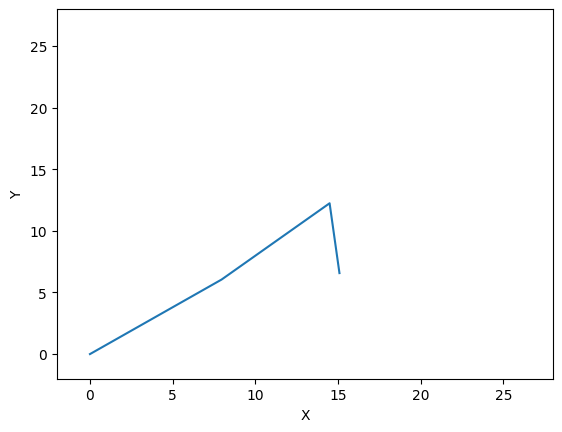

15.089774103375941
6.573071420438394


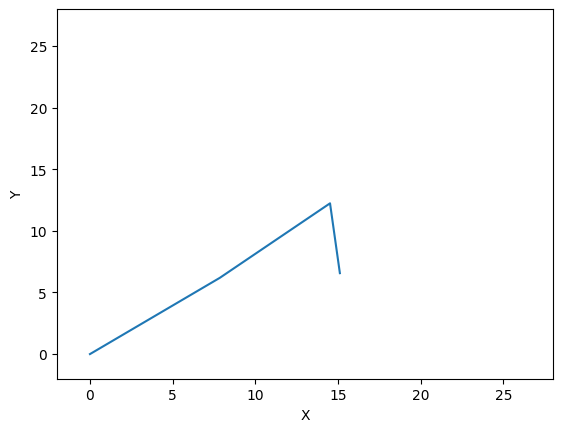

15.115386278640313
6.568408672294678


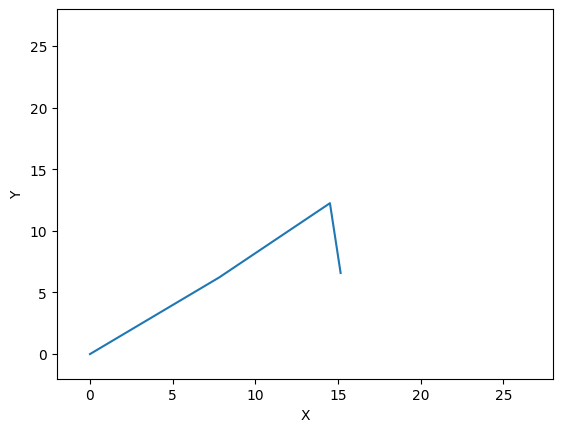

15.159760313369391
6.584219955330922


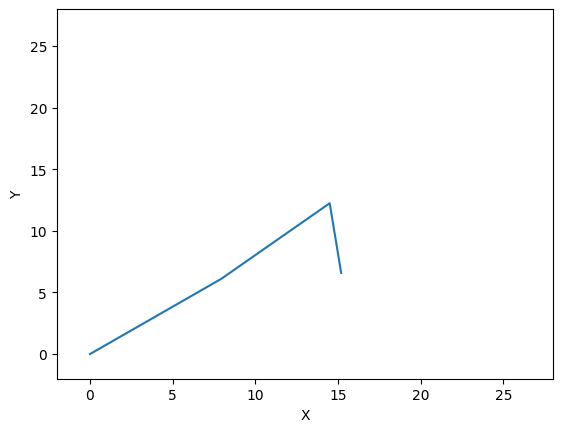

15.194646527340295
6.586248787486236


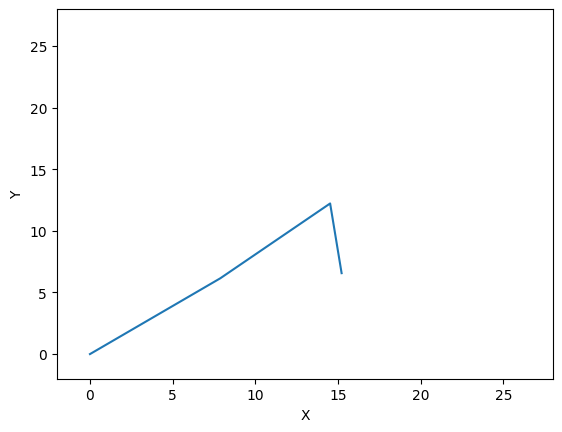

15.220122600864148
6.568045410963922


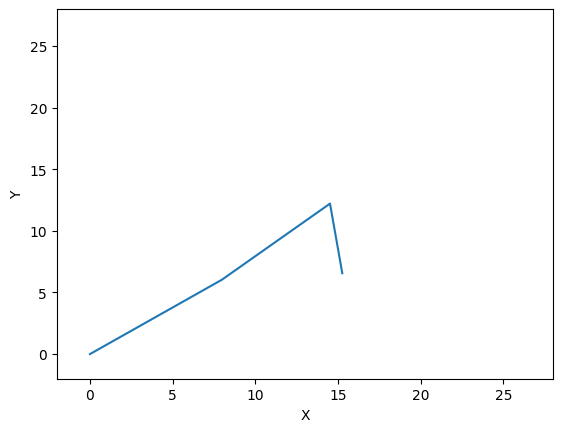

15.26161898007922
6.561884303803375


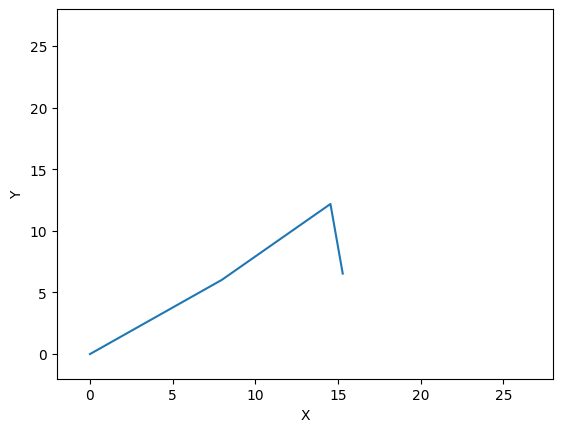

15.288488070373571
6.5324121982325725


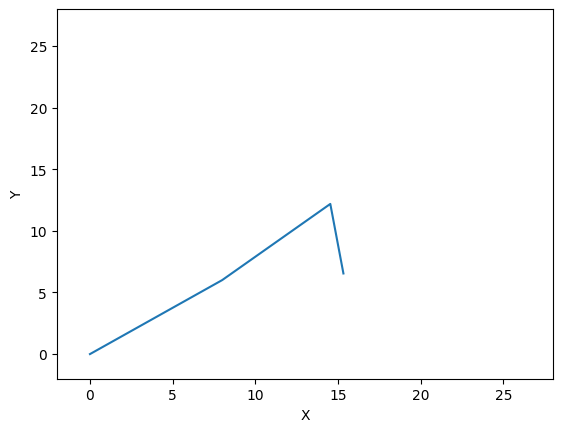

15.32946872592742
6.543476570238532


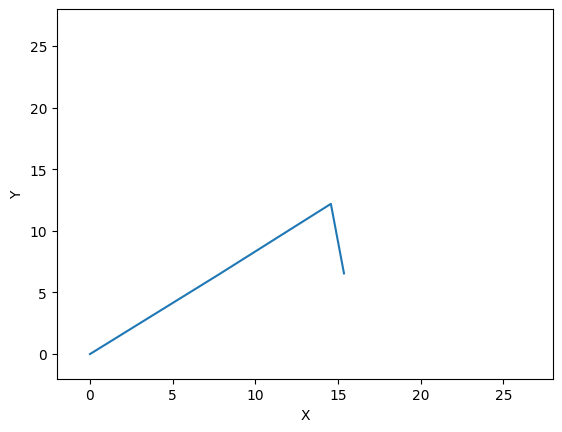

15.364058556898476
6.549087609752531


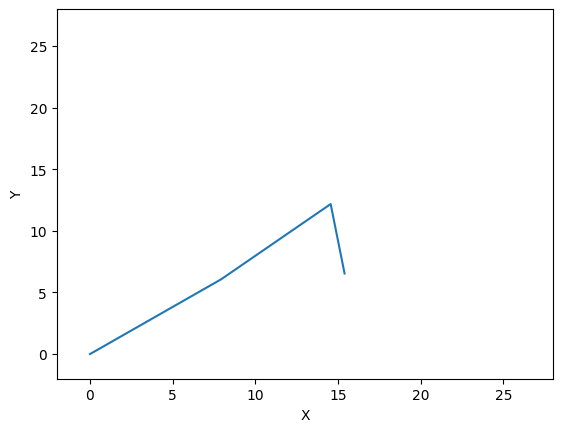

15.400038341567681
6.541225764687698


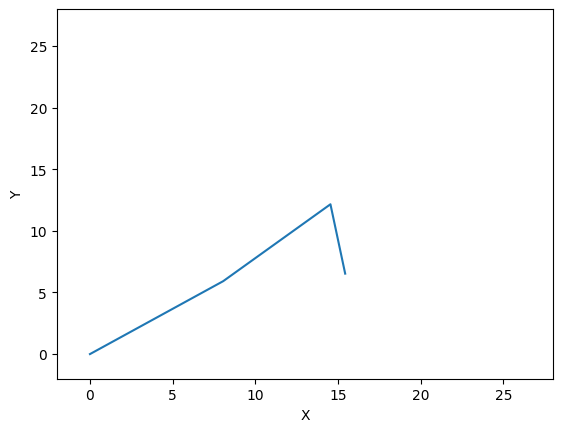

15.436220480300063
6.530533154171361


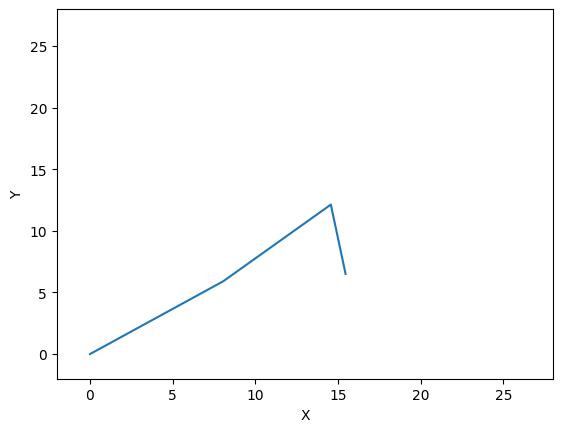

15.46062519664056
6.50360632240327


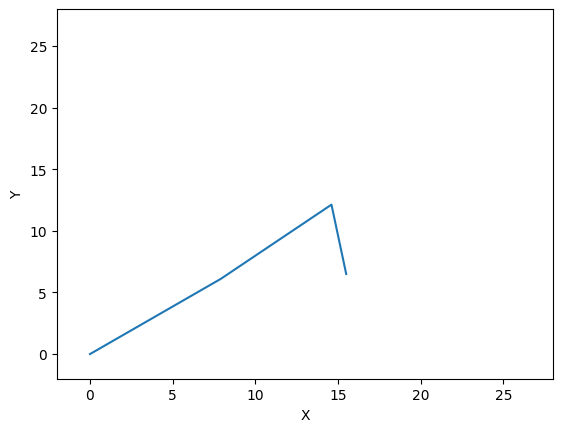

15.498440220955954
6.499777570369253


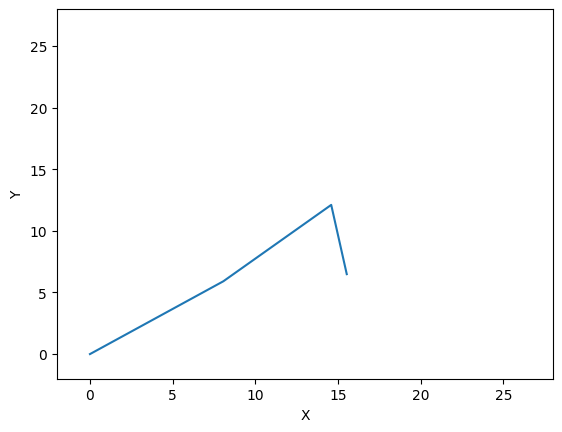

15.531855482935377
6.487457731237309


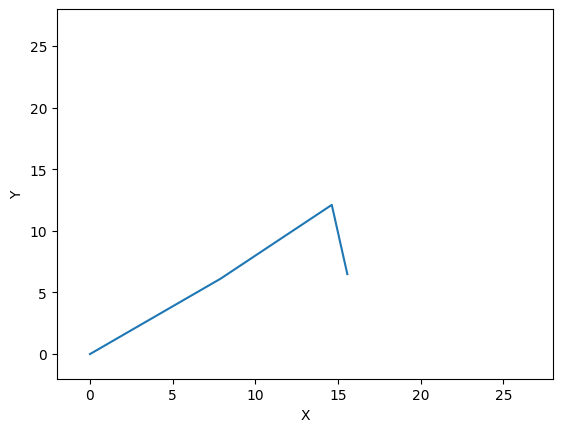

15.566491238089789
6.488743368008879


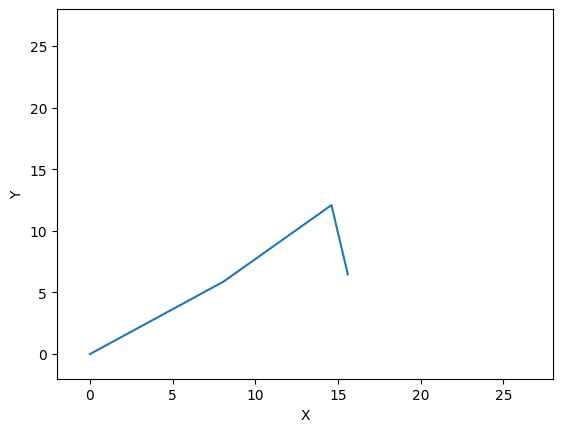

15.595301899983573
6.475576121894772


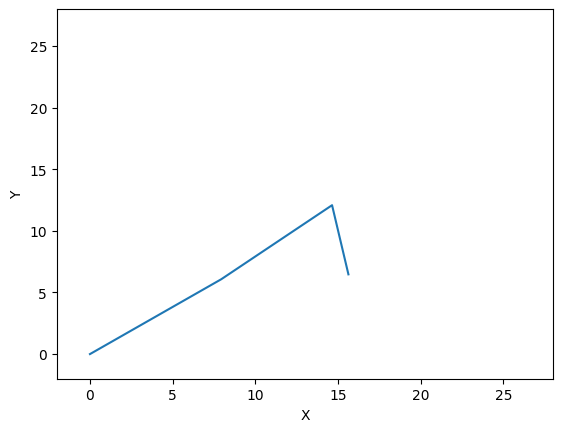

15.63223337373671
6.47180062675783


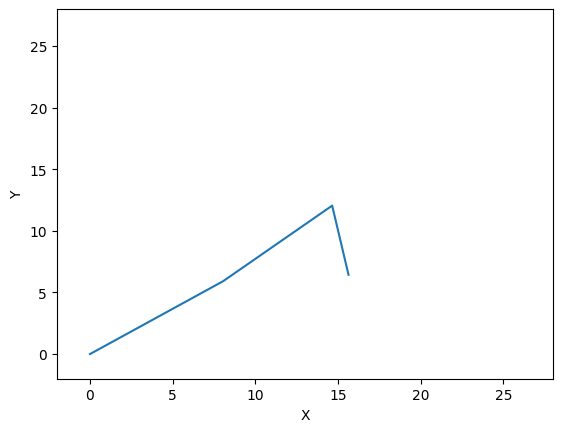

15.638167772622023
6.437411699844759


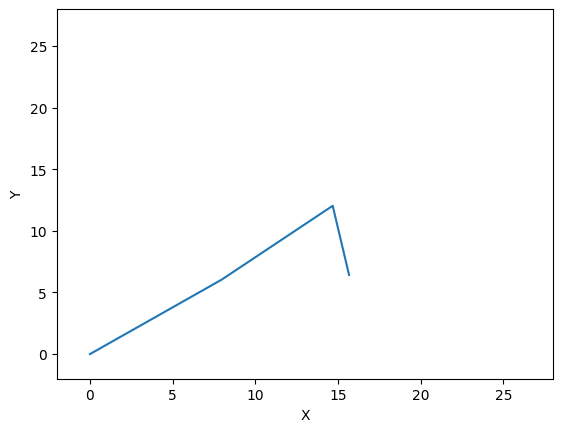

15.670676868244762
6.423946145055533


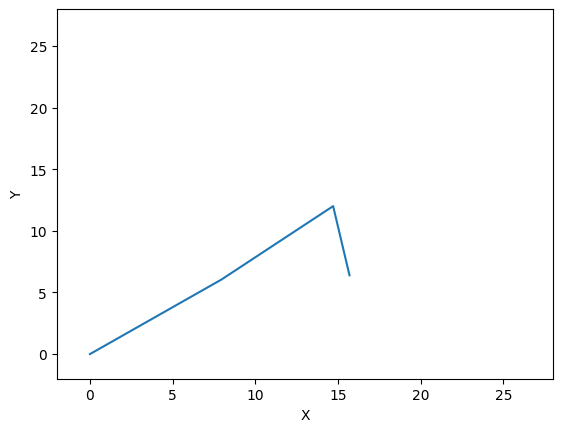

15.697181674089123
6.395733875527558


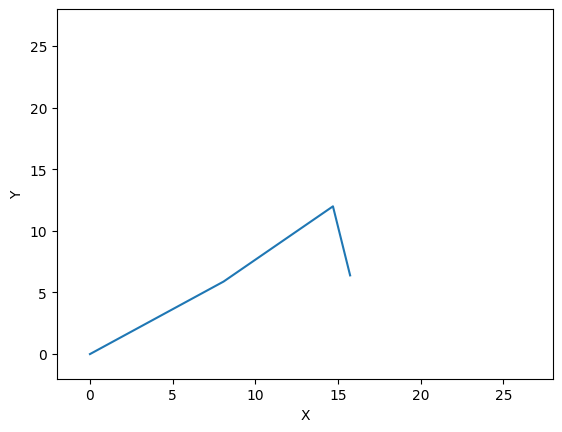

15.735035338790897
6.3876879375135776


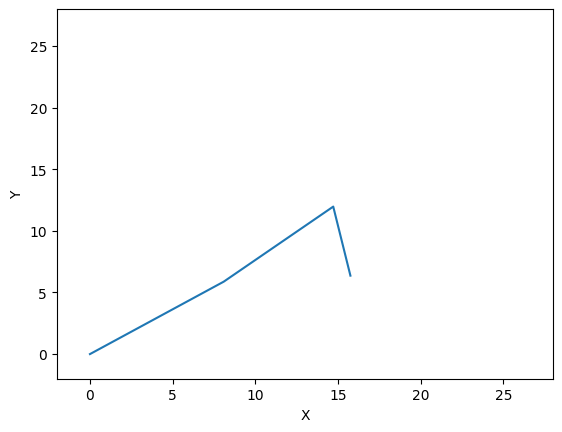

15.752634493759022
6.366509991348795


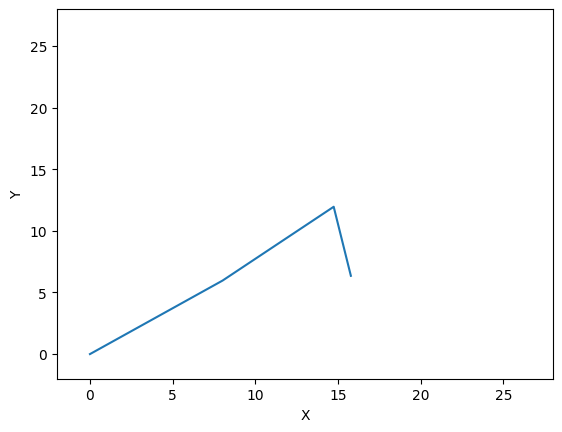

15.780189724946714
6.353163357869199


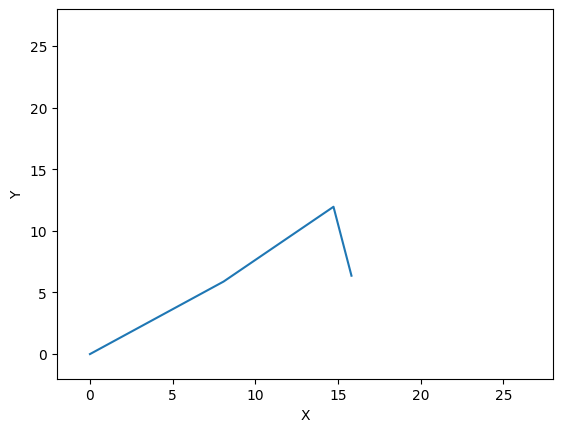

15.816528941041742
6.361395634659581


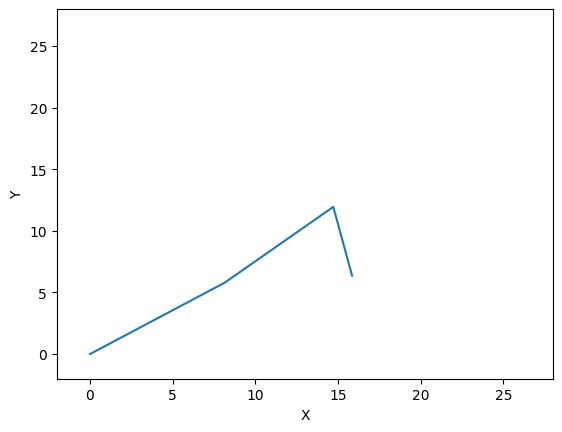

15.854056588638374
6.36293803742989


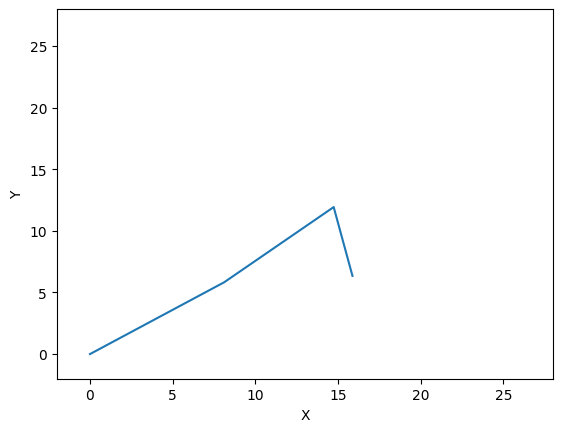

15.877294904529553
6.346415456704824


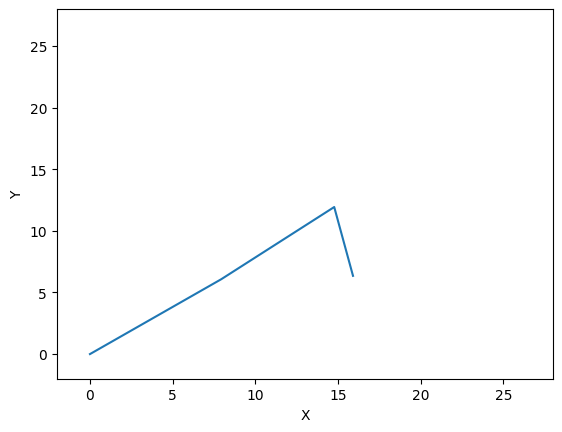

15.909509507962516
6.3507585113392615


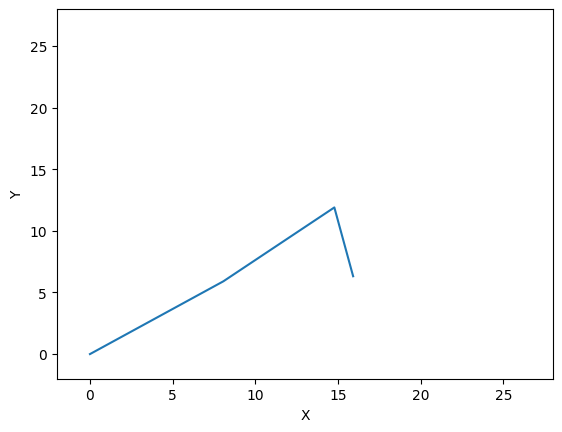

15.917306452293426
6.317243302715839


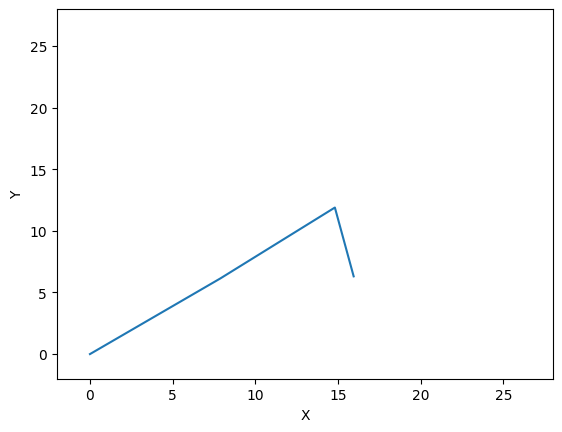

15.949161219975243
6.309464357999919


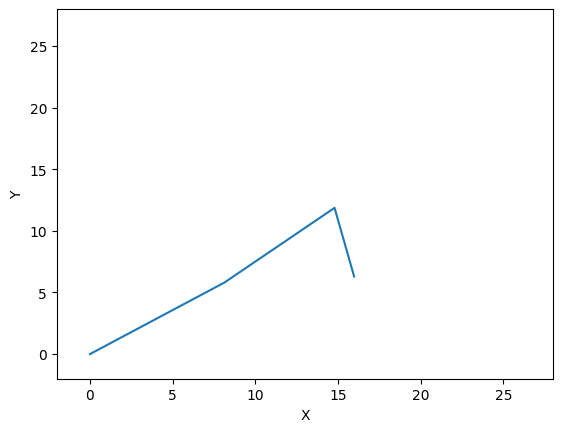

15.978446795026457
6.294577288572706


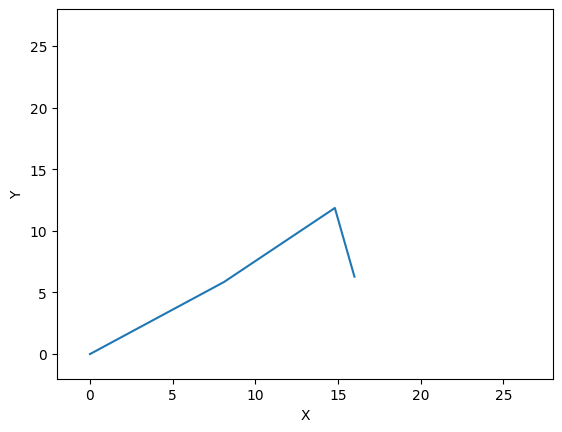

15.996503427144095
6.283030790721495


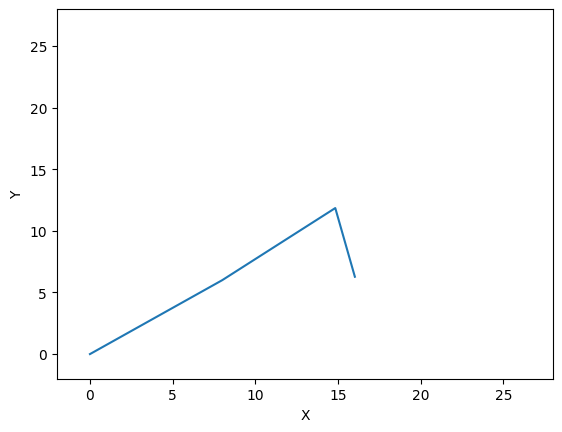

16.022058799183355
6.277410851646378


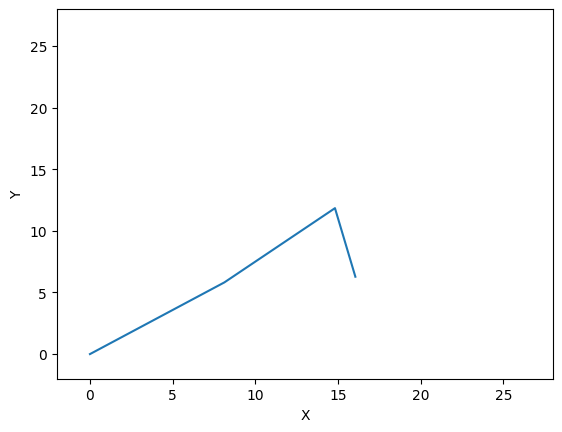

16.052090031362052
6.279383909386641


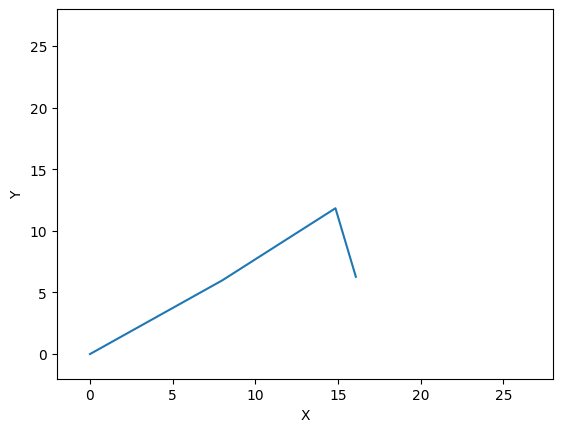

16.082232990152377
6.273104066643861


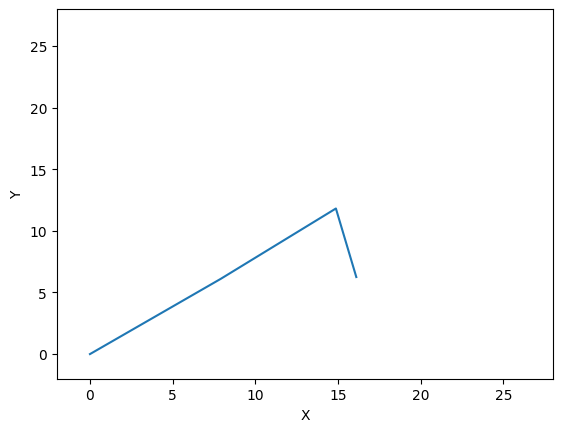

16.108551154365745
6.252973989413755


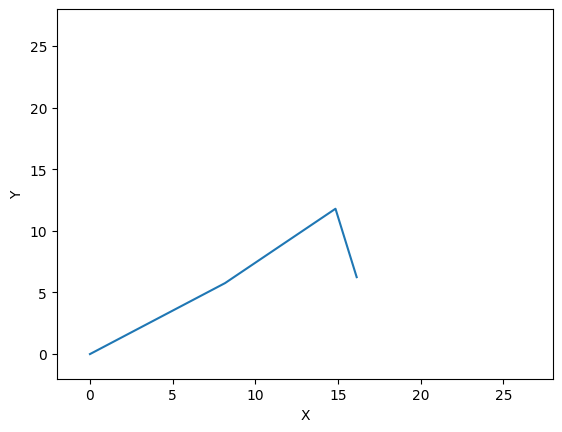

16.13219048571053
6.243252395681944


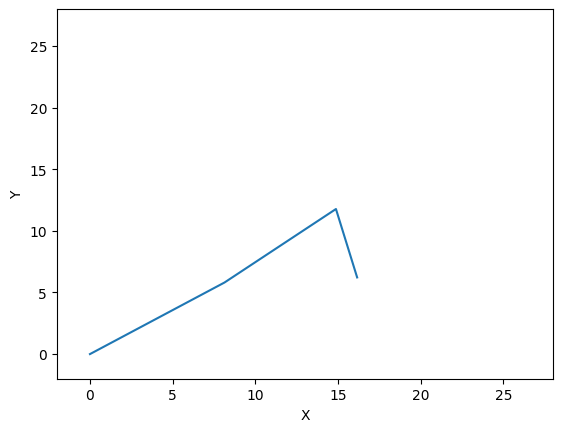

16.15998148934041
6.221908847834429


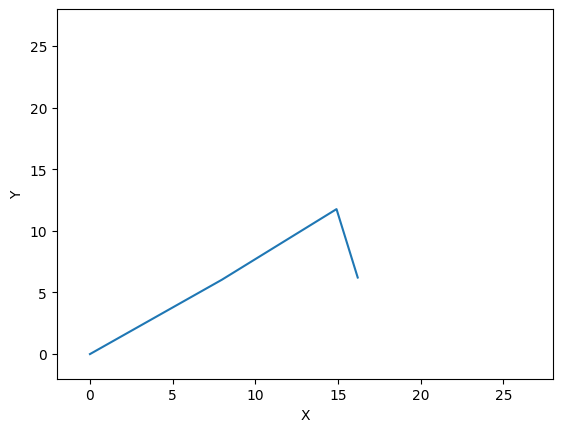

16.194488652182734
6.212862192475321


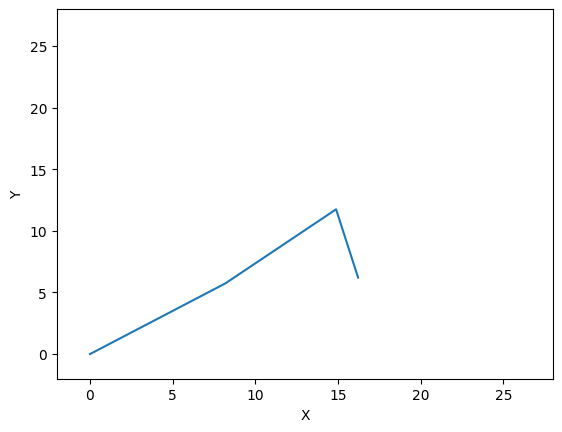

16.216910573794504
6.208768924162594


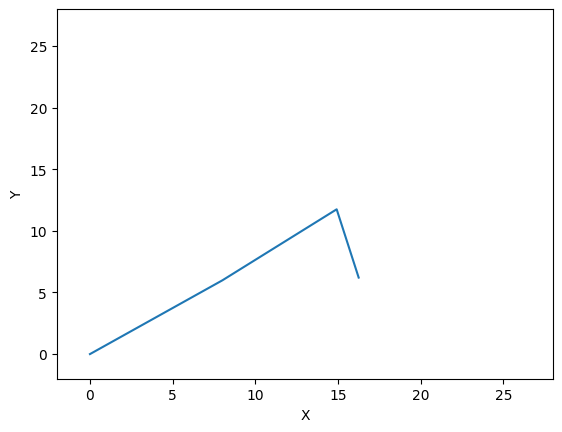

16.251942480160597
6.209078787958765


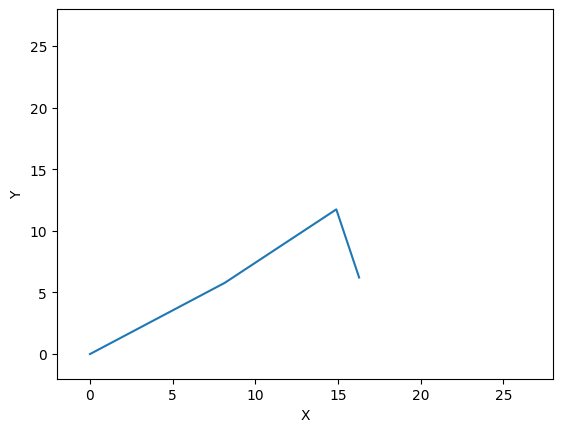

16.27894478962681
6.215198629928056


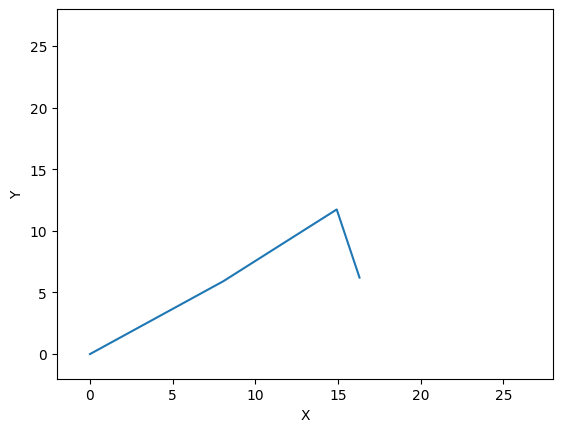

16.303217440122676
6.208456568543356


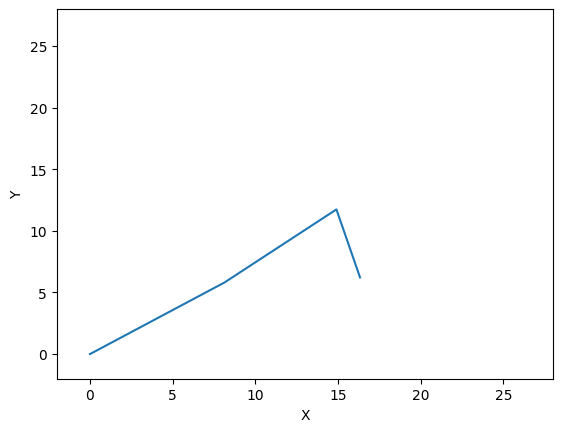

16.3336402099064
6.2251489990628395


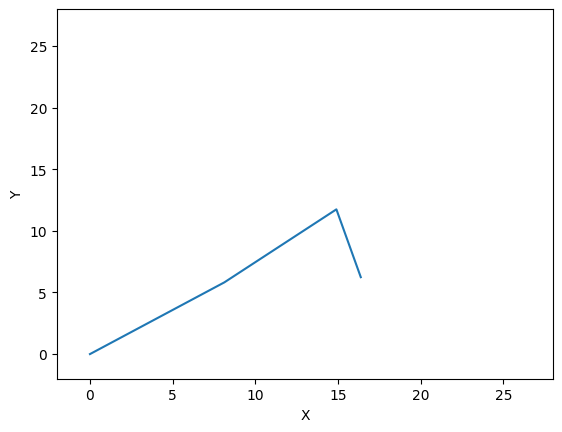

16.37968036381044
6.242052303892142


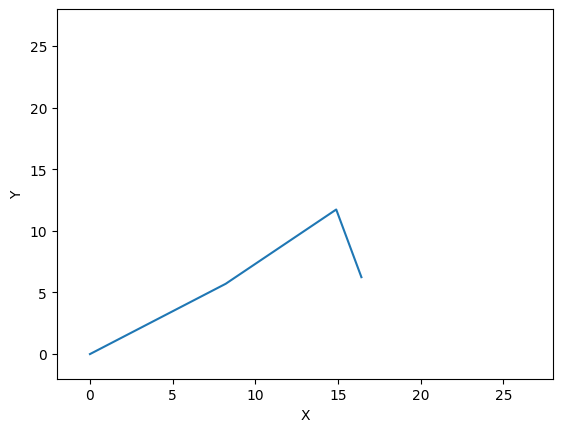

16.41777251811827
6.242567670151461


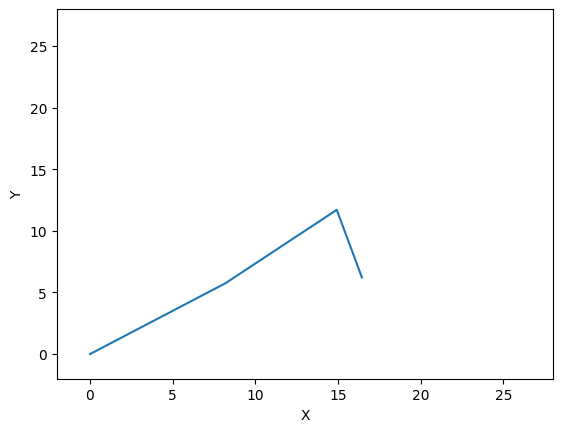

16.449674646414678
6.21475161981377


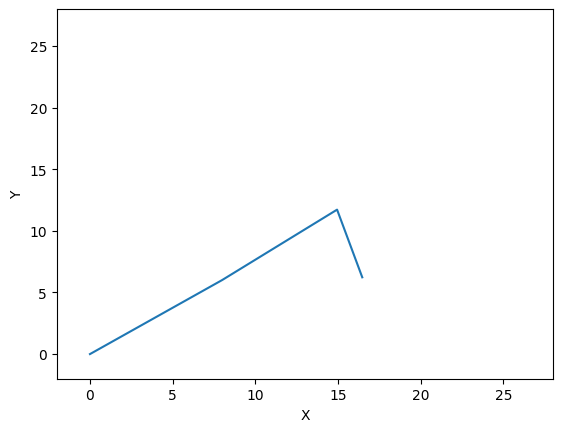

16.469028259028203
6.231352231893668


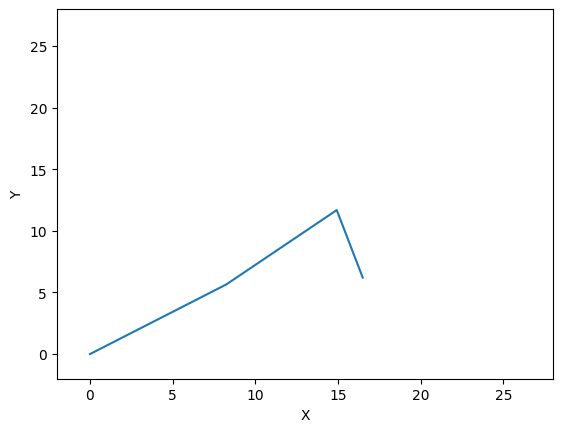

16.496635130245842
6.209110567414727


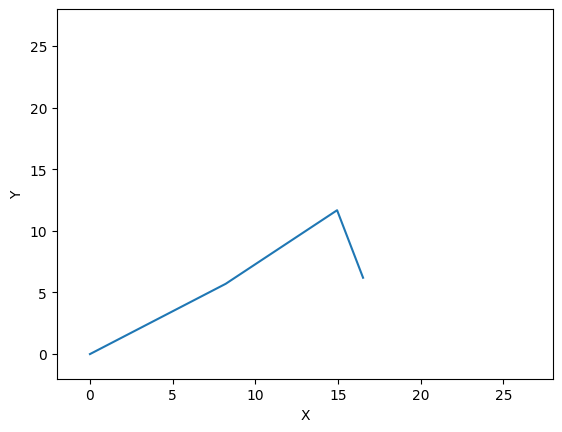

16.51808870687748
6.197209080191649


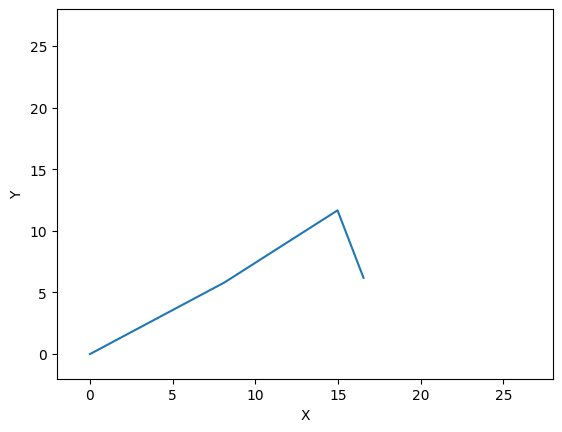

16.54519196463253
6.186672896933768


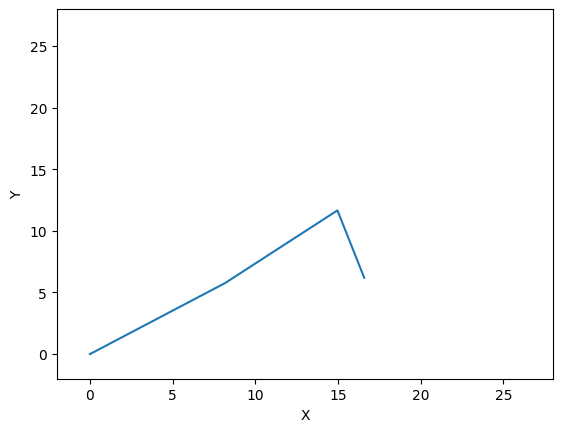

16.586744013146802
6.198868670282183


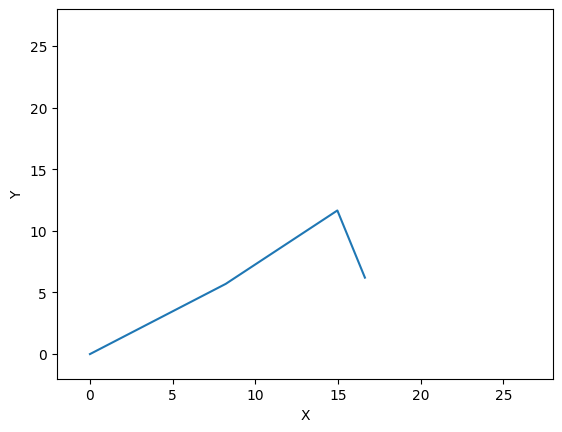

16.6298929849632
6.205876326209384


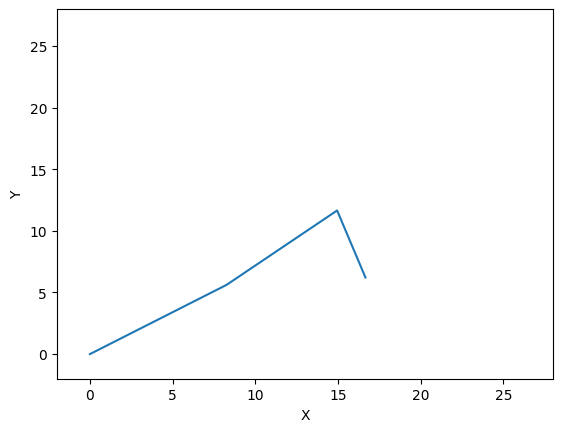

16.66201357324492
6.219786556784064


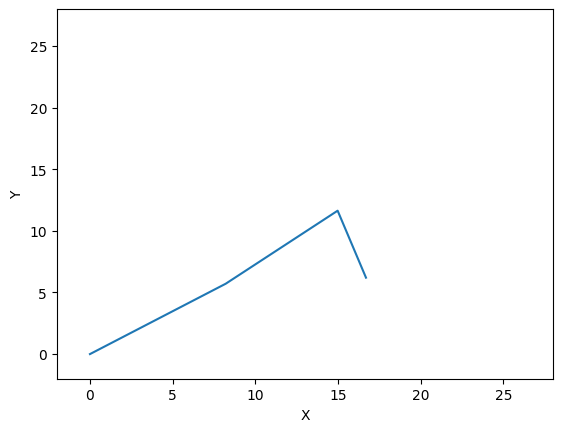

16.694326748911486
6.203129216580805


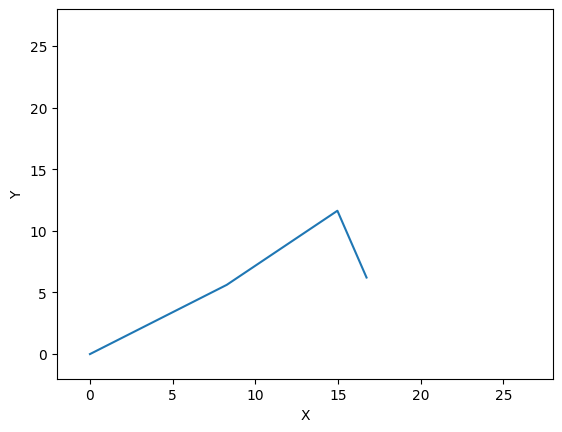

16.727626528276
6.213560125822259


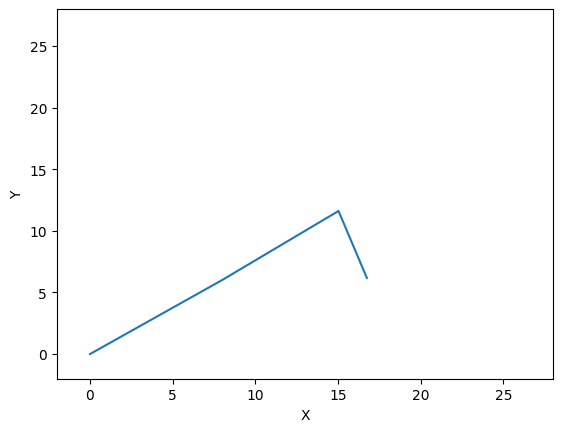

16.74748073437825
6.179532921861235


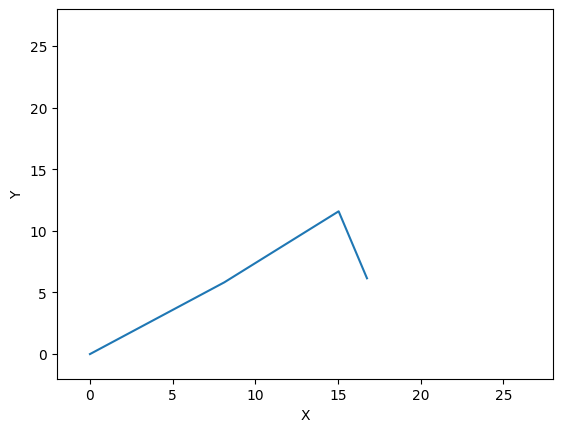

16.754927120291583
6.152227366774689


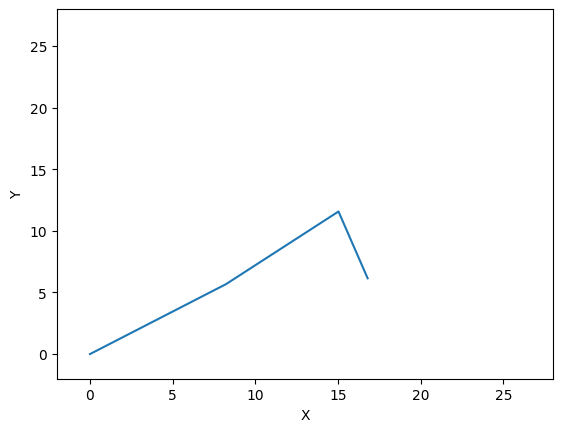

16.793823505677626
6.15208697984545


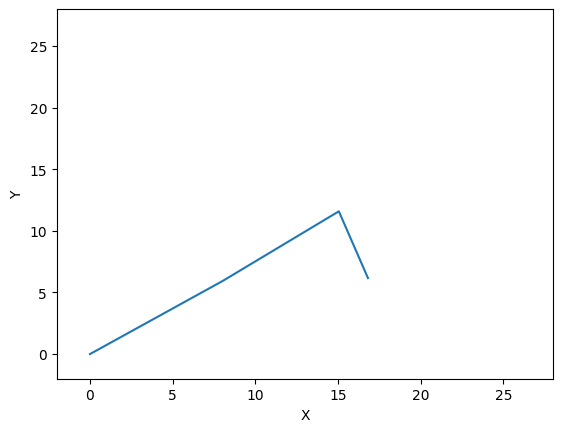

16.814313363720736
6.166093955232727


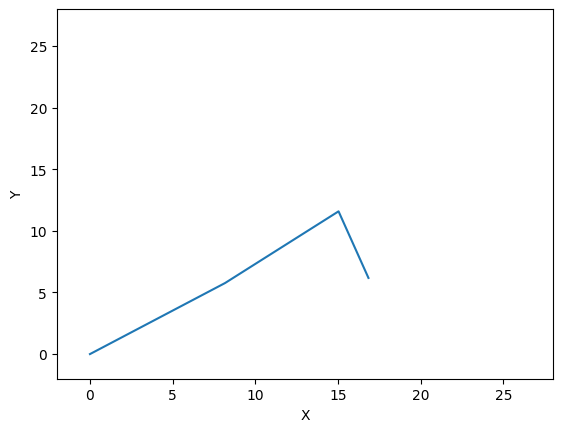

16.843857244936558
6.180580436564578


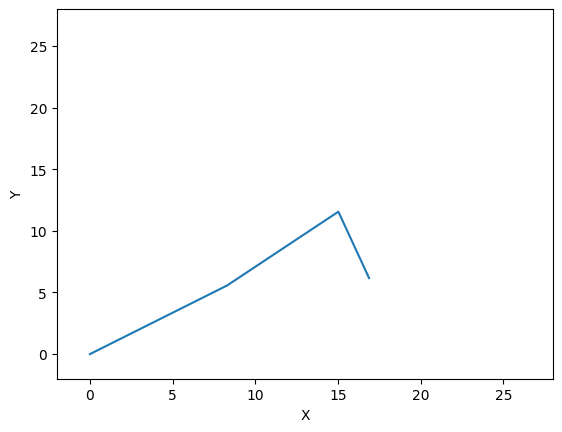

16.880534316214103
6.1688495780405574


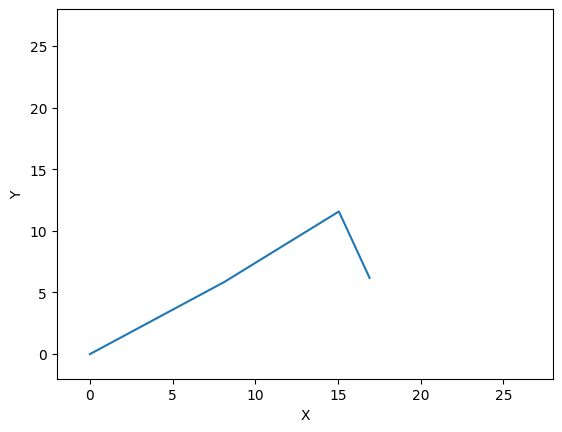

16.910870620213924
6.1843207362158665


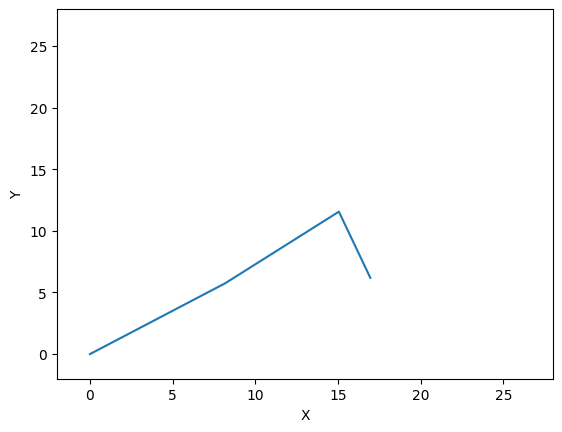

16.95824520513751
6.186251992316996


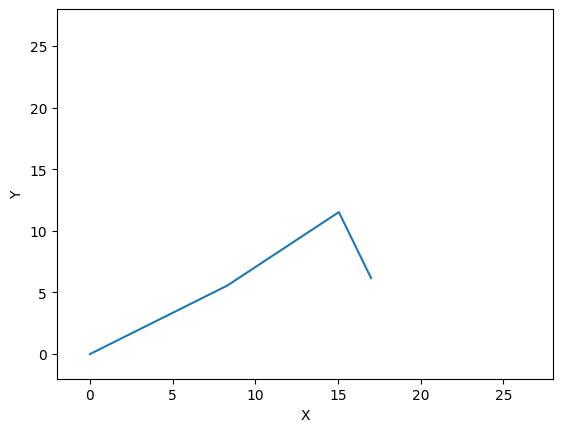

17.002047223684933
6.168384445794144


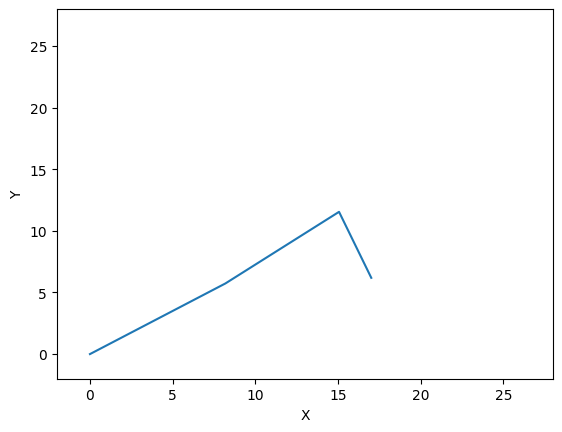

17.01418055811194
6.189541556765045


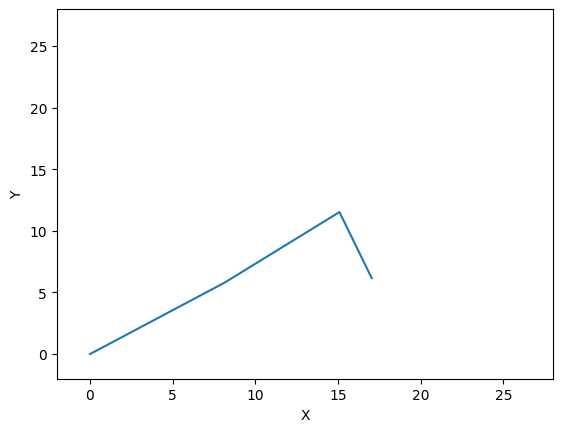

17.03889363162266
6.170278813866461


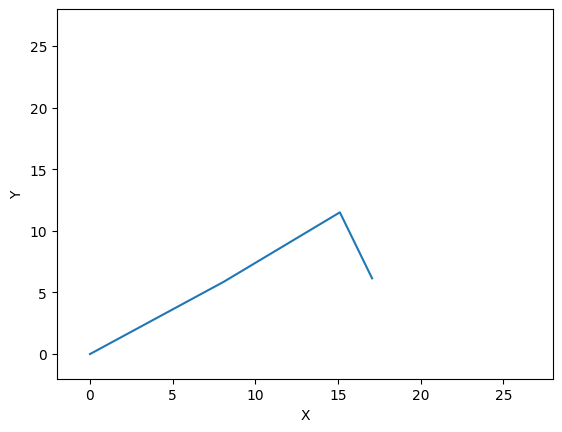

17.063841520562097
6.147824603451964


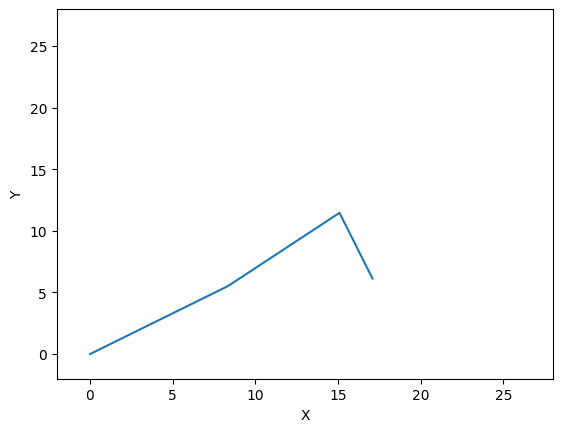

17.089368085703942
6.12754052065812


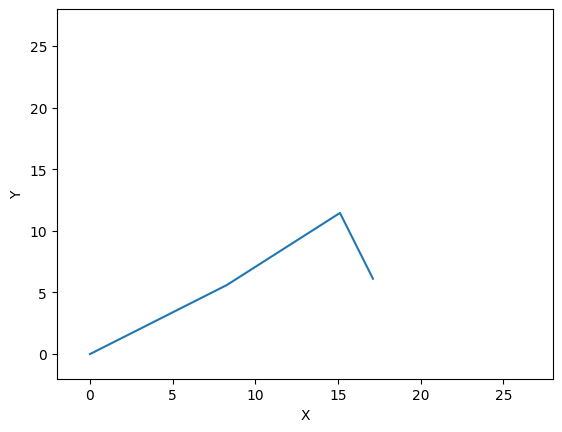

17.11648650787196
6.1170249066734375


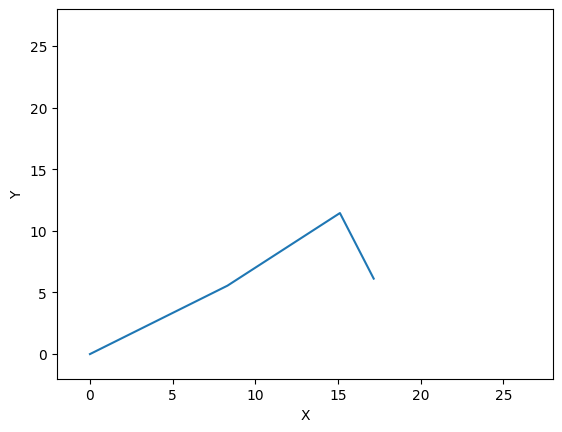

17.160695018423873
6.125740993195474


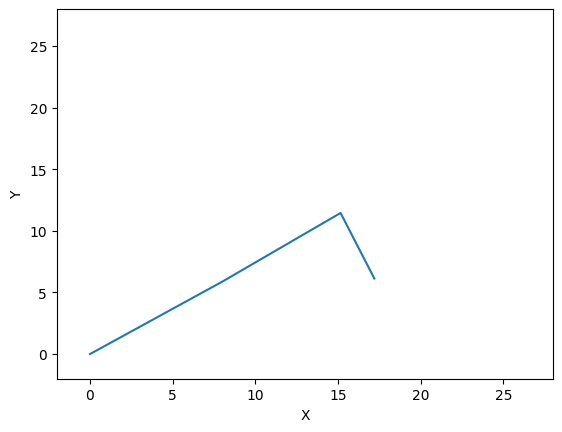

17.19967621503379
6.132591119669601


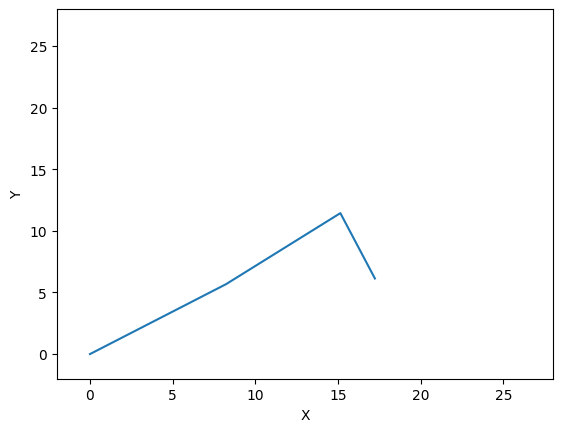

17.233418223651608
6.13757319948093


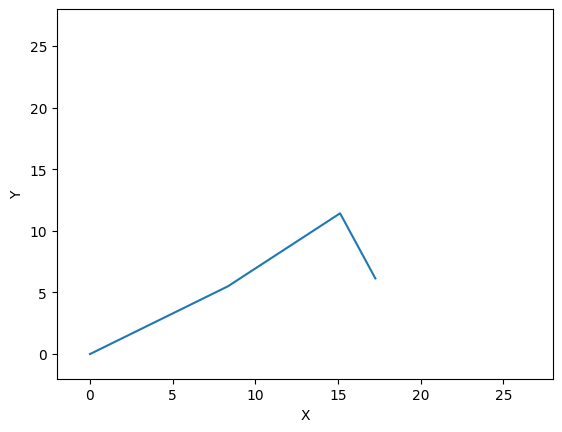

17.261910766134623
6.140685715039699


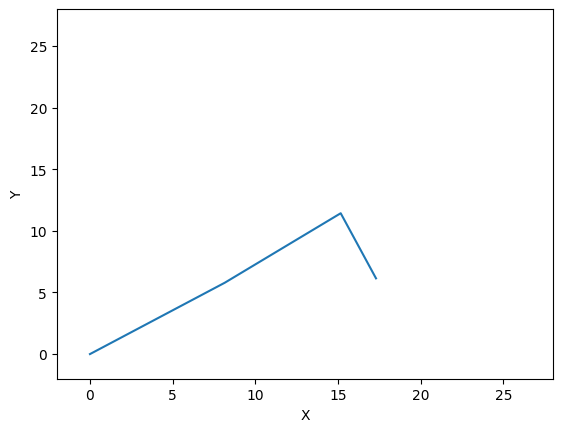

17.30057249043059
6.147113710549264


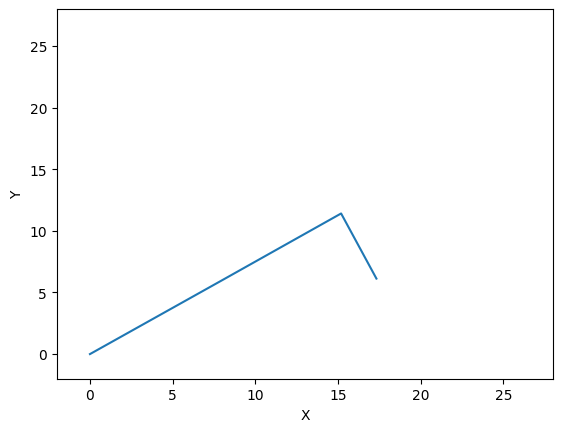

17.325383818593657
6.128191588832642


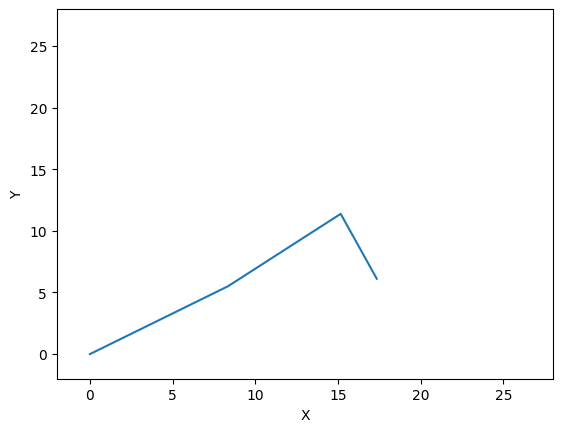

17.345595774950727
6.116443387419138


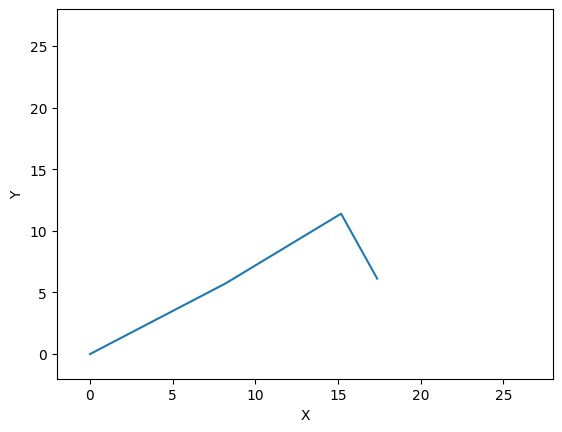

17.370245257203898
6.128988402036227


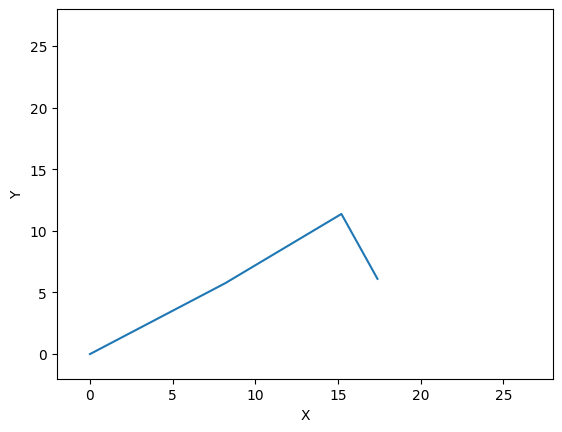

17.390186166589775
6.1070508689386385


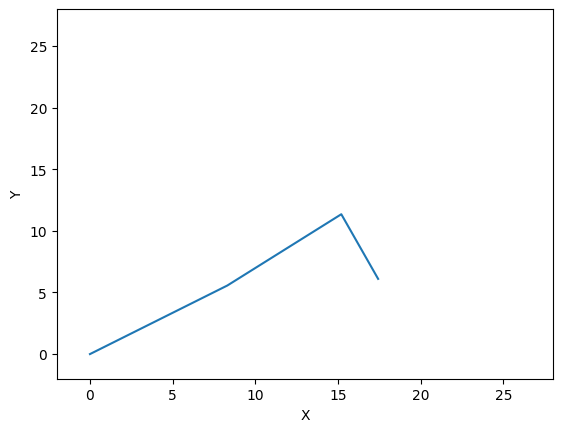

17.428981741523913
6.104571200557594


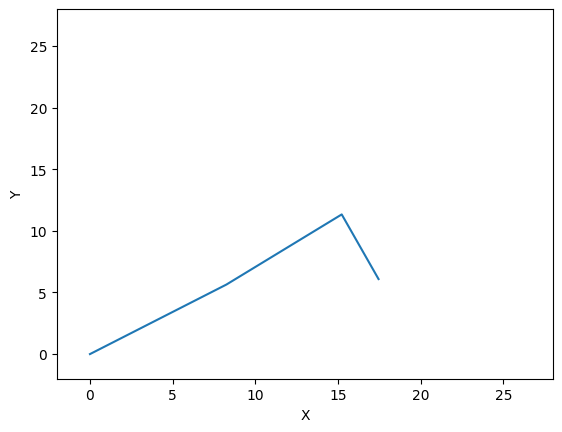

17.45405113533417
6.088798372880236


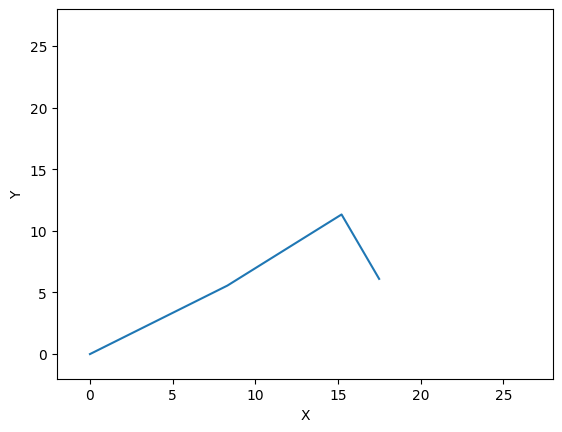

17.490098724818985
6.104680217439724


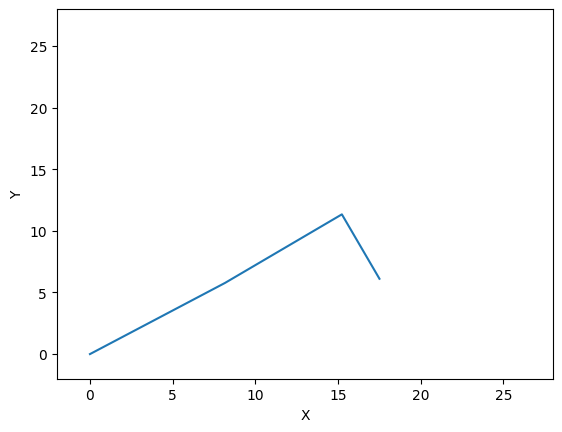

17.50907977998765
6.113808986432418


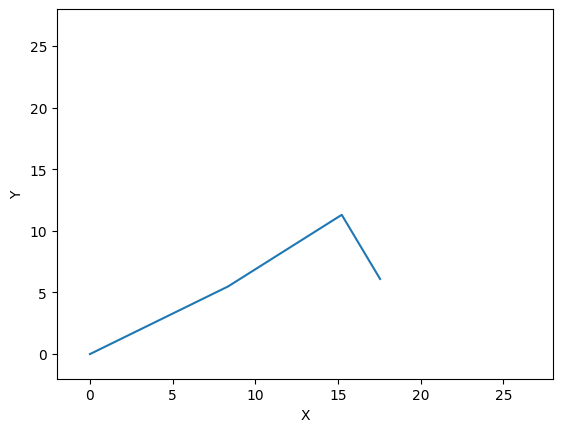

17.546693539107487
6.097207773256252


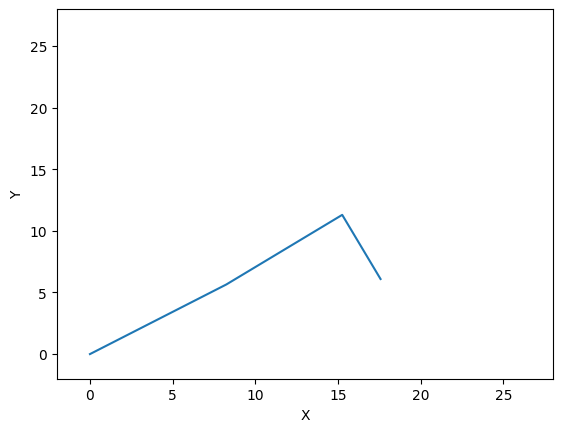

17.575107193747513
6.092734505258988


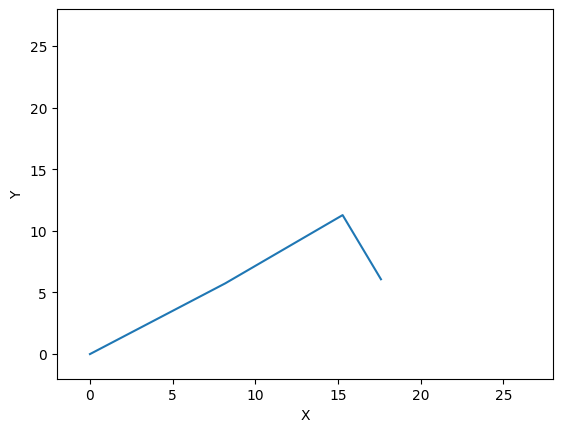

17.599994462707496
6.072934684823891


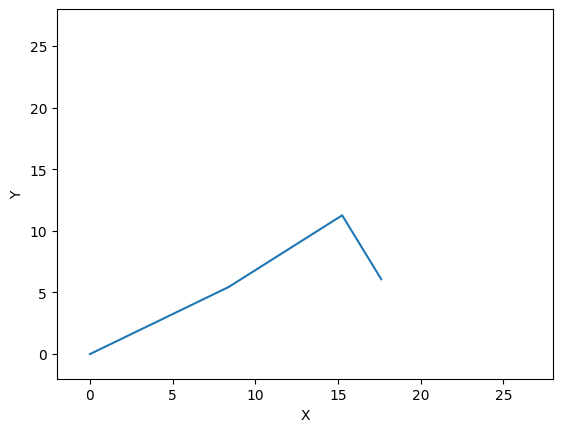

17.61759853091807
6.076424898602782


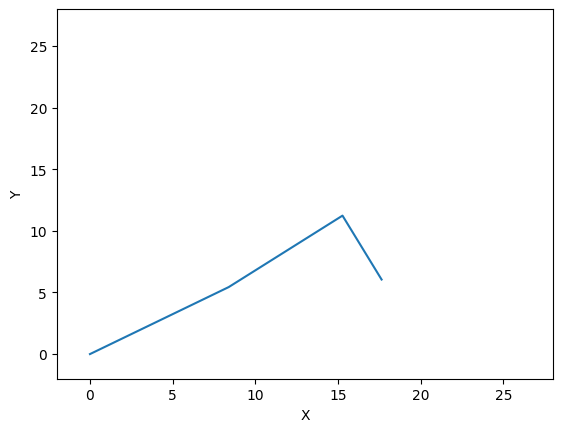

17.637636899296364
6.051525184466533


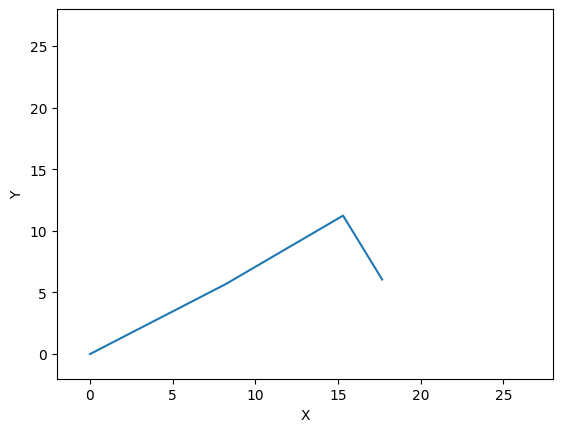

17.672557842183963
6.052687043545351


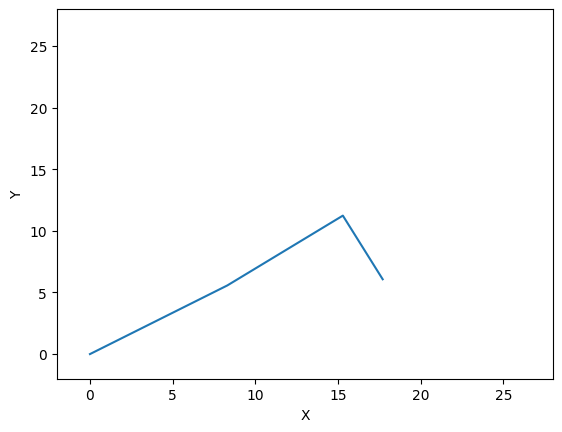

17.704493353248935
6.072695740919507


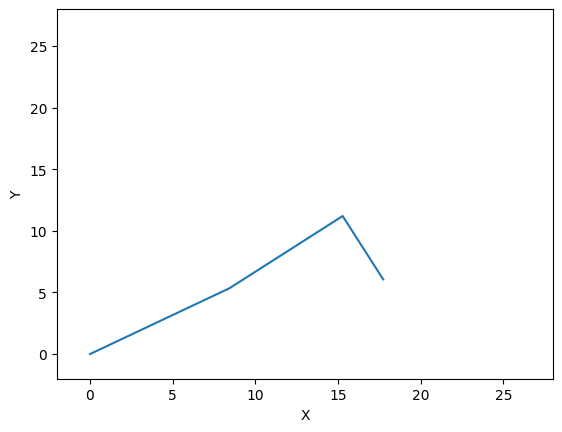

17.737495565022428
6.06085977730571


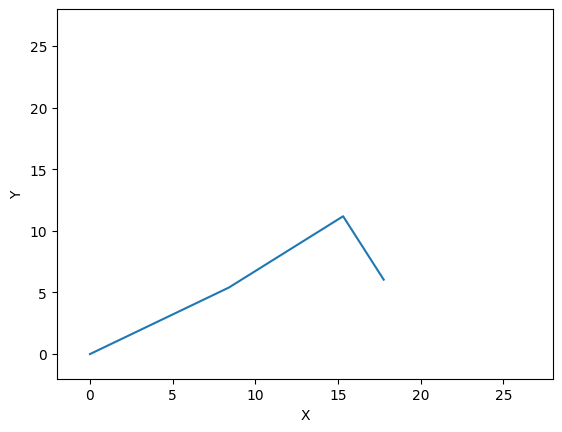

17.76505842796012
6.041993886283722


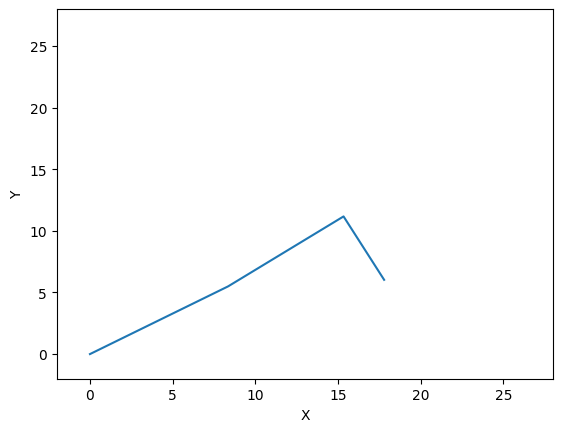

17.791519900533928
6.028622497704726


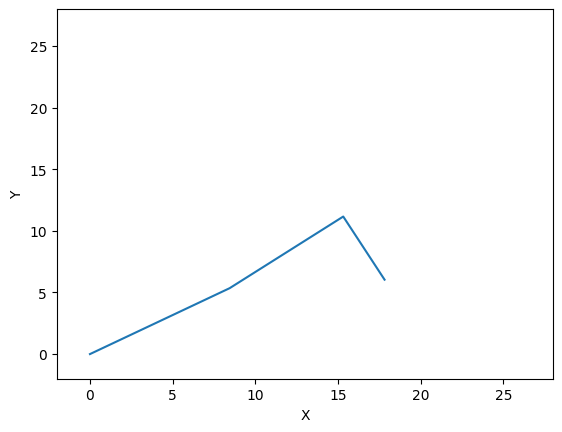

17.817500545161188
6.040549043923211


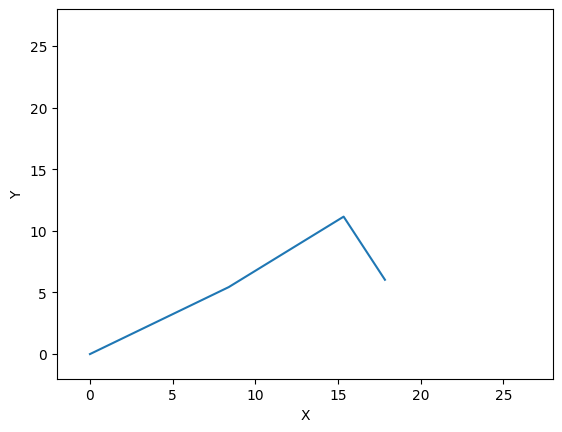

17.84096200799347
6.03270152896889


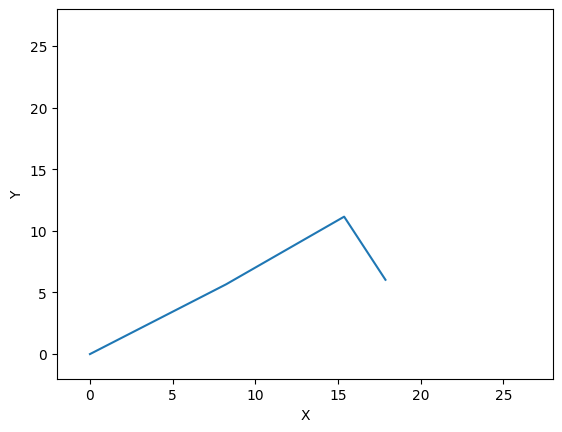

17.872110605999353
6.030577551399327


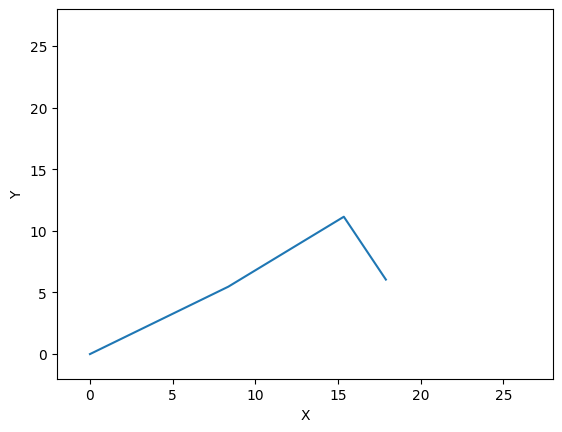

17.8975158133304
6.04739037842622


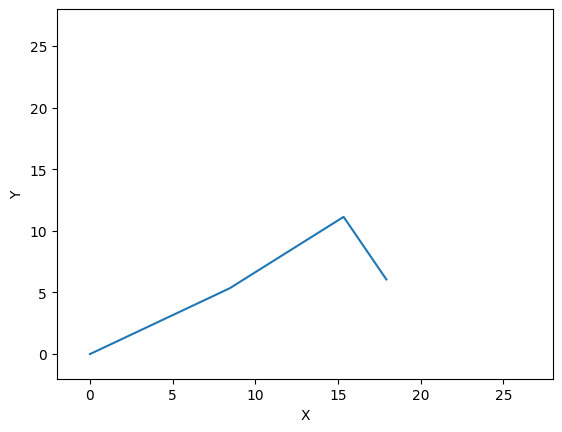

17.927778376979788
6.058037020458333


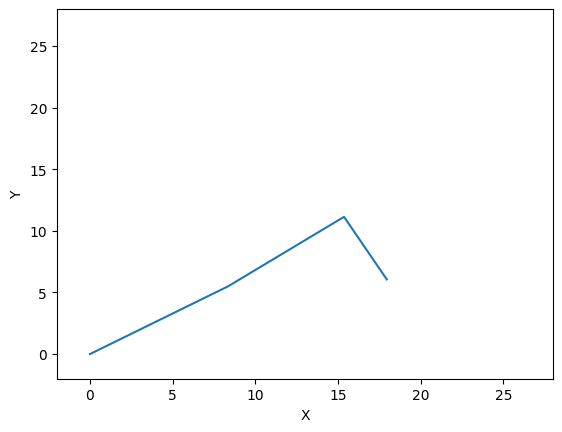

17.953353787919824
6.060617557481506


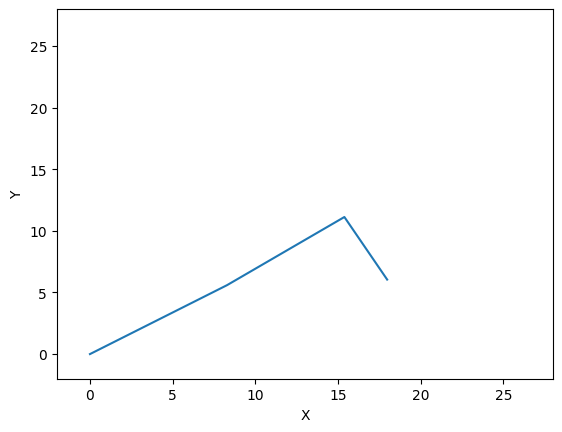

17.97587155648594
6.0471658715513374


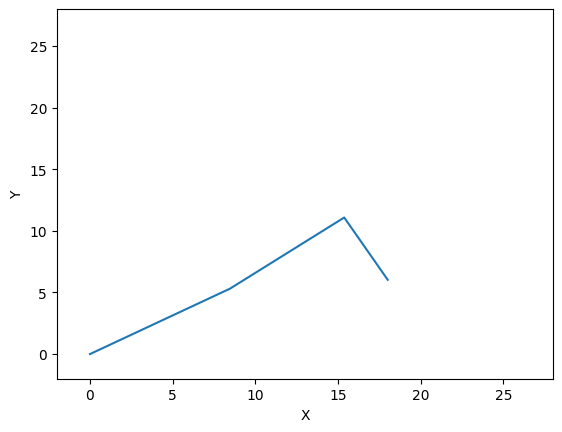

18.0096427452922
6.028603096224558


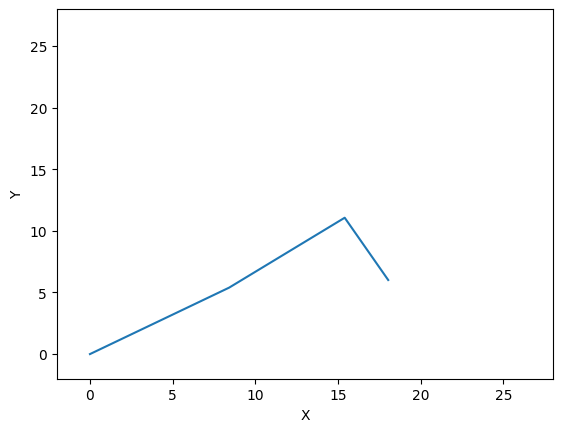

18.039017953827354
6.011722757873494


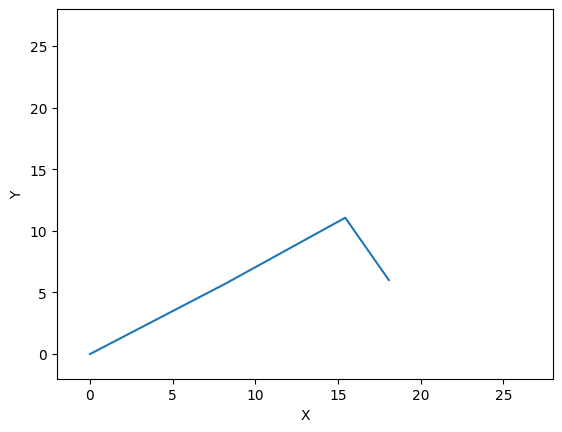

18.072509233721824
6.013111557557063


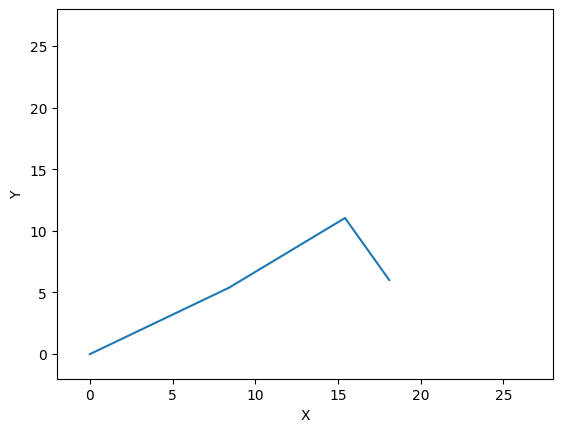

18.100796083020477
6.0130906073754025


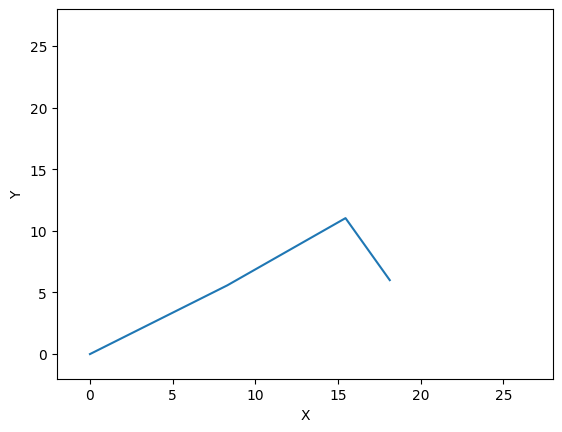

18.132315275207706
6.002364177508755


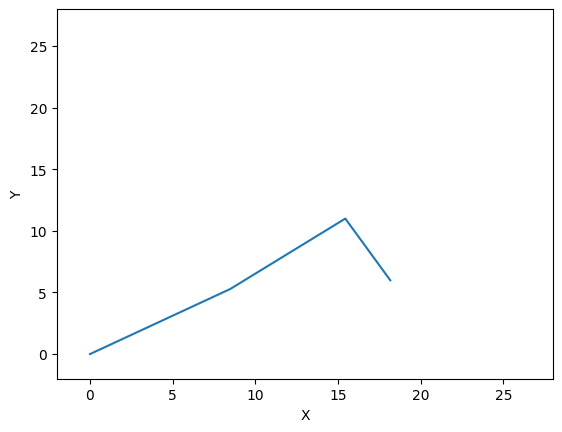

18.163554922182634
5.988778553529728


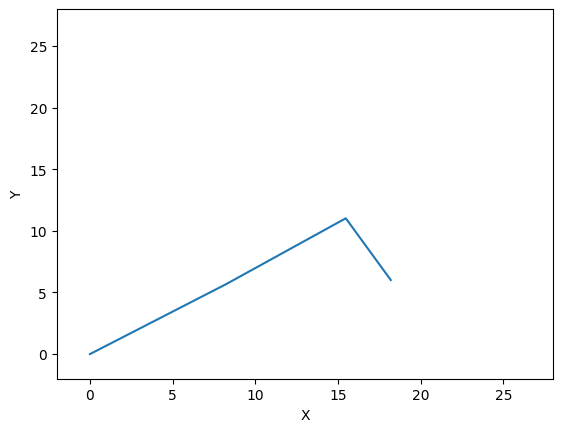

18.192971072205243
6.0128059078033145


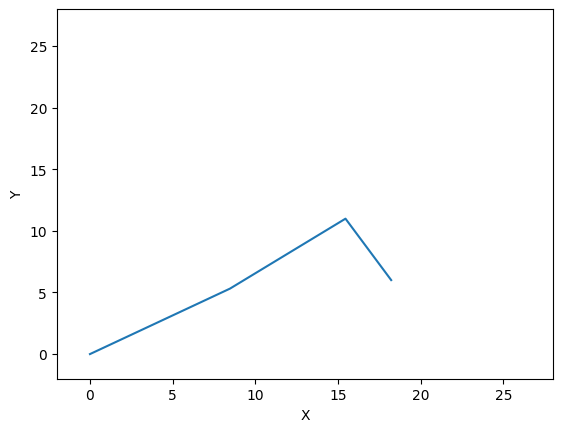

18.218261447066325
6.006070411689629


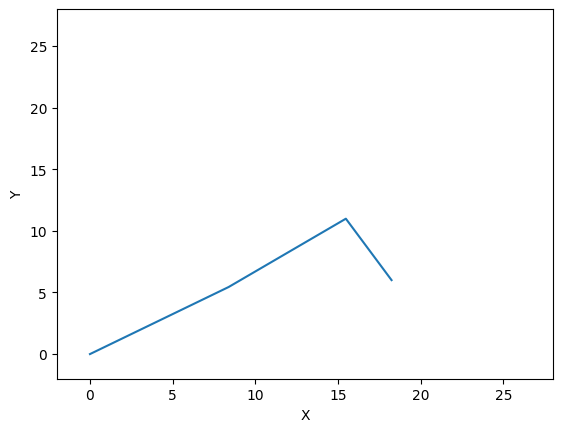

18.240587712795534
6.003749775912831


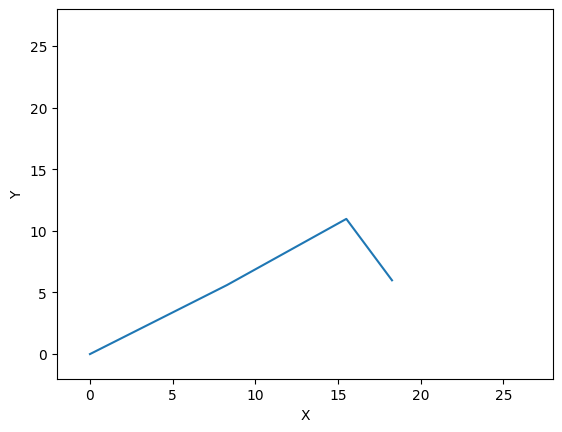

18.268673166482284
5.987532070550804


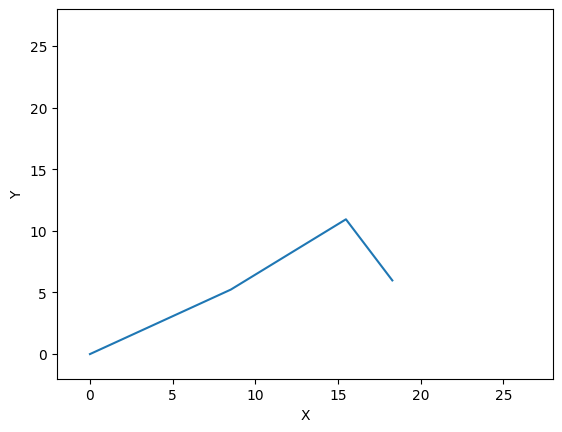

18.28791921532634
5.979160953366989


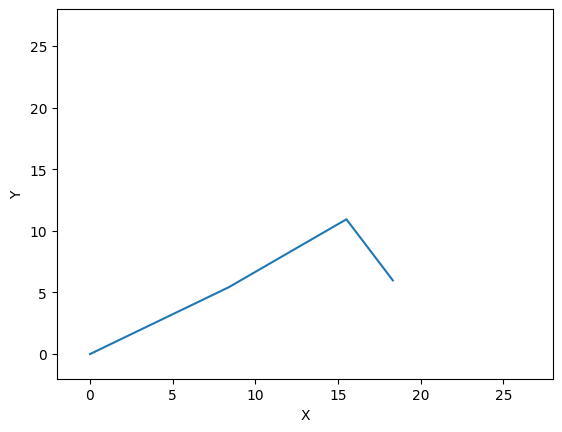

18.318685525869597
5.980868805056116


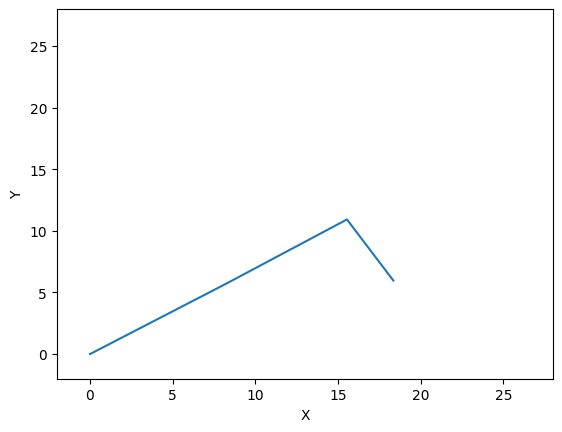

18.35005052465459
5.965622396876682


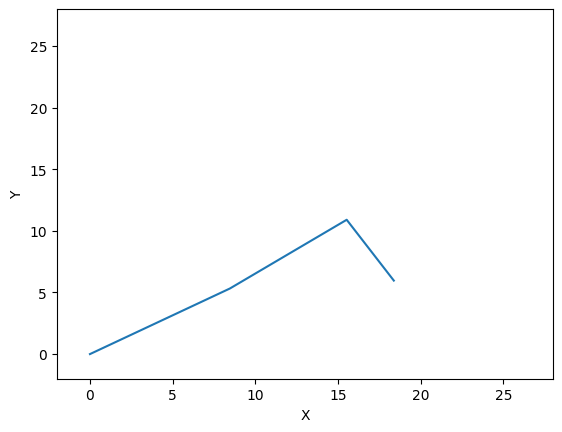

18.37758363899662
5.966147523126727


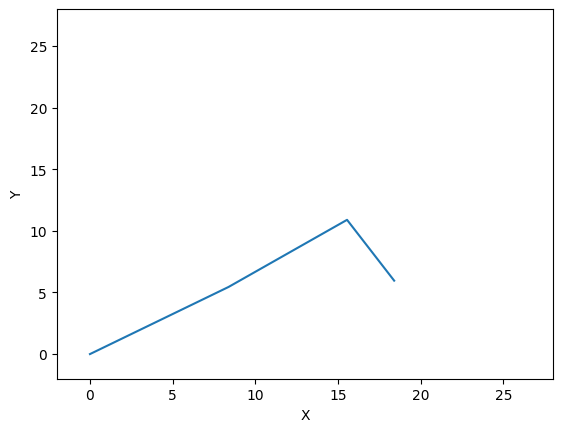

18.39914400879553
5.960277320105516


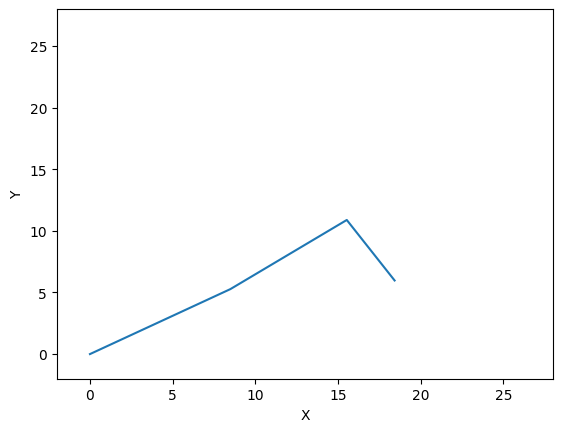

18.42575861139751
5.974348214896371


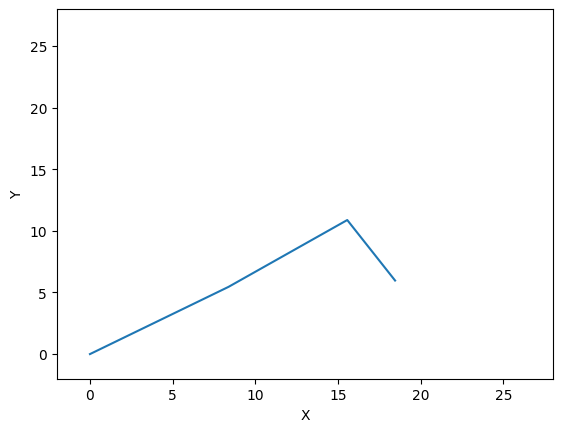

18.454610586302017
5.969725822967348


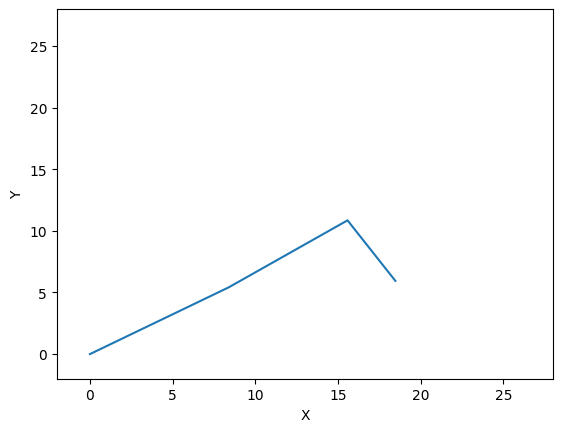

18.47104677859852
5.943346413152878


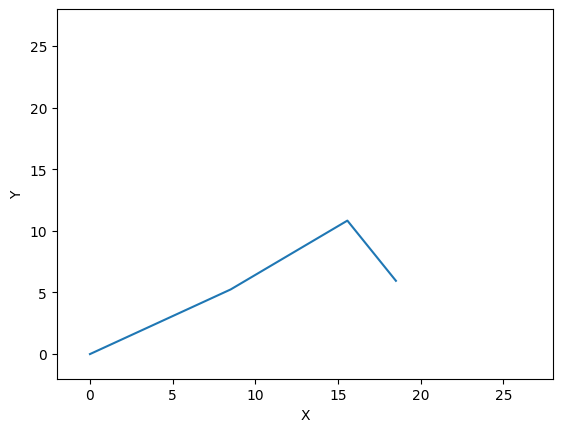

18.504928667701787
5.947834990379489


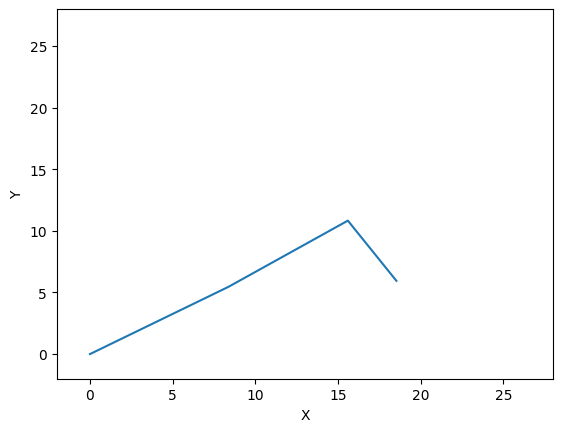

18.534573758348092
5.9460133336149905


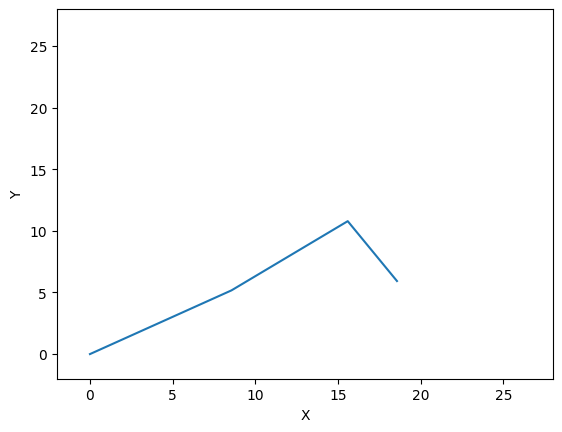

18.568644061365283
5.9291113432072295


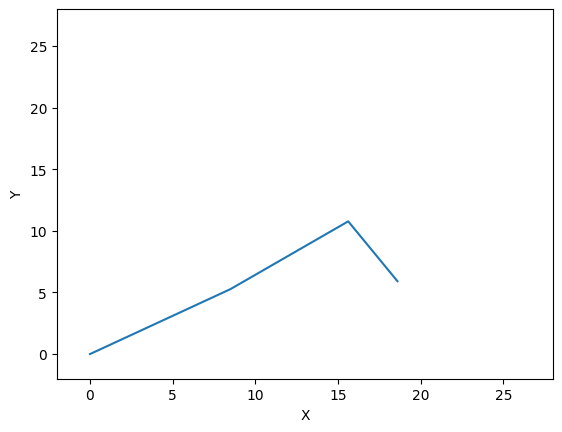

18.59856133288212
5.913415676997315


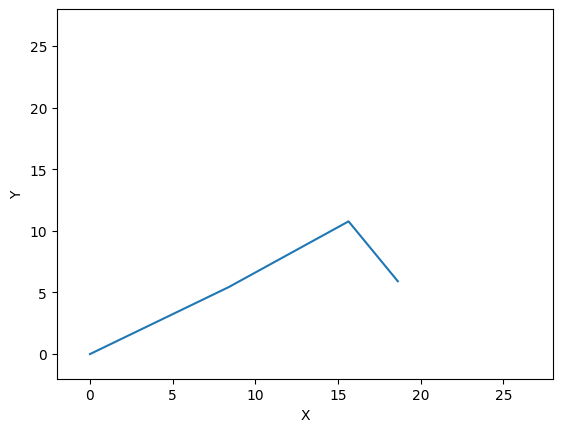

18.619356497235923
5.911926711112093


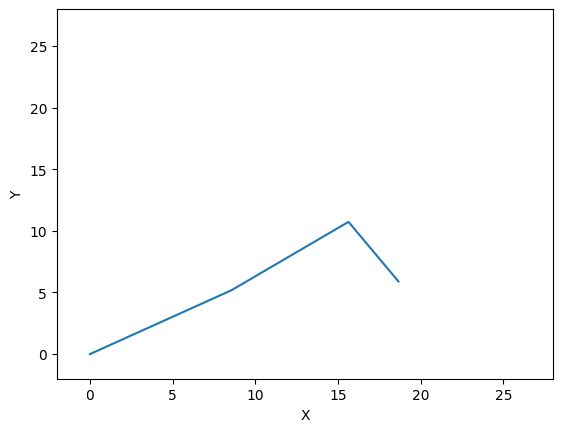

18.657706649304814
5.898033792727541


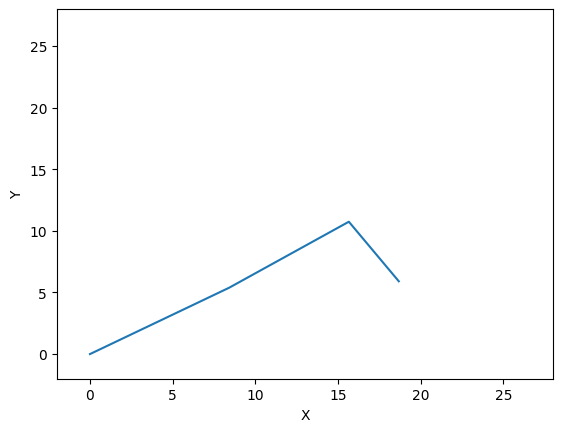

18.678677214960985
5.908989435249594


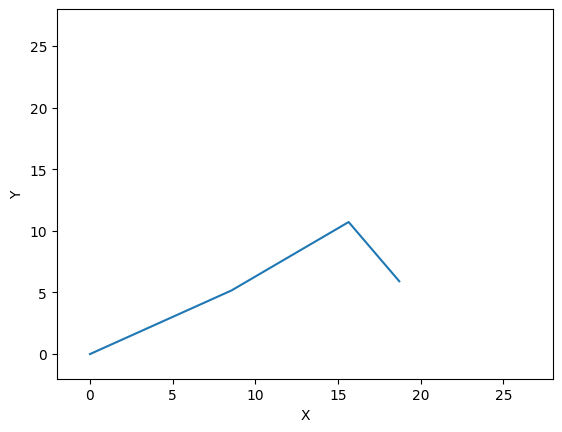

18.707994221249706
5.911132221126541


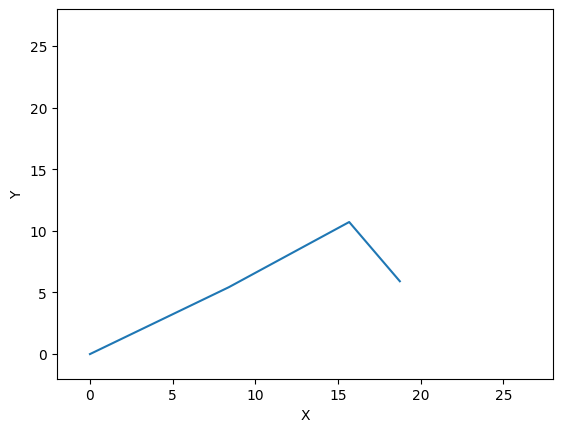

18.741550996204822
5.911966721616889


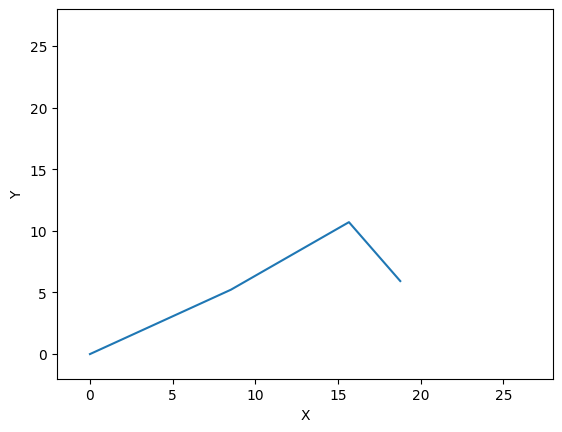

18.76797025890447
5.927634609751341


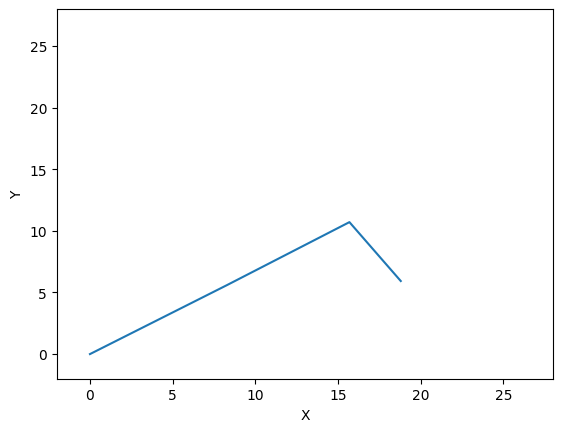

18.797623853886215
5.930095583517286


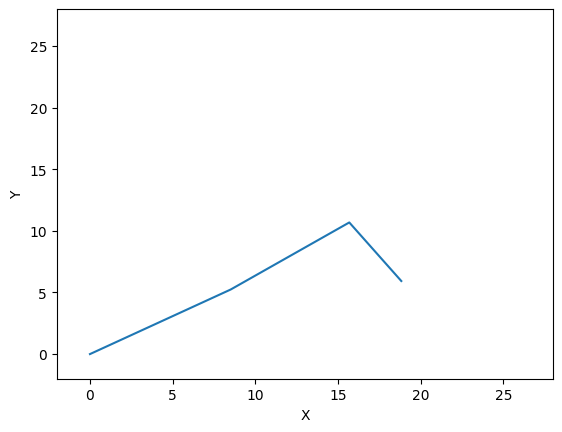

18.830436528607528
5.930976329151668


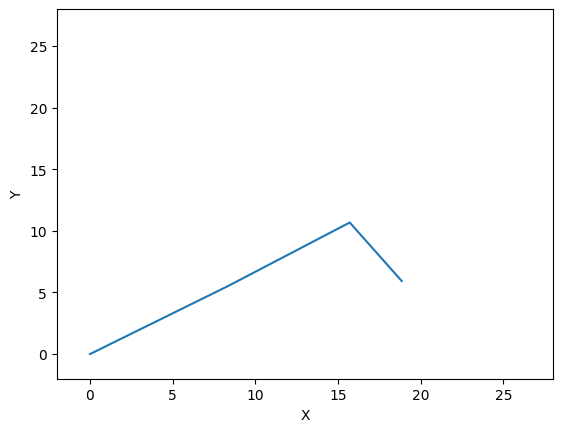

18.85807795242104
5.927048253735898


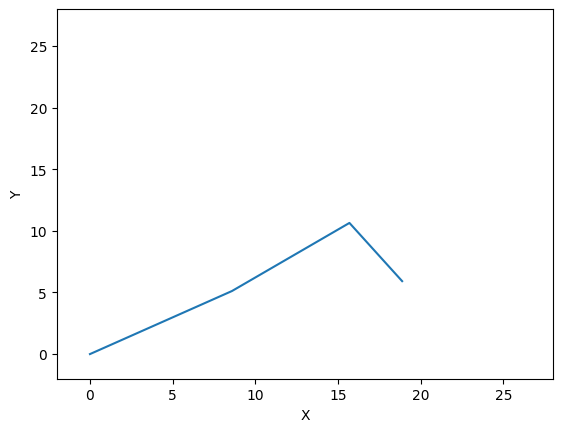

18.88121327318298
5.920060249782134


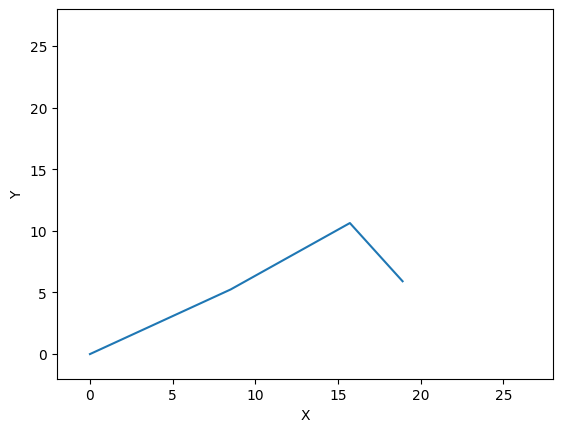

18.908287316425152
5.910941453723867


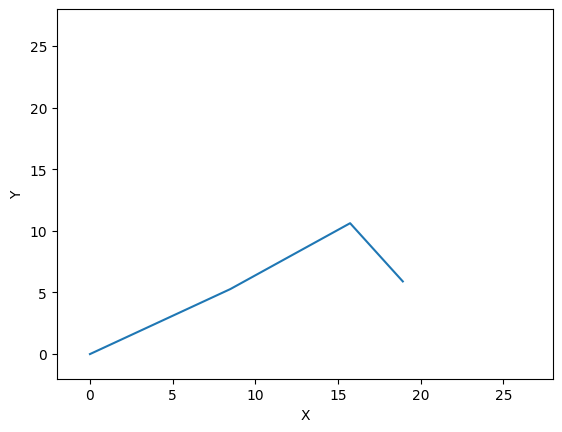

18.921715500055047
5.898007606216476


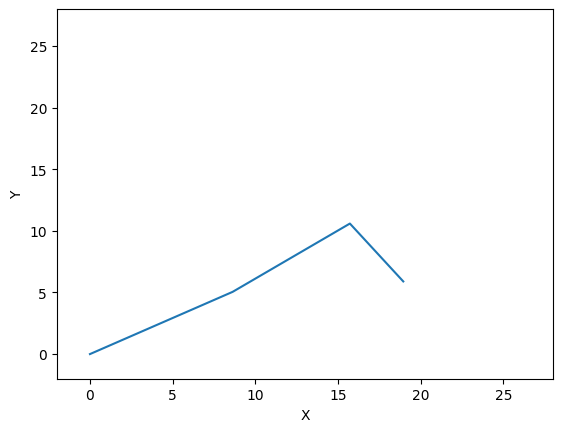

18.949309815734303
5.897116216896449


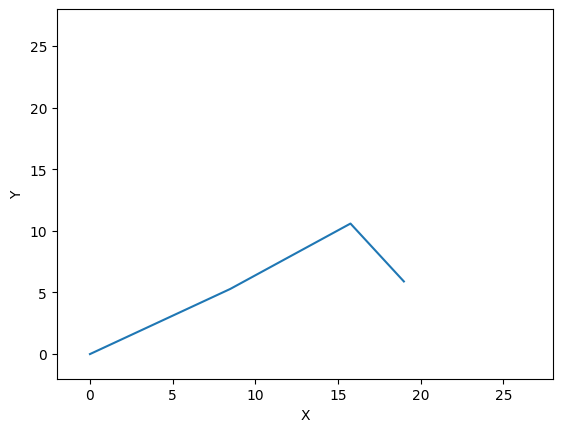

18.98533233069455
5.896839202440262


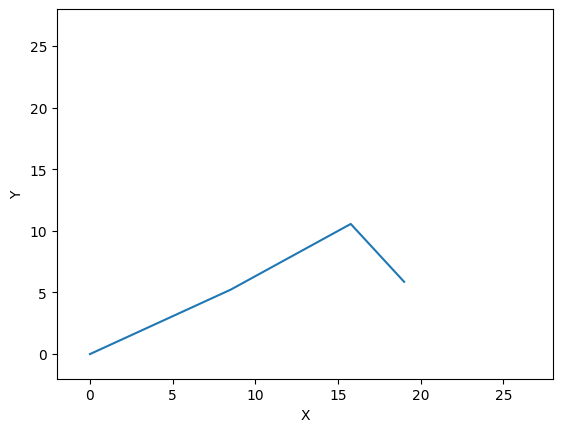

19.00171640136344
5.866249373285476


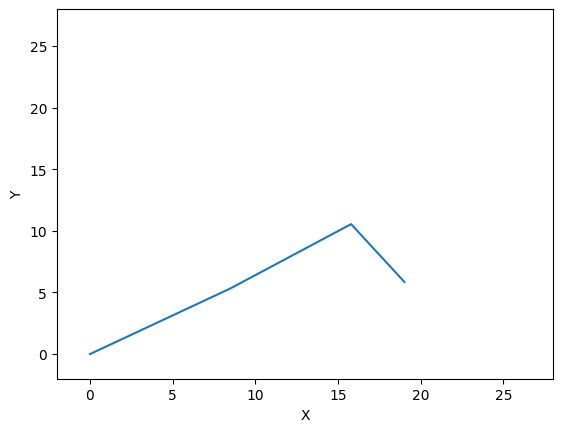

19.021070587522743
5.850734683026363


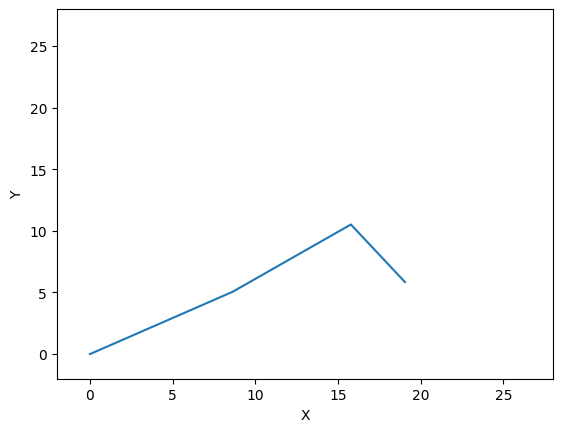

19.049969421733838
5.848983579073231


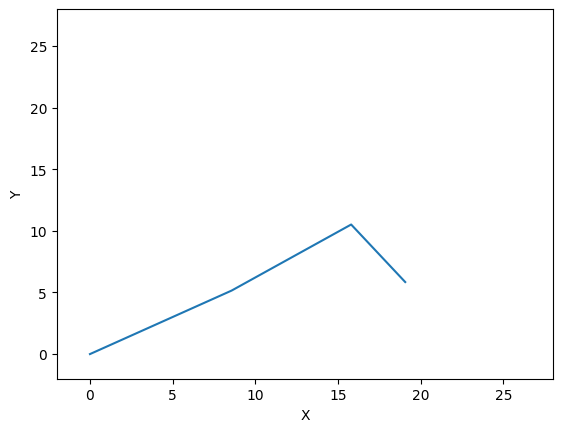

19.06728069241213
5.847062068165102


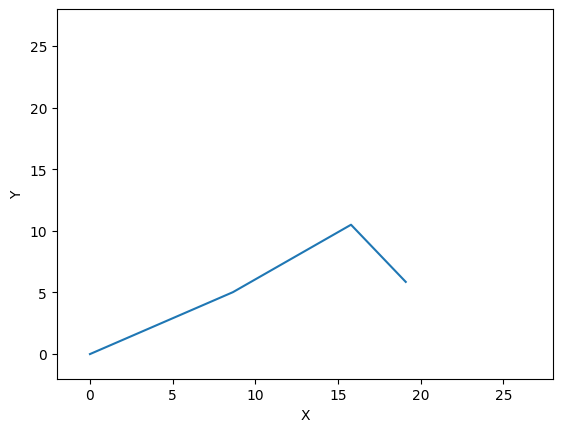

19.099336205706184
5.859115905351441


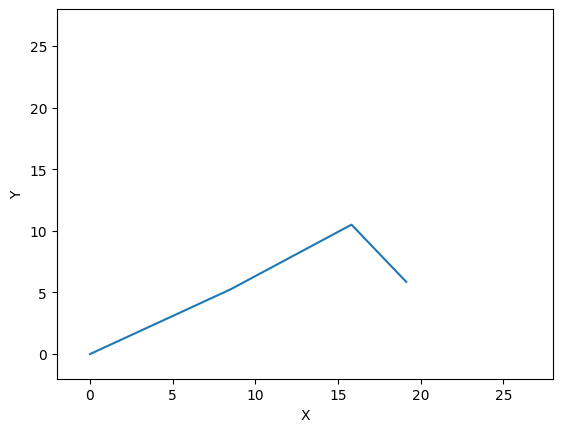

19.128659259090103
5.863922101070814


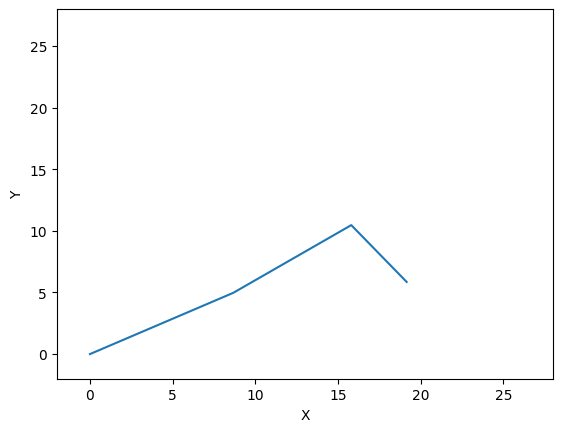

19.15504119925751
5.855926085028765


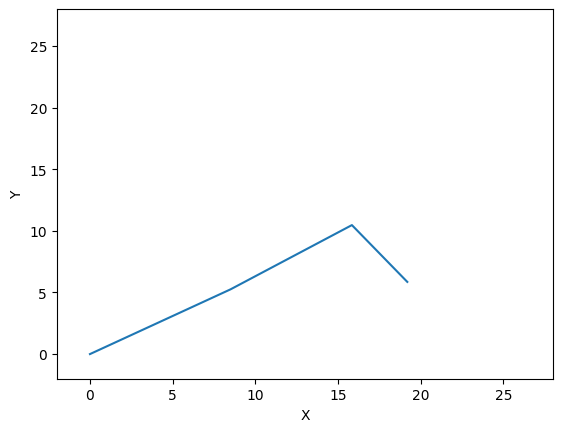

19.19353670352686
5.858764460345084


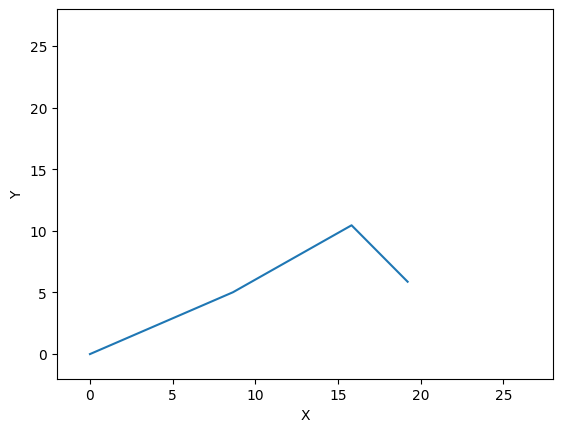

19.213136294913824
5.872493350013051


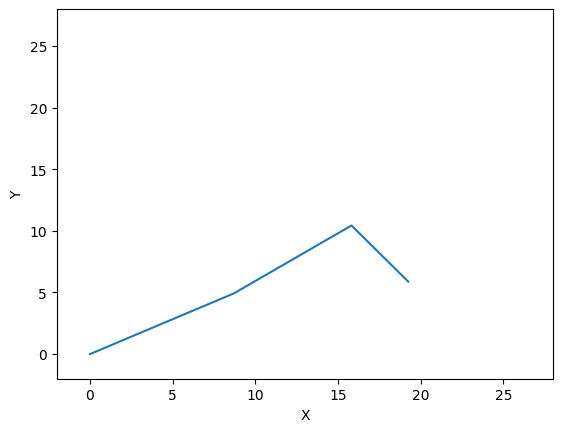

19.24787333440853
5.885299324262028


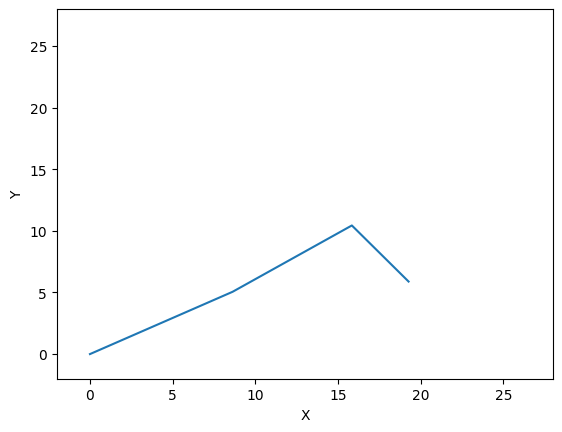

19.270295341229314
5.887585888279773


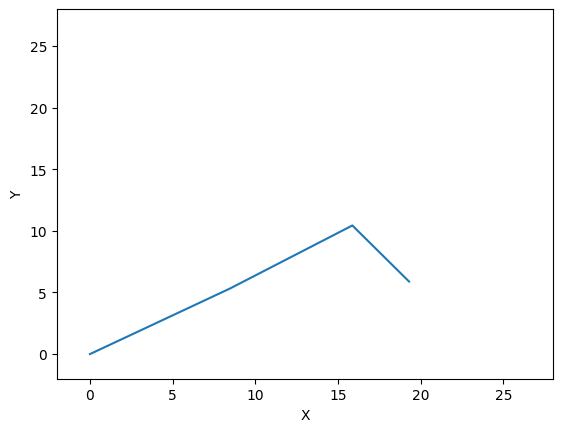

19.29978874162127
5.887457112595982


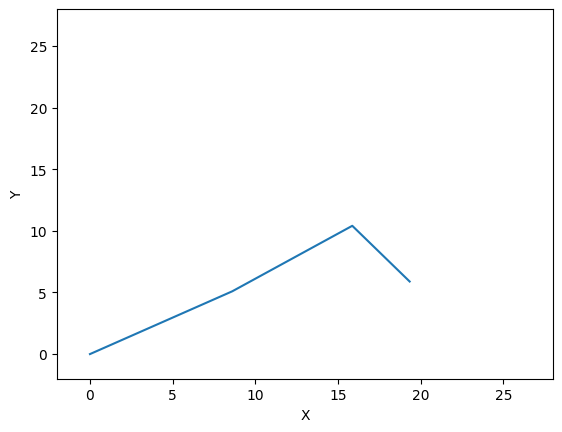

19.33590628115381
5.89019752277128


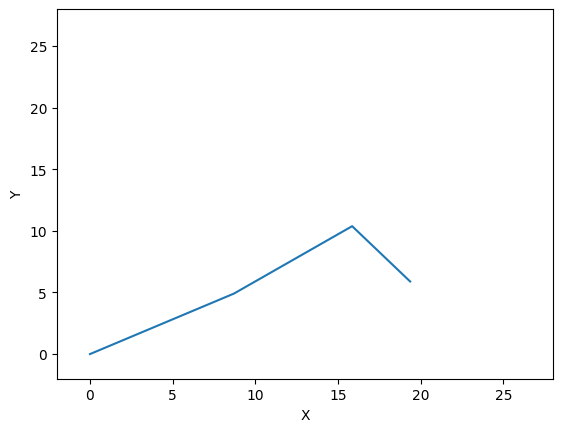

19.36720287408374
5.8897755181791975


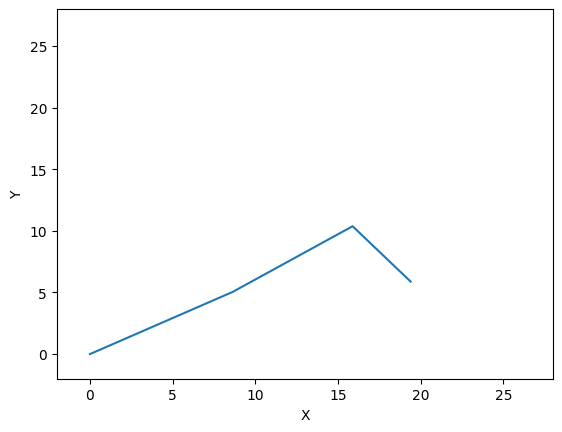

19.393668987165675
5.8861912273664165


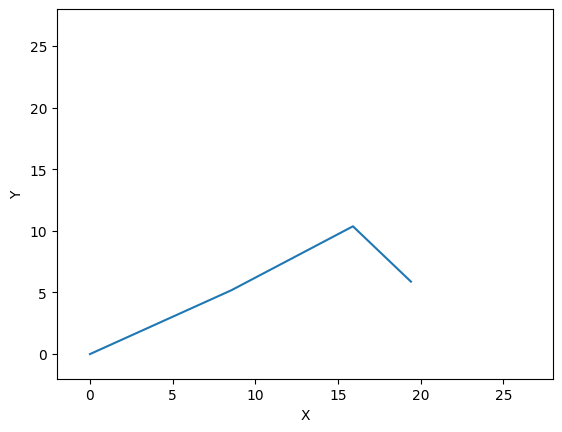

19.41529655856518
5.879445742142631


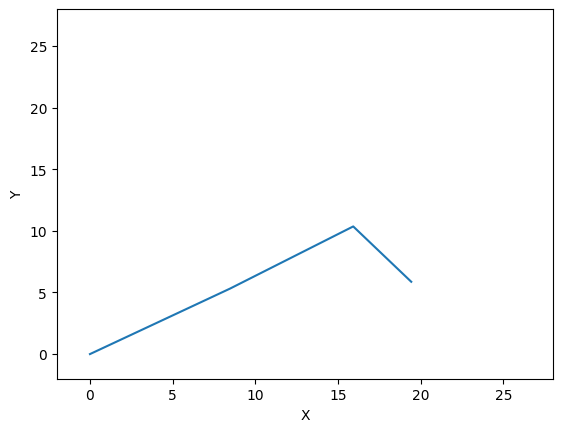

19.432079000314502
5.869541117247995


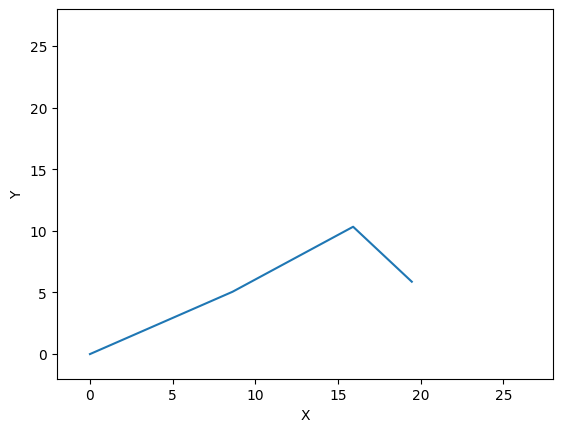

19.46564506286264
5.874314090830722


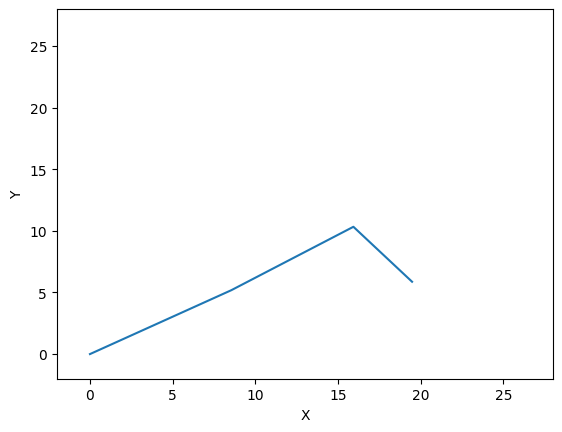

19.481938883625087
5.871479628033188


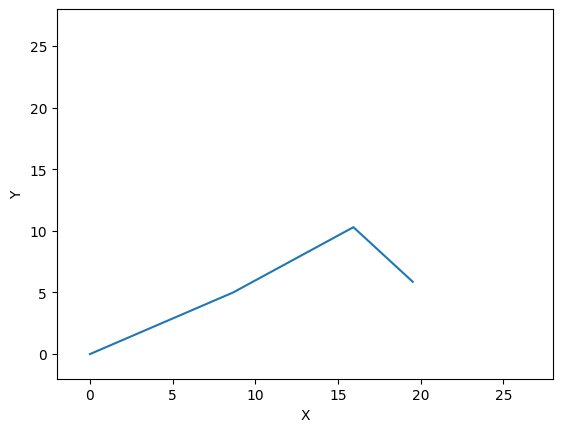

19.522099950297378
5.869519969675038


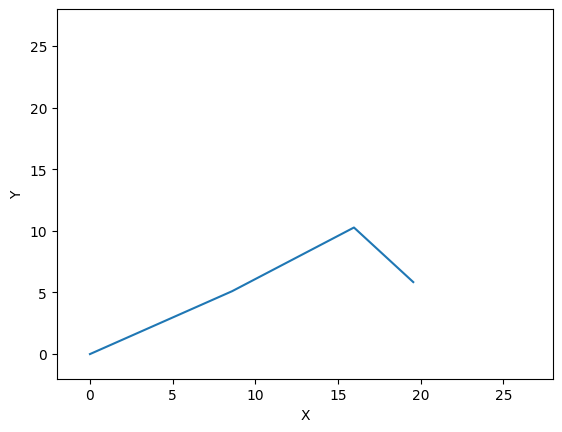

19.554063744802928
5.8435265633750975


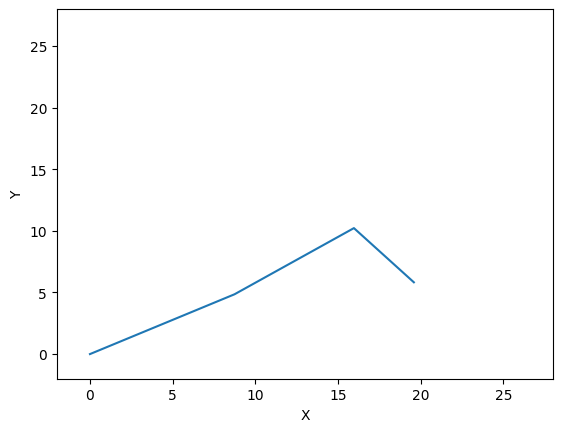

19.590147402120518
5.826839899110645


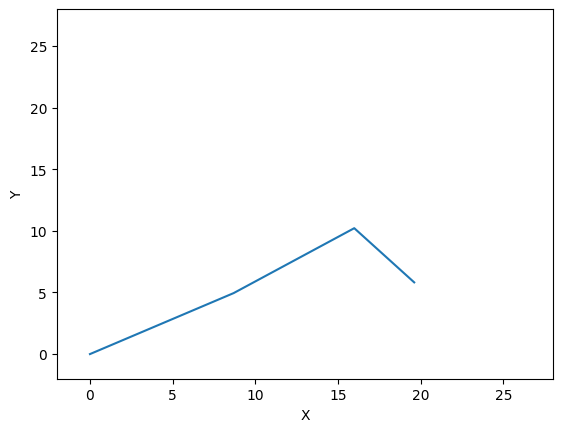

19.6109739926667
5.820709929596703


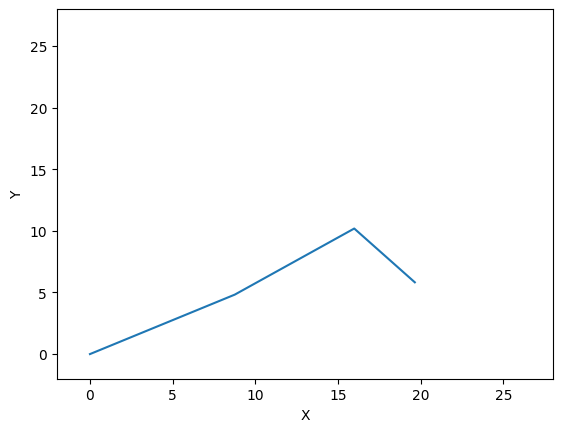

19.648134983166564
5.825022804215831


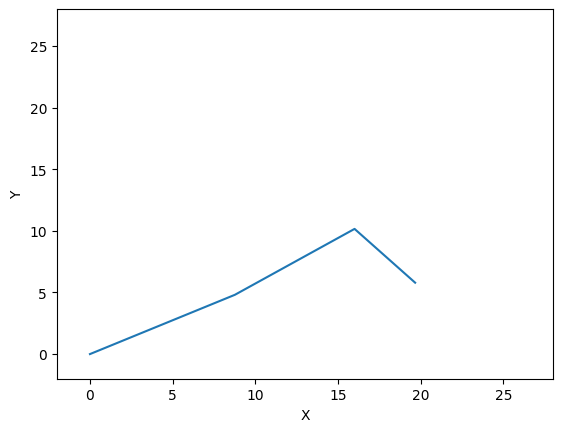

19.66776616314545
5.794923658894867


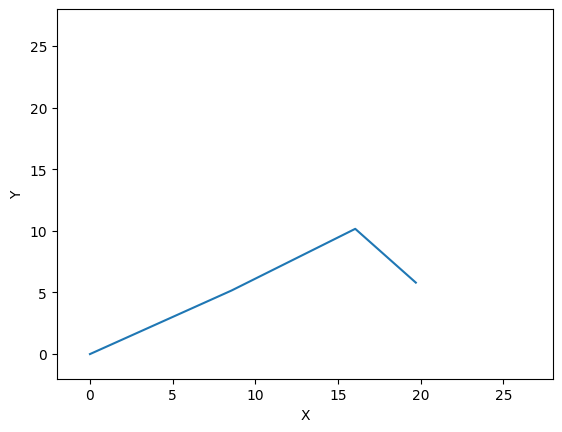

19.708790418005613
5.800110467088473


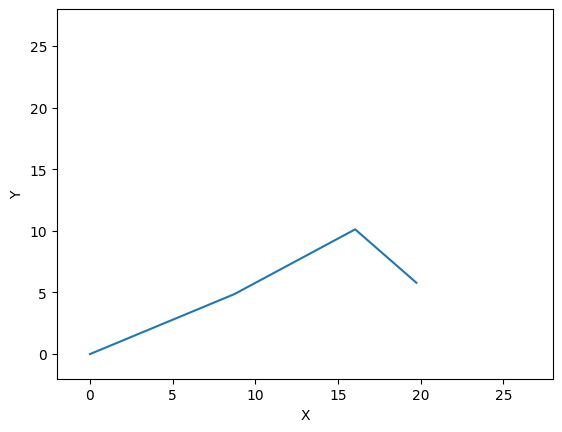

19.742297076964128
5.790349766442156


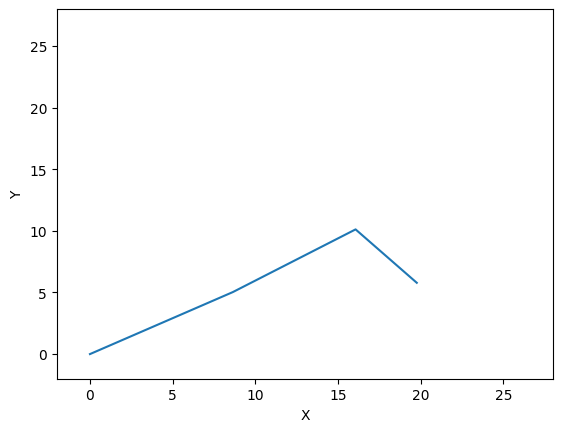

19.766655067264114
5.786743553383261


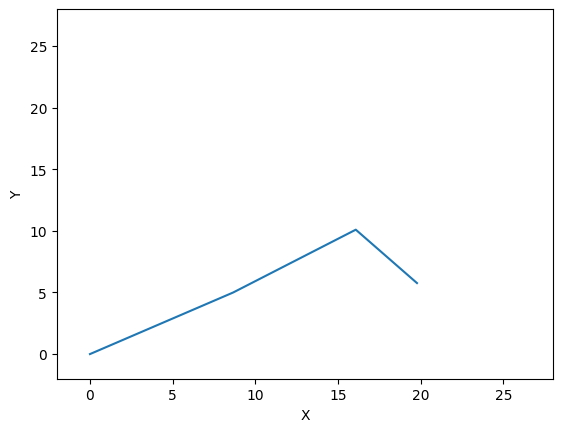

19.77914114568505
5.7633335314190095


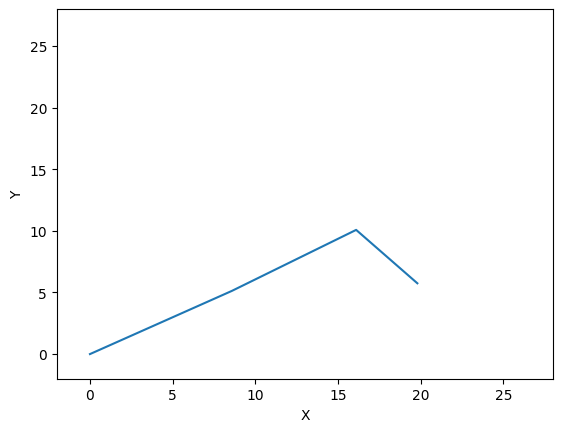

19.801598513892092
5.746565514319526


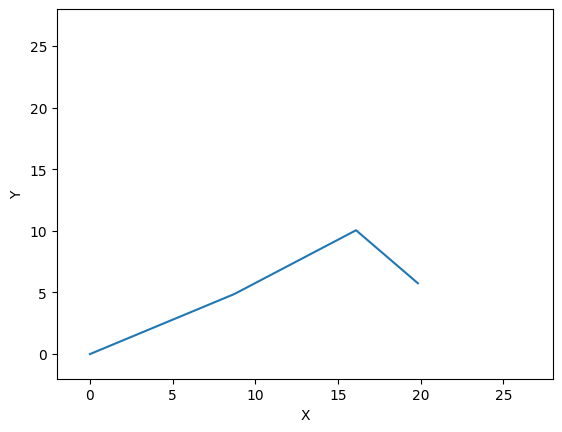

19.83332414255824
5.749112822839046


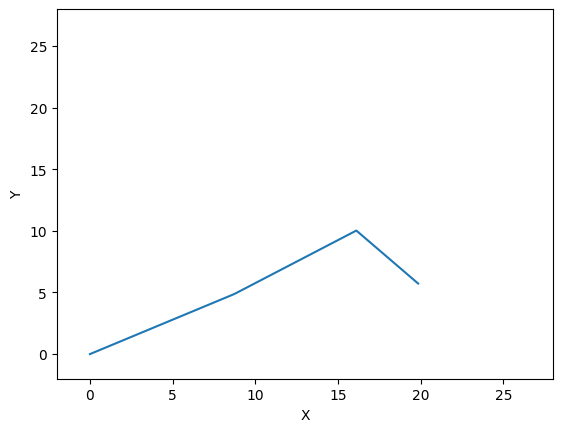

19.850922075642558
5.724253603701729


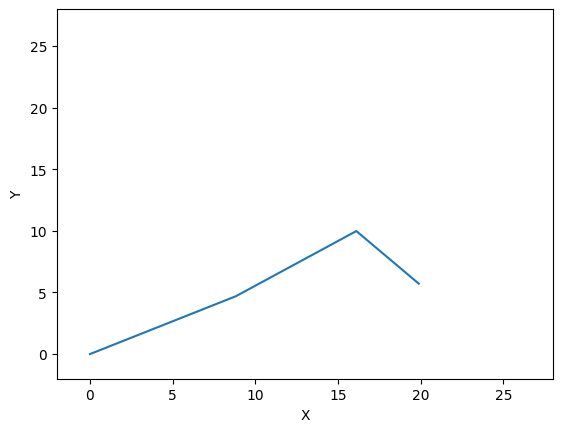

19.887734048859958
5.71642120589045


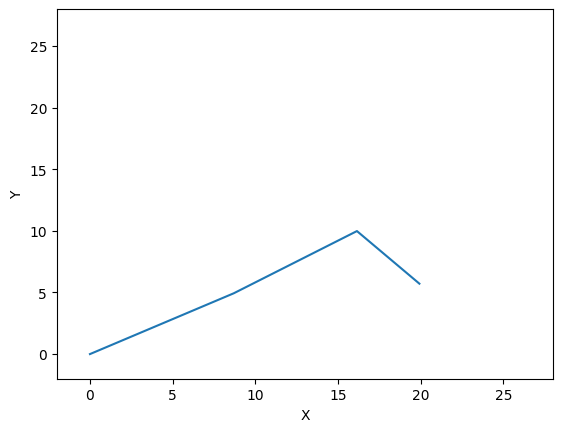

19.924366450497565
5.715527243149697


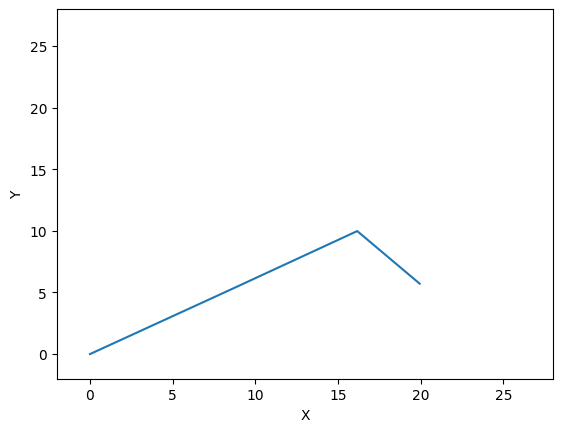

19.94160272848081
5.716049919422307


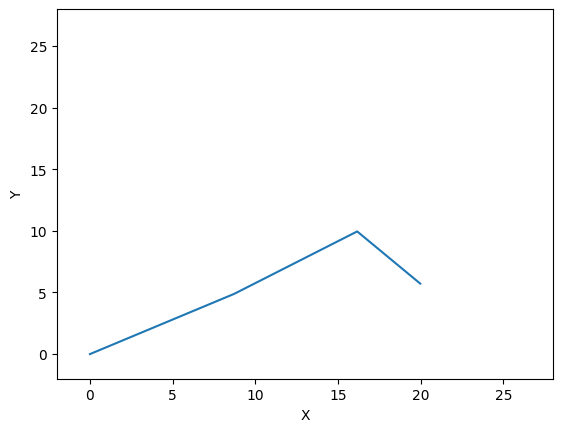

19.975997546050472
5.719290111703354


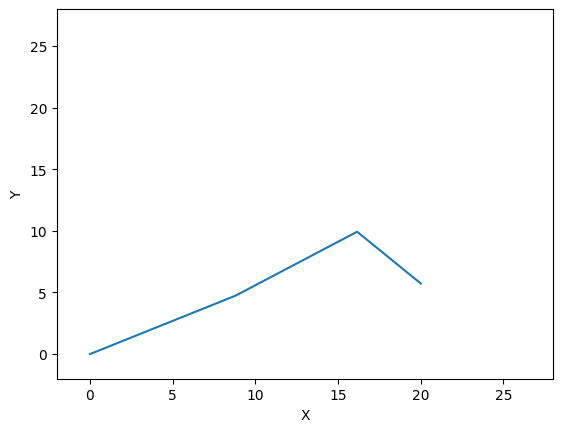

20.008220650084333
5.728792193808834


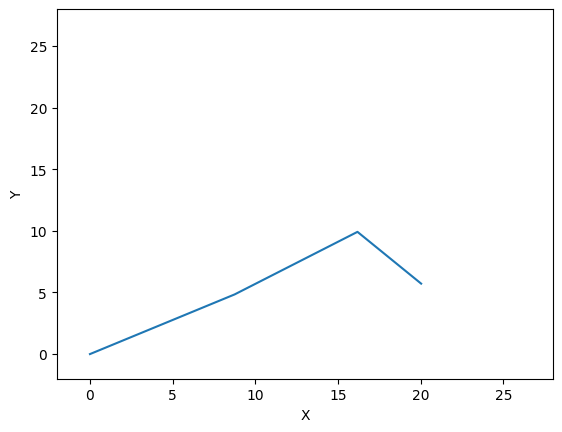

20.030621609327056
5.718283077819721


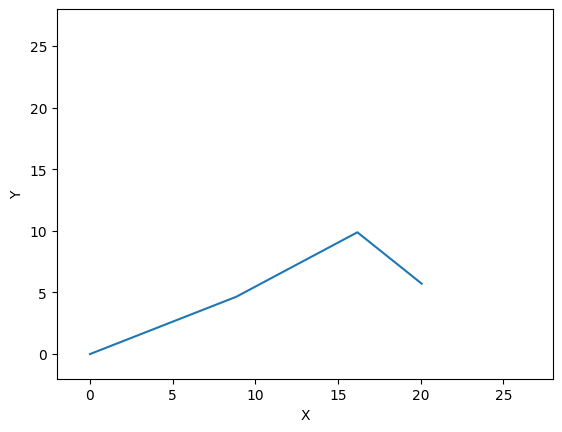

20.06156936646691
5.717007679008476


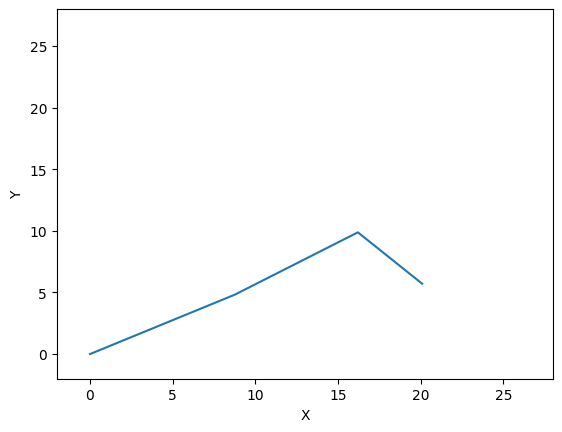

20.091404862566044
5.712704722280024


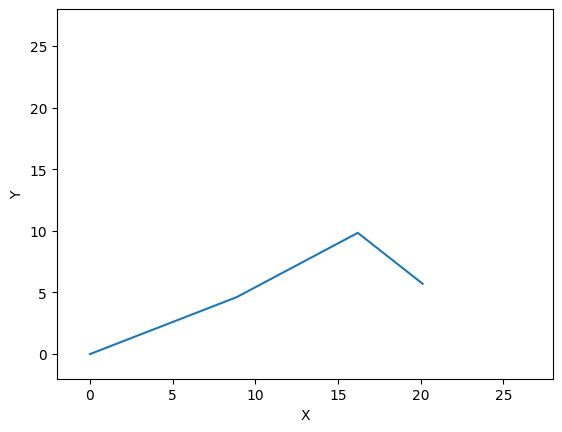

20.123359444011164
5.705930853425063


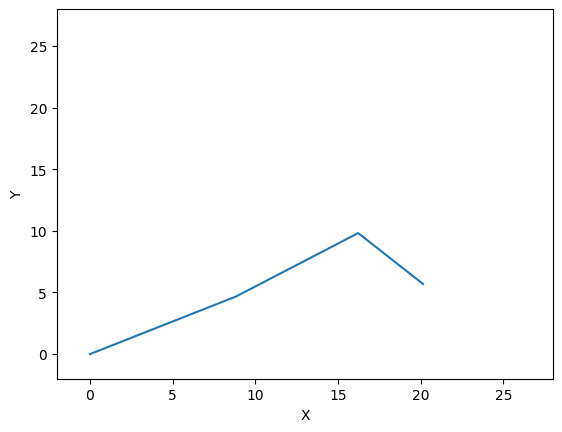

20.14659787410118
5.687783441697075


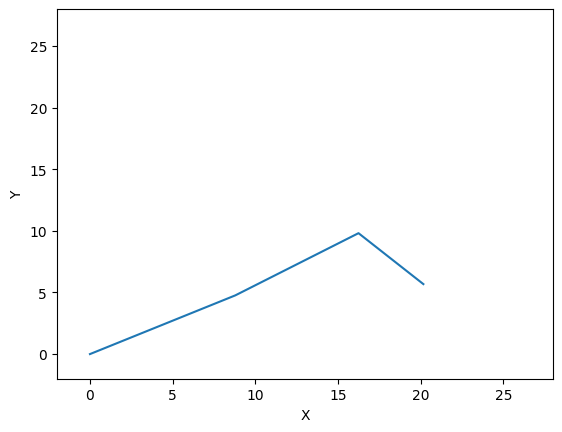

20.165653088673338
5.679631345324142


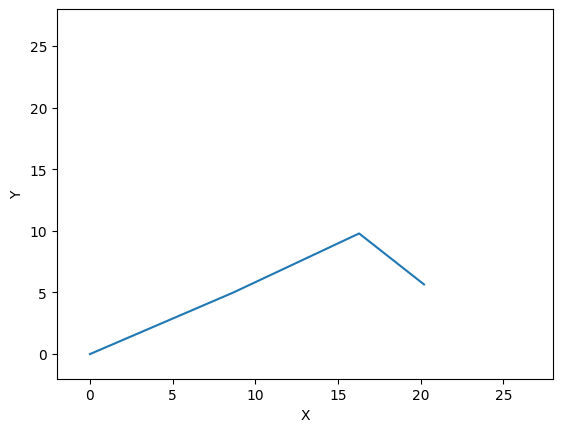

20.202086351460437
5.656741524489298


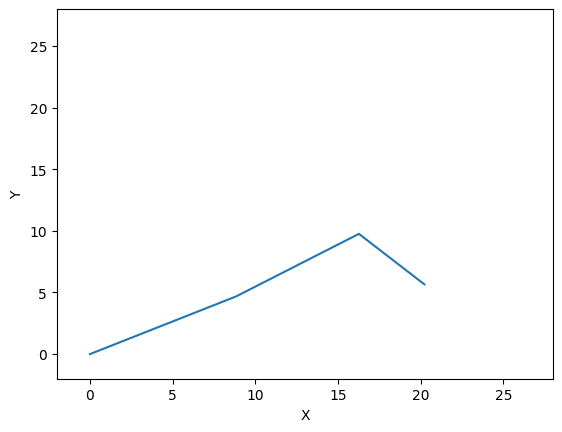

20.22688240665147
5.658414556717619


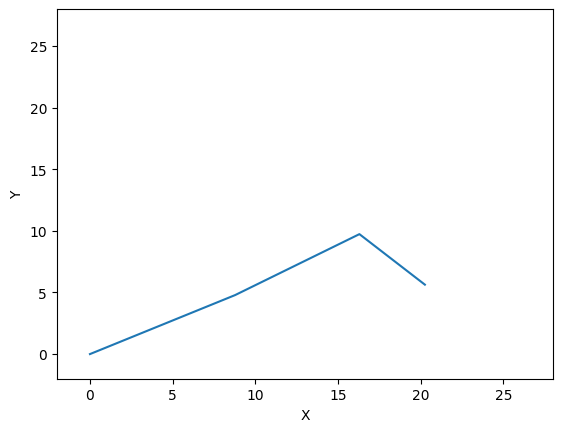

20.256612693531352
5.635853042862712


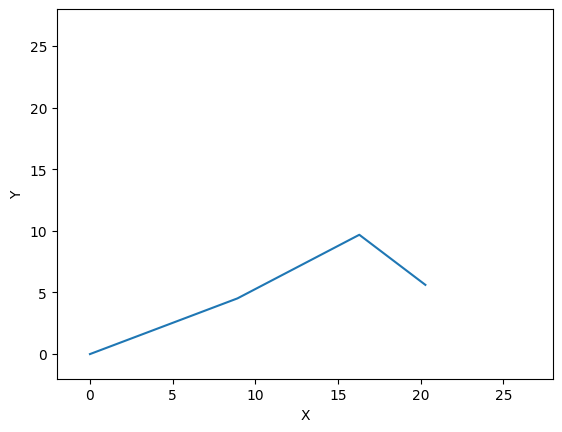

20.28639411749223
5.618666734440168


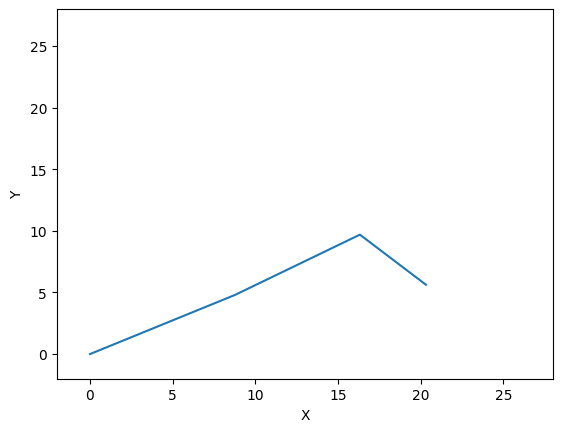

20.32119839577301
5.628255102080784


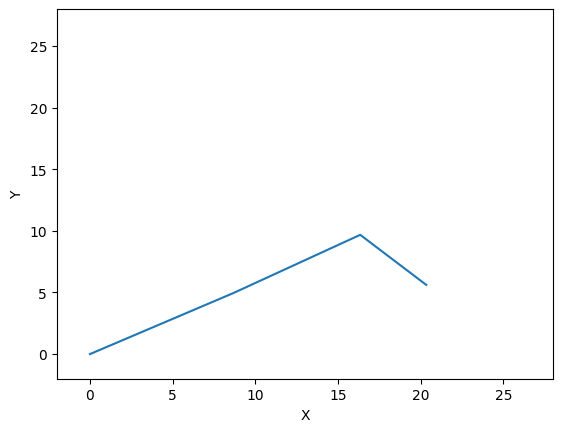

20.34145352746981
5.614391048185039


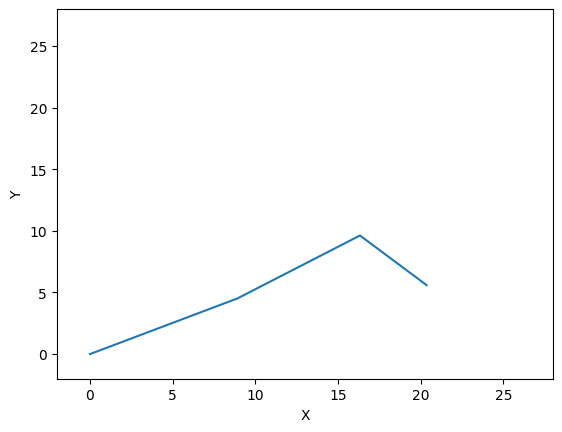

20.362322533932655
5.594648484741094


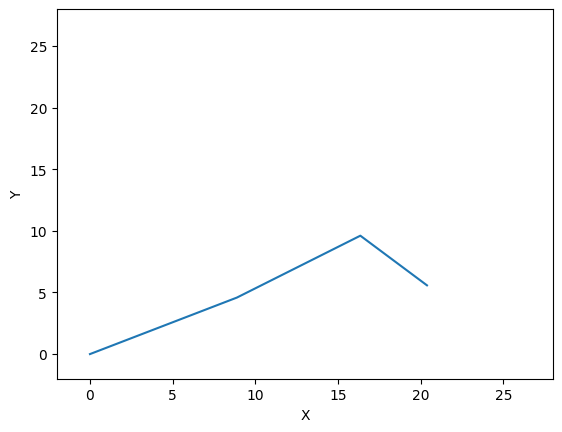

20.384140919551633
5.5795636638288775


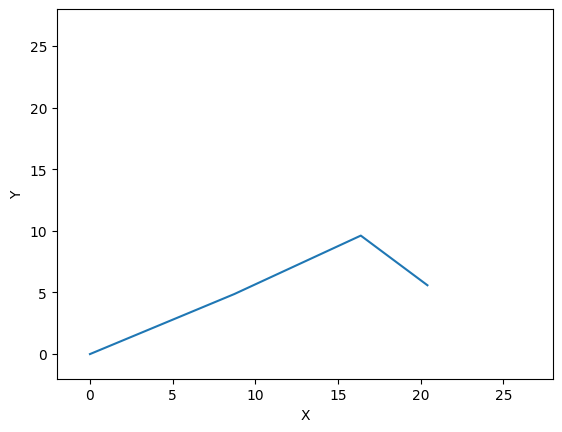

20.41084741757549
5.586839548194472


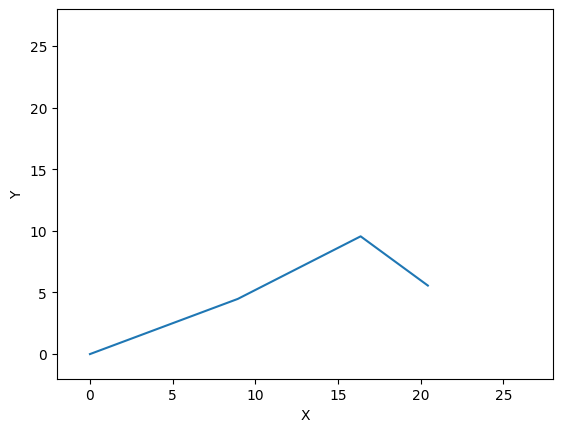

20.436601433098055
5.562228777563602


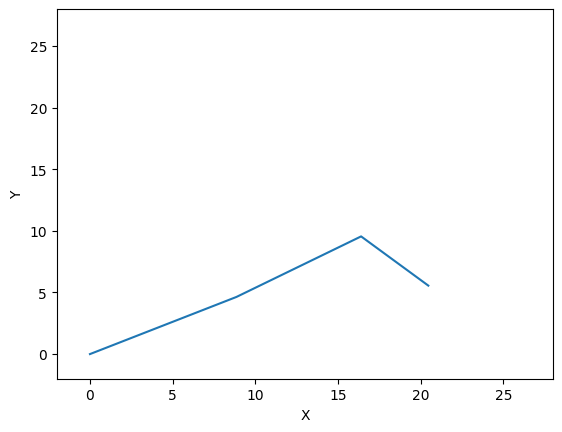

20.46461870686403
5.557340744183906


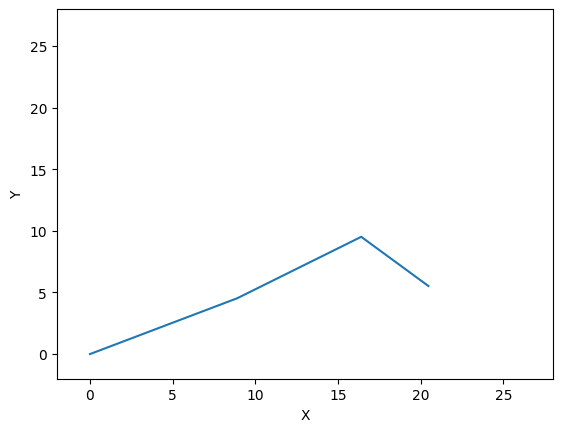

20.472540627462497
5.523314753336499


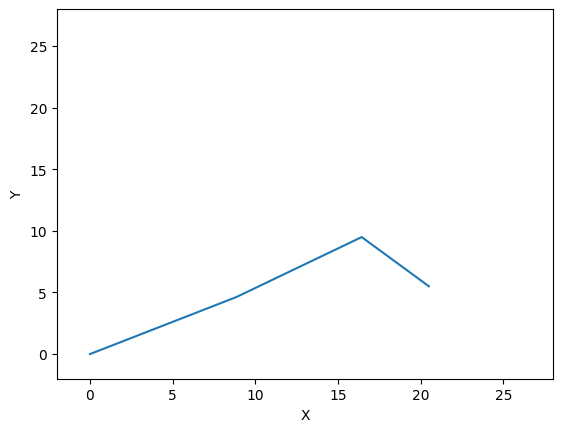

20.499725890803287
5.5022189199074445


In [ ]:
# ROTANIN TÜM SONUÇLARI

num = 0
while num!=len(results):

  theta1 = results[num][0]*pi/180
  theta2 = results[num][1]*pi/180
  theta3 = results[num][2]*pi/180

  xp1 = 10*cos(theta1)
  xp2 = 10*cos(theta1) + 9*cos(theta1+theta2)
  xp3 = 10*cos(theta1) + 9*cos(theta1+theta2) + 5.7*cos(theta1+theta2+theta3)

  yp1 = 10*sin(theta1)
  yp2 = 10*sin(theta1) + 9*sin(theta1+theta2)
  yp3 = 10*sin(theta1) + 9*sin(theta1+theta2) + 5.7*sin(theta1+theta2+theta3)

  xpoints = np.array([0, xp1, xp2, xp3])
  ypoints = np.array([0, yp1, yp2, yp3])

  plt.plot(xpoints, ypoints)

  plt.xlim(-2, 28)
  plt.ylim(-2, 28)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

  print(xp3)
  print(yp3)
  num += 1

In [ ]:
# Matlab' e uygun hale getirme

theta1 = []
theta2 = []
theta3 = []
for i in results:
  theta1.append(i[0]*pi/180)
  theta2.append(i[1]*pi/180)
  theta3.append(i[2]*pi/180)

theta1_s = str(theta1).replace(',', ' ').replace(']', '];')
theta2_s = str(theta2).replace(',', ' ').replace(']', '];')
theta3_s = str(theta3).replace(',', ' ').replace(']', '];')

In [ ]:
# THETA1 SONUÇLARI
print(theta1_s)
print("")

[1.5026738264110773  1.5707963267948966  1.5707963267948966  1.5021683294818946  1.5707963267948966  1.5707963267948966  1.5020476967558356  1.5020920477942161  1.5542616518725436  1.5377271164936965  1.5211928602865934  1.5046590230489085  1.488125744832819  1.4715931660303252  1.4550614274590525  1.4385306704485716  1.467207857264173  1.441620928959356  1.419776704475925  1.4491960082181699  1.4158682792300044  1.3907734824162747  1.4085066423562396  1.3780500149587127  1.3946097966211042  1.3604595440900815  1.3724553630170957  1.33805370515234  1.3443525422635951  1.3553098517287614  1.3131687184746705  1.3149768855686594  1.3175597070819163  1.3219710298433007  1.2737193857256406  1.2689863152887106  1.2630237239627535  1.2556005620019266  1.2465458887429002  1.2358034012919117  1.2234508576611594  1.209669786611258  1.2394038268532486  1.2145538841223382  1.19210639152854  1.170541383430042  1.1853569308505394  1.1560876183439381  1.1680734881592336  1.1328588346369508  1.1363499

In [ ]:
# THETA2 SONUÇLARI
print(theta2_s)
print("")

[0.1423701001014508  0.0  0.0  0.14400444029822618  0.0  0.0  0.14483589915237874  0.14493556821997064  0.01745329251993519  0.03490658503990476  0.05235987755984339  0.06981317007977549  0.08726646259970486  0.10471975511964961  0.1221730476396035  0.13962634015954842  0.06114542614673303  0.09766793257641268  0.12629234576017118  0.04600293998726293  0.09882160141304504  0.13426409912228435  0.07840312724636397  0.12511804442256058  0.07154429092968681  0.12601083151516085  0.08188253955824654  0.13683507216797663  0.10454482419870167  0.062282928027407466  0.1334800352620801  0.11034521741022492  0.08543867173874697  0.05653619811813888  0.14049194357732944  0.13070891389692774  0.12338672574062433  0.11901368102229094  0.11795119200080167  0.12031867411965817  0.12595254468705674  0.13447016442428641  0.04849801329835121  0.08003714433342593  0.1063747761543033  0.1307202501946888  0.07528792535390925  0.11555921827193219  0.06558095749530139  0.11806890069322828  0.085510939142951

In [ ]:
# THETA3 SONUÇLARI
print(theta3_s)
print("")

[-1.3745178924534063  -1.3439035240356327  -1.3788101090755198  -1.4803664908406635  -1.4486232791552924  -1.4835298641951788  -1.5857970720884136  -1.6208476772342837  -1.5891682369124267  -1.6075402865734776  -1.6259126154062677  -1.6442853632084549  -1.6626586700322414  -1.681032676269632  -1.69940752273826  -1.7177833507676663  -1.6941595623503696  -1.7225484329951708  -1.7467819142154477  -1.7220917509646954  -1.7590359759222556  -1.786836969337707  -1.7748890961816683  -1.8086006784802795  -1.7977666454297143  -1.8355362260041075  -1.8295836917541235  -1.8675878590190402  -1.8677763869409365  -1.8626517390147228  -1.9091610055152475  -1.9140142935372984  -1.9178705081589913  -1.9195592960796821  -1.9727166899411555  -1.984380528603739  -1.9972756879013938  -2.011659420002147  -2.0277221965015473  -2.0455271299493307  -2.0649883956658917  -2.085904883133134  -2.0645733572890768  -2.097442484373156  -2.1275125623801503  -2.1564729671019522  -2.1507627747215574  -2.1879446939128937 